# Стек

* Стек - это абстрактная структура данных, которую можно сравнить со стопкой. Мы не можем полодить элемент между ними или забрать элемент между ними. 
* пуш - это операция "положить в стек"
* поп - "взять из стека"
* **Стек вызовов**, **машинный стек**, **стек исполнения** - он хранит функции, которые мы вызвали. Если интерпретатор видит, что нужно выполнить какую-то функцию, то он кладет эту функцию на стек. Если функция завершается свое исполнение, то он со стека ее снимает. 

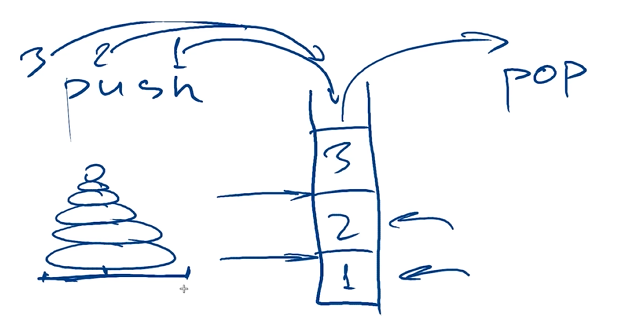

In [359]:
def g():
    print("I'm in function g") 
def f():
    print("I'm in function f")
    g()
    print("I'm in function f")

print("I am outside of any fucntion")
f()
print("I am outside of any fucntion")

I am outside of any fucntion
I'm in function f
I'm in function g
I'm in function f
I am outside of any fucntion


В самом низу стека лежит функция module. Это именно она создает объекты f и g. Когда мы функцию вызываем, то она кладется на стек, а когда функция завершается, то она со стека снимается. 

так мы вызываем функцию f. кладем функцию принт на стек. когда он ее выполнит то он снимет ее со стека и продолжит со следющей строки. 

Каждый последующий шаг на стеке ждет пока исполнится то, который лежит выше.

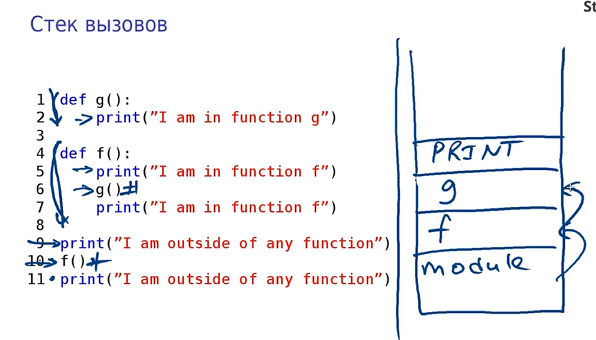

In [360]:
x=[1,2,3]
x.append(4)
x.append(5)
print(x)

[1, 2, 3, 4, 5]


In [361]:
top=x.pop()
print(top)
print(x)

5
[1, 2, 3, 4]


In [362]:
top=x.pop()
print(top)
print(x)

4
[1, 2, 3]


``return`` - снимает функцию со стека

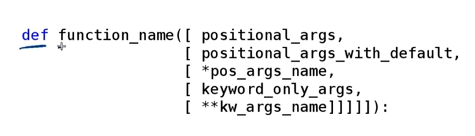

# Рекурсия

In [364]:
def fib(x):
    if x in [0,1]:
        return 1
    else: return fib(x-1)+fib(x-2)
fib(5)

8

# Пространство имен и области видимости

**Пространство имен** - это символическая таблица, которая ставит в соответстиве именам объекты в памяти. 

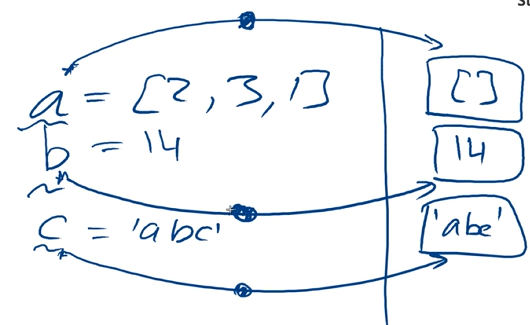

* Пространство имен создается каждый раз при вызове функции. 
* Первое пространство имен, которое создается - это пространство имен, которое создается при запуске интерпретатора - пространство имен встроенных классов и типов и функций стандартной библиотеки builtins.
* main - простарснтво имен на самом высоком уровне программы. 
* Каждый раз когда функция исполняется и снимается со стека разрушается локальное пространство имен этой функции. 

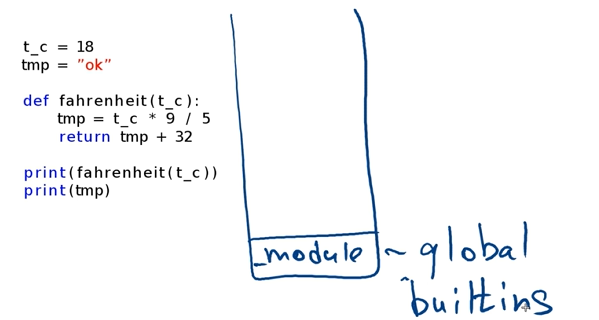

Интерпретатор смотрит на стек сверху вниз. 
Сначала она будет смотрит print в неймспейсе глобал, а потом в билтинс.
затем смотрит фаренгейт в глобалс, затем ищет t_c в глобалс. 

когда мы вызываем фаренгейт, то создается локальный неймспейс этой функции. В нем сначала будет хранится только один аргумент, который мы объявили - это t_c. Ему присваивается 18. В локальном неймспейсе он смотрит значения, на которые ссылается t_c - это 18. 
В локальном неймспейсе создается tmp и ему присваивается результат вычисления. 

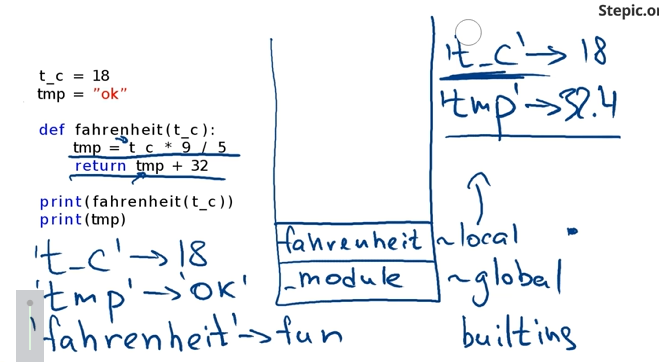

Далее функция принт создаст локальный неймспейс. после ее выполнения и ее локальный неймспейс удалится. 

Это возволяет использовать одни и теже имена в разных частях программы. 

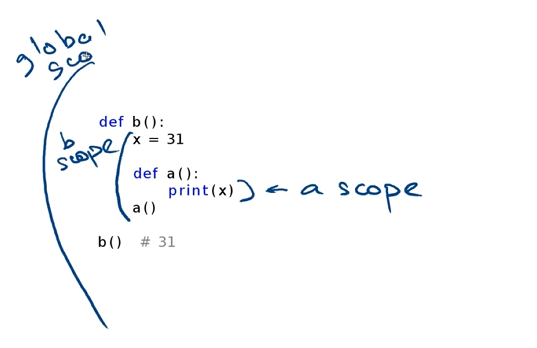

* глобальный неймспейс - глобальная область видимости ()
* локальный неймспейс - локальная область видимости

При поиске переменной верно правило LEGB: 
* L - LOCAL SCOPE
* E - ENCLOSING SCOPE
* G - GLOBAL SCOPE
* B - BUILTINS SCOPE

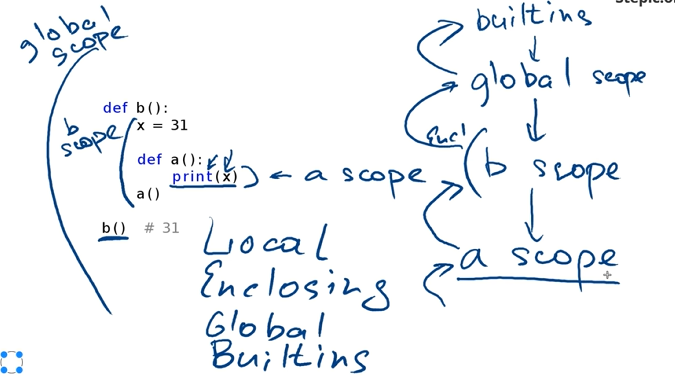

При циклах и условных оператах не создается пространства имен. Они в том текущем пространстве, в котором вызывались. 

In [401]:
def f():
    ok_status = True
    vowels = ['a', 'u', 'i', 'e', 'o']

    def check(word):
        nonlocal ok_status
        for vowel in vowels:
            if vowel in word:
                return True
        ok_status = False
        return False

    print(check('avde'))
    print(ok_status)
    print(check('www'))
    print(ok_status)
f()

True
True
False
False


**Эмуляция работы пространства имен**

Вашей программе на вход подаются следующие запросы:

* ``create <namespace> <parent>`` –  создать новое пространство имен с именем ``<namespace>`` внутри пространства ``<parent>``
* ``add <namespace> <var>`` – добавить в пространство ``<namespace>`` переменную ``<var>``
* ``get <namespace> <var>`` – получить имя пространства, из которого будет взята переменная ``<var>`` при запросе из пространства ``<namespace>``, или None, если такого пространства не существует

In [404]:
S='create <namespace> <parent>'
S.rfind('create')

0

In [467]:
n = int(input())
scopes = {'global': {'parent': None, 'variables': set()}}
qs=[input() for i in range(n)]

def q_reader(q):
    q0,q1,q2=q.split(' ')
    global scopes
    
    def create(q1, q2):
        scopes[q1]={'parent': q2, 'variables': set()}
    def add(q1,q2):
        scopes[q1]['variables'].add(q2)
    def get(q1,q2):
        if q2 in scopes[q1]['variables']:
            return q1
        else:
            q1=scopes[q1]['parent']
            if q1 is None:
                return None
            return get(q1, q2)
            
    if q0=='create':
        create(q1, q2)
    elif q0=='add':
        add(q1,q2)
    elif q0=='get':
        print(get(q1,q2))
            

for i in qs:
    q_reader(i)

global
None
bar
foo


In [430]:
info = dict({'global':[None]})

def create(namespace, parent):
    info.update({namespace:[parent]})

def add(namespace, var):
    info[namespace].append(var)

def get(namespace, var):
    while namespace != None and var not in info[namespace][1:]:
        namespace = info[namespace][0]
    print(namespace)

operations = {'create': create, 'add': add, 'get': get}
for i in range(int(input())):
    inp = input().split()
    operations[inp[0]](inp[1], inp[2])

['add global a', 'create foo global', 'add foo b', 'get foo a']

* ``vars(f)``, ``f.__dict__`` - пространство имен переменной

In [93]:
import math
vars(math).items()

dict_items([('__name__', 'math'), ('__doc__', 'This module provides access to the mathematical functions\ndefined by the C standard.'), ('__package__', ''), ('__loader__', <class '_frozen_importlib.BuiltinImporter'>), ('__spec__', ModuleSpec(name='math', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in')), ('acos', <built-in function acos>), ('acosh', <built-in function acosh>), ('asin', <built-in function asin>), ('asinh', <built-in function asinh>), ('atan', <built-in function atan>), ('atan2', <built-in function atan2>), ('atanh', <built-in function atanh>), ('cbrt', <built-in function cbrt>), ('ceil', <built-in function ceil>), ('copysign', <built-in function copysign>), ('cos', <built-in function cos>), ('cosh', <built-in function cosh>), ('degrees', <built-in function degrees>), ('dist', <built-in function dist>), ('erf', <built-in function erf>), ('erfc', <built-in function erfc>), ('exp', <built-in function exp>), ('exp2', <built-in function exp2>), ('expm1'

* ``dir(f)`` - имена

In [97]:
dir(math)

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'cbrt',
 'ceil',
 'comb',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'dist',
 'e',
 'erf',
 'erfc',
 'exp',
 'exp2',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'isqrt',
 'lcm',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'nextafter',
 'perm',
 'pi',
 'pow',
 'prod',
 'radians',
 'remainder',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc',
 'ulp']

* ``__doc__`` - докстринг модуля
* ``__name__`` - имя модуля

## Имена интерактивной сессии

In [96]:
%whos

Variable      Type       Data/Info
----------------------------------
ElementTree   module     <module 'xml.etree.Elemen<...>\\etree\\ElementTree.py'>
b             int        0
color         str        green
color_book    dict       n=3
deepness      int        3825112
deepnesss     int        0
g             int        0
i             int        3
match         Match      <re.Match object; span=(0, 6), match='Привет'>
math          module     <module 'math' (built-in)>
node          Element    <Element 'cube' at 0x000001DC0C5D9D50>
r             int        0
re            module     <module 're' from 'C:\\Us<...>3\\Lib\\re\\__init__.py'>
regex         str        П.+?т
t             list       n=0
text          str        Привет, как тебя зовут?
tree          Element    <Element 'cube' at 0x000001DC0C5D9CB0>


In [98]:
print(__name__)

__main__


## Глобальное пространство имен

In [101]:
dir()[0:10] # первые 10 имен в __main__

['ElementTree', 'In', 'Out', '_', '_1', '_10', '_100', '_18', '_19', '_20']

In [102]:
dir(__builtins__)[0:10] # первые 10 имен в __builtins__

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BaseExceptionGroup',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError']

## Использование Python-tutor для визуализации пространст имен

In [112]:
!pip install tutormagic
!jupyter nbextension install --overwrite --py tutormagic
!jupyter nbextension enable --py tutormagic

Traceback (most recent call last):
  File "C:\Users\79618\anaconda3\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\79618\anaconda3\Lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\79618\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\79618\anaconda3\Lib\site-packages\notebook\nbextensions.py", line 972, in start
    super().start()
  File "C:\Users\79618\anaconda3\Lib\site-packages\jupyter_core\application.py", line 266, in start
    self.subapp.start()
  File "C:\Users\79618\anaconda3\Lib\site-packages\notebook\nbextensions.py", line 702, in start
    self.install_extensions()
  File "C:\Users\79618\anaconda3\Lib\site-packages\notebook\nbextensions.py", line 675, in install_extensions


In [117]:
%load_ext tutormagic
%%tutor --lang python3
def g(x):
    a=1
    x=x+a
    return x
a=0
y=g(10)
print(a,y)

In [115]:
def g(x):
    a=1
    x=x+a
    return x
a=0
y=g(10)
print(a,y)

0 11


In [116]:
%%tutor --lang python3
def f(x):
    x = x + 1
    return x

x = 1
print(f(x), x)

In [118]:
%%tutor --lang python3
def f(x):
    x[0] = x[0] + 1
    print(f'the identity of local x is {id(x)}')
    return x

x = [1]
print(f'the identity of global x is {id(x)}')
print(f(x), x)

# Принципы работы Python

Почему выбирают Python?
* **Качество программного обеспечения**: код читабелен, а потому многократно используемым и сопровождаемым. 
* **Продуктивность труда разрабочиков**: код Python обычно занимает от 20% до 33% от аналогичного кода C++ или Java.  
* **Переносимость программ**: функционирует без изменений во всех основных компьютерных платформах
* **Поддерживающие библиотеки**
* **Интеграция компонентов**: позволяет настраивать и расширять продукты написанные на других языках. 

In [22]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


**Python** - ООП язык программирования написания сценариев. 

Стандартные реализации Python компилируют (транслируют) операторы исходного кода в байт-код, а затем интерпретируют этот байт-код. Бай-код переносим, т.к. он незавимимый от платформы формат. Тем не менее, т.к. программы Python обычно не компилируются до машинного кода, некоторые программы будут выполняться медленнее на Python, чем, анпример, на полностью компилируемом языке C. 

Но есть возможность выносить части программы в скомпилированные расширения. 

**Инструменты администрирования системы** = инстурменты командной строки. Программы Python могут производить поиск в файлах и деревьях каталогов, запускать другие программы, организовывать параллельную обработку с помощью процессов и потоков и т.д. 

Стандартная библиотека Python поставляется с привязками POSIX и поддерживает
все обычные инструменты ОС: переменные среды, файлы, сокеты, конвейеры, процессы, многопоточность, сопоставление с образцом в виде регулярного выражения, аргументы командной строки, интерфейсы стандартных потоков данных, модули запуска команд оболочки, развертывание имен файлов, утилиты сжатия файлов, средства разбора XML и JSON, обработчики файлов CSV и т.д

**Графические пользовательские интерфейсы**

В состав Python входит стандартный объектно-ориентированный интерфейс к Tk GUI
API под названием tkinter (Tkinter в 2.Х), который позволяет программам Python реализовывать переносимые графические пользовательские интерфейсы с присущим
данной системе внешним видом и поведением. Графические пользовательские интерфейсы Python/tkinter выполняются в неизменном виде в средах Microsoft Windows,
X Window (в Unix и Linux) и Mac OS (Classic и OS X). Бесплатный пакет расширения
PMWдобавляет в инструментальный набор tkinter более развитые виджеты (графические элементы). Кроме того, API-интерфейс для построения графических пользовательских интерфейсов wxPython, основанный на библиотеке C++, предлагает альтернативный инструментальный набор для конструирования переносимых графических
пользовательских интерфейсов в Python

**Сценарии для интернета**

В состав Python входят стандартные модули для Интернета, которые позволяют
программам Python выполнять широкий спектр задач, связанных с сетями, в клиентском и серверном режимах. Сценарии могут взаимодействовать через сокеты; извлекать информацию из форм, отправленных серверными CGI-сценариями; передавать
файлы посредством FTP; разбирать и генерировать документы XML и JSON; посылать, получать, составлять и анализировать сообщения электронной почты; извлекать
веб-страницы по URL-адресам; разбирать HTML-содержимое извлеченных веб-страниц; взаимодействовать через протоколы XML-RPC, SOAP и Telnet, а также многое
другое. Библиотеки Python делают решение таких задач удивительно простым.

Кроме того, в веб-сети доступен крупный набор сторонних инструментов для
Интернет-программирования на Python. Например, система HTMLGen генерирует
HTML-файлы из описаний на основе классов Python, пакет mod_python эффективно запускает Python на веб-сервере Apache и поддерживает серверный механизм шаблонов
с помощью Python Server Pages, а системаJython обеспечивает бесшовную интеграцию Python/Java и поддерживает написание серверных апплетов, которые запускаются на
стороне клиента.

Вдобавок пакеты развитых фреймворков веб-разработки для Python, такие как
Django, TurboGears, web2py, Pylons, Zope и WebWare, поддерживают быстрое конструирование полнофункциональных и пригодных для производственного применения вебсайтов на Python. Многие из них включают средства объектно-реляционного отображения, архитектуру “модель-представление-контроллер” (Model-View-Controller),
написание серверных сценариев и шаблонов и поддержку AJAX, чтобы предлагать
полные решения веб-разработки производственного уровня.

**Интеграция компонентов**

Способность Python расширяться и встраиваться в системы С и C++ делает его удобным в качестве гибкого связующего языка для сценарного описания поведения других систем и компонентов. Скажем, интеграция библиотеки С в Python позволяет Python проверять наличие и запускать компоненты библиотеки, а встраивание
Python в какой-то продукт делает возможным кодирование настроек на месте эксплуатации без потребности в перекомпиляции целого продукта (или вообще поставки его
исходного кода).
Инструменты вроде генераторов кода SWIG и SIP могут автоматизировать порядочную часть работы по связыванию скомпилированных компонентов с Python для использования в сценариях, а система Cython позволяет программистам смешивать код
Python и языков семейства С. Более масштабные фреймворки, подобные поддержке
СОМ в Python для Windows, основанной на Java реализации Jython и основанной на
.NET реализации IronPython, предоставляют альтернативные способы написания сценариев для компонентов. Например, в среде Windows сценарии Python могут задействовать фреймворки для взаимодействия с Word и Excel, доступа к Silverlight и т.п

**Программирование баз данных**

Для традиционных требований относительно баз данных в Python предусмотрены
интерфейсы ко всем распространенным системам реляционных баз данных — Sybase,
Oracle, Informix, ODBC, MySQL, PostgreSQL, SQLite и т.д. В мире Python также определен переносимый API-интерфейс к базам данных для доступа к системам баз данных
SQL из сценариев Python, который выглядит одинаково в различных системах баз
данных. Скажем, из-за того, что интерфейсы поставщика реализуют переносимый
API-интерфейс, сценарий, написанный для работы с бесплатной системой MySQL, будет практически без изменений работать с другими системами (вроде Oracle); обычно
понадобится лишь заменить лежащий в основе интерфейс поставщика. Встроенный
внутрипроцессный механизм баз данных SQL, SQLite, является стандартной частью
Python, начиная с версии 2.5, и поддерживает как прототипирование, так и основные
потребности программ в хранении данных.

Что касается области, не связанной с SQL, то стандартный модуль Python под названием pickle предлагает простую систему постоянства объектов, которая позволяет программам легко сохранять и восстанавливать объекты Python из файлов и подобных им объектов. В веб-сети вам удастся отыскать сторонние системы с открытым
кодом ZODB и Durusy которые предоставляют законченные системы объектно-ориентированных баз данных для сценариев Python. Также вы найдете системы SQLObject
и SQLAkhemy, реализующие средства объектно-реляционного отображения (object
relational mapper — ORM), которые сопоставляют модель классов Python с реляционными таблицами. Наконец, вы обнаружите РуMongo — интерфейс к MongoDB, высокопроизводительной, с открытым кодом, отличной от SQL документной базе данных в
стиле JSON. Данные в MongoDB хранятся в структурах, очень похожих на собственные списки и словари Python, текст которых может анализироваться и создаваться с
помощью стандартного библиотечного модуля Python по имени j son.
Есть также системы, предлагающие более специализированные способы хранения
данных, в том числе Арр Engine от Google, которая моделирует данные с помощью классов Python и обеспечивает всестороннюю масштабируемость, а также дополнительно
появляющиеся варианты облачного хранения, в частности Az?/rc, PiCloud, OpenStack и
Stackato.


* программирование игр и создание мультимедиа-содержимого с помощью pygame,
cgkit, pyglet, РуSoy, PandaBD и т.п.;
* взаимодействие через последовательные порты в Windows, Linux и других средах с помощью расширения РуSerial',
* обработка изображений посредством PIL и его новейшего ответвления Pillow,
PyOpenGL, Blender, Maya и т.д.;
* программирование контроллеров для роботов с применением инструментального набора PyRo',
* обработка естественного языка с помощью пакета NLTK,
* инструментальное оснащение плат Raspberry Pi и Arduino',
* мобильные вычисления посредством переносимых версий Python для платформ
Google Android и Apple iOS,
* программирование функций и макросов для электронных таблиц Excel с использованием дополнений PyXLL или DataNitro',
* обработка меток содержимого медиафайлов и метаданных с помощью PyMedia,
ID3, PIL/Pillow и т.д.;
* программирование искусственного интеллекта с применением библиотеки нейронных сетей PyBrain и инструментального набора машинного обучения Milk,
* программирование экспертных систем посредством PyCLIPS, Pyke, Pyrolog и
pyDatalog,
* мониторинг сети с использованием системы zenoss, написанной и настраиваемой
с помощью Python;
* проектирование и моделирование, подкрепленное сценариями Python, с использованием PythonCAD, PythonOCC, FreeCAD и т.д.;
* обработка и генерация документов посредством ReportLab, Sphinx, Cheetah, PyPDF
и т.д.;
* визуализация данных с применением Mayavi, matplotlib, VTK, VPython и т.д.;
* разбор XML-содержимого с помощью библиотечного пакета xml, модуля
xmlrpclib и сторонних расширений;
* обработка файлов JSON и CSV с использованием модулей json и csv;
* глубинный анализ данных посредством фреймворка Orange, пакета Pattern, Scrapy
и специального кода

**Технические превосходства Python**
* **ООП** - Его модель классов
поддерживает такие расширенные понятия, как полиморфизм, перегрузка операций
и множественное наследование, но в контексте простого синтаксиса и типизации
Python применять ООП необыкновенно легко. Между прочим, если вы не понимаете упомянутые термины, то обнаружите, что их гораздо легче изучить с помощью
Python, чем любого другого доступного языка ООП.
* **Функциональное программирование**: генераторы, включения, замыкания, отображения, декораторы,
анонимные лямбда-функции и объекты функций первого класса
* **Переносимость**: Стандартная реализация Python написана на переносимом языке ANSI С; она компилируется и запускается практически на любой крупной платформе, применяемой в
настоящее время
* **Динамическая типизация** - Python отслеживает виды объектов, которые ваша программа применяет во время выполнения; он не требует сложных объявлений типов и размеров в коде.
На самом деле, как вы увидите в главе 6, в Python вообще нет такого понятия,
как объявление типа или переменной. Поскольку код Python не ограничивается
типами данных, он также обычно применим к целому диапазону объектов.
* **Автоматическое управление памятью** - Python автоматически выделяет память под объекты и возвращает ее обратно
(“собирает мусор”), когда объекты больше не используются, и большинство
объектов могут расти и сокращаться в размерах по требованию. Как вы узнаете,
Python отслеживает низкоуровневые детали, связанные с памятью, так что вам
делать это не придется.
* ****

## Как Python выполняет программы

Python - интерпретируемый язык. Это значит, что Python берет наш код и строка за строкой его исполняте. Питон - это язык на котором мы общаемся с интерпретатором Питон

В компилируемых языках неверная строка не дала бы скомпилировать программу и все стадии до того не запустились бы. 

Python представляет собой также программный пакет, называемый интерпретатором. **Интерпретатор** — это разновидность
программы, которая выполняет другие программы. Когда вы пишете программу на Python, интерпретатор Python читает ее и приводит в исполнение содержащиеся в ней инструкции. *Фактически интерпретатор является уровнем программной логики между вашим кодом и оборудованием компьютера.*

В результате установки Python на машине создается несколько компонентов — **минимум интерпретатор и библиотека поддержки**. В зависимости от способа применения интерпретатор Python может принимать форму исполняемой программы или
набора библиотек, связанных с другой программой. В зависимости от используемой
разновидности Python сам интерпретатор может быть реализован в виде программы
С, набора классов Java или чего-нибудь другого. Независимо от формы код Python, который вы пишете, всегда должен выполняться интерпретатором. Чтобы сделать это
возможным, вы обязаны установить на своем компьютере интерпретатор Python.

### Точка зрения программиста

В своей простейшей форме **программа на Python** представляет собой всего лишь текстовый файл, содержащий операторы Python. 

После набора всех операторов в текстовом файле вы должны сообщить интерпретатору Python о необходимости выполнить файл — что просто означает запуск всех операторов в файле сначала до конца, друг за другом.

### Точка зрения Python

После запуска программы Python внутренне и почти полностью скрыто от вас сначала компилирует ваш исходный код (операторы внутри файла) в формат, известный как **байт-код**. 

Компиляция является просто шагом трансляции, а **байт-код — это низкоуровневое и независимое от платформы представление исходного кода**. *Грубо говоря, Python транслирует каждый оператор исходного кода в группу инструкций байт-кода, разбивая их на отдельные шаги. Такая трансляция в байт-код происходит со скоростью выполнения — байт-код способен выполняться быстрее, чем первоначальные операторы исходного кода из текстового файла.*

Вы наверняка заметили, что в предыдущем абзаце было указано, что компиляция почти полностью скрыта от вас. **Если процесс Python имеет доступ по записи на вашем компьютере, тогда он будет сохранять программы в файлах с расширением ``.рус``. (означает скомпилированный (compiled) исходный файл .ру).**

Python сохраняет байт-код подобного рода в качестве оптимизации скорости начального загрузки. Во время следующего запуска программы Python
загрузит файлы .рус и пропустит шаг компиляции при условии, что вы не изменяли исходный код после того, как байт-код был сохранен, и не выполняете версию Python, отличающуюся от той, которая создавала байт-код. Вот как все работает:

• **Изменения исходного кода**. Python автоматически проверяет отметки времени последней модификации для файлов исходного кода и байт-кода, чтобы выяснить, когда они должны быть перекомпилированы — *если вы отредактируете и повторно сохраните исходный код, то байт-код будет автоматически создан заново при следующем запуске программы*.

• **Версии Python**. Импортирования также проверяются для выяснения, подлежит ли перекомпиляции файл из-за того, что он был создан другой версией Python, используя либо “магический” номер версии в самом файле байт-кода для Python 3.2 и предшествующих версий, либо информацию, присутствующую в имени файла байт-кода для Python 3.2 и последующих версий.

Имейте в виду, что **байт-код сохраняется лишь для тех файлов, которые
импортируются, но не для файлов верхнего уровня программы, выполняемых только как сценарии** (строго говоря, речь идет об оптимизации импорта). 

Кроме того, заданный файл импортируется (и возможно компилируется) лишь один раз на запуск программы, а байт-код никогда не сохраняется для кода, набираемого в строке интерактивной подсказки — режиме программирования.

После того, как программа скомпилирована в байт-код (или байт-код был загружен из существующих файлов ``.рус``), она отправляется на выполнение тому, что в общем случае известно как **виртуальная машина Python** (**Python Virtual Machine — PVM**). 

Машина PVM производит более глубокое впечатление, чем есть на самом деле;
в действительности она не является отдельной программой и сама по себе не требует установки. По сути, машина **PVM** — всего лишь большой закодированный цикл, который проходит по инструкциям вашего байт-кода, друг за другом, чтобы выполнить их операции. 

* **Машина PVM** — это исполняющий механизм Python; она всегда присутствует в виде части системы Python и представляет собой компонент, который по-настоящему выполняет ваши сценарии. Формально она является просто последним шагом того, что называется “интерпретатор Python”.

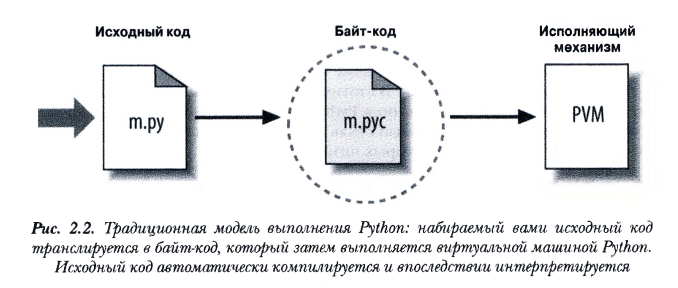

Читатели с опытом программирования на полностью компилируемых языках, таких как С и C++, могут отметить несколько отличий в модели Python. 
* Во-первых, в работе Python обычно отсутствует шаг построения или “сборки”: код выполняется немедленно после того, как был набран. 
* Во-вторых, байт-код Python не является двоичным машинным кодом (например, инструкциями для процессора Intel или ARM). Байт-код — это представление, специфичное для Python.

**Код Python может выполняться медленнее, чем компилируемые и чуть быстрее, чем чисто интерпретируемые ЯП потому что:**
1. циклу PVM, а не центральному процессору, необходимо интерпретировать байт-код, к тому же инструкции байт-кода требуют большего объема работы, чем инструкции центрального процессора. 
2. С другой стороны, в отличие от классических интерпретаторов по-прежнему имеется внутренний шаг компиляции — Python не нуждается в частом повторном анализе и разборе текста каждого оператора исходного кода. 

В результате чистый код Python выполняется со скоростью,
находящейся между скоростью традиционного компилируемого языка и скоростью традиционного интерпретируемого языка.

**! НЕТ НИКАКОЙ РАЗНИЦЫ В СРЕДАХ РАЗРАБОТКИ И ВЫПОЛНЕНИЯ ДЛЯ PYTHON**

Нет никакой необходимости в предварительной компиляции и связывании, прежде чем выполнение может начаться; просто набирайте и запускайте код. 

С фундаментальной точки зрения мы на самом деле имеем в Python лишь **исполняющий механизм** — начальная стадия компиляции отсутствует и все делается во время
выполнения программы. Сюда входят даже такие операции, как создание функций и классов, плюс связывание модулей. **В статических языках** указанные события происходят перед стадией выполнения, но в Python — во время выполнения. Как мы увидим, это поощряет более динамичный стиль программирования, нежели тот, который
может быть привычным для некоторых читателей.

## Модели выполения

5 (+2) реализация языка Python: 
1. CPython - стандартная реализация
2. Jython - для прямого доступа к компонентам Java
3. IronPython - для прямого доступа к компонентам .Net
4. Stackless
5. PyPy - ускоренная версия CPython
6. *Cython* (смесь Python и С)
7. *Shed Skin* (статическая типизация)

**CPython (стандартная реализация Python)**

Она написана на переносном языке ANSI C. Эталонная реализация языка.

**Jython: Python для Java**

Альтернативная реализация языка Python, направленная на интеграцию с языком программирования
Java. Система Jython состоит из классов Java, которые компилируют исходный код
Python в байт-код Java и затем направляют результирующий байт-код виртуальной машине Java.

Цель Jython — дать возможность снабжать сценариями Python приложения Java
почти как CPython позволяет снабжать сценариями Python компоненты С и C++

**IronPython: Python для .NET**

Призвана снабдить программы Python возможностью интеграции с приложениями,
ориентированными на работу с платформой Microsoft .NET Framework для Windows,
а также с эквивалентом с открытым кодом Mono для Linux. Платформа .NET и ее исполняющая система языка программирования C# спроектированы так, чтобы быть
уровнем взаимодействия между объектами, нейтральным к языкам, в духе более ранней модели СОМ от Microsoft. Система IronPython позволяет программам Python действовать в качестве клиентских и серверных компонентов, извлекать пользу от доступности в и из остальных языков .NET и использовать внутри кода Python технологии
.NET вроде инфраструктуры Silverlight.

**Stackless: Python для обеспечения параллелизма**

Stackless Python представляет собой усовершенствованную версию и новую реализацию стандартного языка CPython, ориентированную на предстоящий **параллелизм**. Поскольку Stackless Python не сохраняет состояние в
стеке вызовов языка С, она может облегчить перенос Python в архитектуры с небольшими стеками, предлагает эффективные варианты многопроцессорной обработки и
благоприятствует использованию новаторских программных структур, таких как сопрограммы.

Помимо всего прочего **микропотоки**, которые Stackless добавляет в Python, являются эффективной и легковесной альтернативой стандартных инструментов многозадачности Python, подобных потокам и процессам, а также обещают лучшую
структуру программ, более читабельный код и повышенную продуктивность труда
программистов. 

**РуРу: Python для обеспечения высокой скорости выполнения**

Система РуРу — еще одна новая реализация стандартной системы CPython, ориентированная на производительность. Она предлагает быструю реализацию Python с JITкомпилятором (just-in-time — оперативный), предоставляет инструменты для модели
“песочницы”, которая способна выполнять ненадежный код в защищенной среде, и
по умолчанию включает поддержку для рассмотренной выше системы Stackless Python
и ее микропотоков с целью поддержки массового параллелизма.

В действительности **JIT-компилятор**
является всего лишь расширением машины PVM (самый правый блок на рис. 2.2), которое транслирует порции байт-кода до самого двоичного машинного кода для более
быстрого выполнения. JIT-компилятор делает это в ходе выполнения программы, а не
на шаге компиляции, предваряющем запуск, и способен создавать машинный код, специфичный к типам, для кода на динамическом языке Python, путем отслеживания типов данных объектов, которые программа обрабатывает. За счет замены порций байткода подобным образом программа по мере своего выполнения работает все быстрее
и быстрее. Вдобавок некоторые программы Python могут также занимать меньше памяти, когда выполняются под управлением РуРу.


## Инструменты оптимизации выполнения

CPython и большинство альтернатив, рассмотренных в предыдущем разделе, реализуют язык Python похожими способами: путем компиляции исходного кода в байткод и выполнения байт-кода на подходящей виртуальной машине. Некоторые системы, такие как гибрид Cython, транслятор Shed Skin C++ и JIT-компиляторы в РуРу и
Psyco, взамен пытаются оптимизировать базовую модель выполнения.

**Cython: гибрид Python/C**

Система Cython (основанная на работе в рамках проекта Pyrex) представляет собой
гибридный язык, который объединяет код Python с возможностью вызова функций
С и использования объявлений типов С для переменных, параметров и атрибутов
классов. Код Cython может компилироваться в код С, где применяется API-интерфейс
Python/C, который затем можно скомпилировать полностью

**Shed Skin: транслятор Python в C++**

Shed Skin — это развивающаяся система, в которой принят другой подход к выполнению программ Python; она пытается транслировать исходный код Python в код C++,
который затем с помощью имеющегося компилятора C++ компилируется в машинный
код. Как таковая, она представляет нейтральный к платформам подход к выполнению
кода Python.

## Фиксированные двоичные файлы

Возможна также генерация **автономоных фиксированных двоичных исполняемых файлов** из байт-кода Python. Фиксированные двоичные файлы объединяют в единственный пакет байт-код ваших файлов программ вместе с машиной PVM (интерпретатором) и любыми необходимыми файлами поддержки.

**Фиксированные двоичные файлы** — не то же самое, что и выход настоящего компилятора; они выполняют байт-код через виртуальную машину Следовательно, не считая
возможного улучшения показателей начального запуска, фиксированные двоичные
файлы выполняются с такой же скоростью, как исходные файлы. Фиксированные двоичные файлы, как правило, не имеют малых размеров (они содержат машину PVM),
но по текущим стандартам **не являются необычно большими**. Из-за того, что Python
встраивается в фиксированный двоичный файл, он не требует установки на стороне
получателя, чтобы программу можно было запустить. Вдобавок поскольку код также
встраивается в фиксированный двоичный файл, он более эффективно скрывается от
получателей.

* система ру2ехе только для Windows, но с широкой поддержкой Windows; система
* РуInstaller, похожая на ру2ехе, но работает также в средах Linux и Mac OS X и может
генерировать самоустанавливающиеся двоичные файлы; система ру2арр для создания
приложений Mac OS X; 
* первоначальная система freeze, система cx_freeze, 

## Как пользователь выполняет программы

Пространство имен - это пакет имен переменных. 

Пространство имен может быть автономным: из одного пространства имен не видно имен другого пространства имен. 

Атрибут - имя переменной, прикрепленной к специфическому объекту.

Оператор ``from`` объединяет пространств имен.  

import или from. Важно отметить, что оператор from в некотором смысле аннулирует цель разделения на пространства имен, преследуемую модулями. Поскольку from копирует переменные из одного файла в другой, он
безо всякого предупреждения может привести к переписыванию одинаково именованных переменных в файле, в который производится импорт.
Такое действие по существу объединяет вместе пространства имен, во всяком случае, с точки зрения копируемых переменных.
По указанной причине некоторые рекомендуют всегда применять import,
а не from. Тем не менее, я не буду заходить настолько далеко; оператор
from не только требует меньшего клавиатурного набора (ценное качество
при работе в интерактивной подсказке), но и описанная выше проблема
на практике возникает довольно редко. Вдобавок это именно то, что вы
контролируете, перечисляя желаемые переменные в операторе from. До
тех пор, пока вы осознаете, что им будут присвоены значения в целевом
модуле, такое действие не более опасно, чем операторы присваивания —
еще одно средство, которым вы непременно будете пользоваться!

In [ ]:
ехес(open('script1.ру').read())

In [4]:
import sys
sys.platform

'win32'

 Другие файлы могут получать доступ к элементам, определенным в модуле, импортируя этот модуль — операции импорта по существу загружают другой файл
и предоставляют доступ к его содержимому. Содержимое модуля делается доступным
внешнему миру через его атрибуты (термин, который объясняется в следующем разделе).
Такая модель служб на основе модулей оказывается основной идеей программной
архитектуры в Python. Более крупные программы обычно принимают форму множества файлов модулей, которые импортируют инструменты из других файлов модулей.
Один из модулей предназначен быть главным файлом либо файлом верхнего уровня, или
“сценарием” — файлом, запускаемым для старта целой программы, которая выполняется строка за строкой обычным образом. Ниже данного уровня все модули импортируют другие модули.

Не менее важно и то, что каждый модуль представляет собой автономное пространство имен: один файл модуля не может видеть имена,
определенные в другом файле, до тех пор, пока явно не импортирует другой файл. Изза этого модули содействуют минимизации конфликтов имен в коде — поскольку каждый файл является автономным пространством имен, имена в одном файле не могут
конфликтовать с именами в другом файле, даже если они написаны одинаково.
Фактически модули — один из немногих способов, которыми Python делает все возможное, чтобы упаковать ваши переменные в группы во избежание конфликтов имен.
Позже в книге мы еще будем обсуждать модули и другие конструкции пространств
имен, в том числе локальные области видимости, определяемые классами и функциями. А пока модули пригодятся в качестве способа многократного выполнения кода
без необходимости в его повторном наборе и предотвращения непредумышленного
замещения имен, определенных в файлах.


# Динамическая типизация

Типы в Python автоматически определяются во время выполнения, а не в ответ на объявление в коде. 

In [ ]:
a=3 # Мы не определили заранее, что это int

Переменная создается при первом присваивании ей значения. Переменная не располагает информацией о типе, т.к. тип обитает в объекте, а не в имени. 

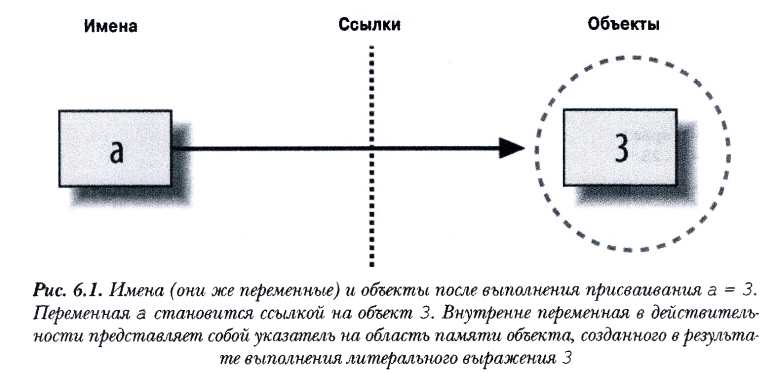

* Переменные — это записи в системной таблице, в которых предусмотрены места для связей с объектами
* Объекты — это области выделенной памяти с достаточным пространством для представления значений, для которых они предназначены.
* Ссылки — это следуемые указатели от переменных к объектам.

Каждый объект содержит 2 заголовочныъ поля:
* Обозначение типа - пометка типа объекта
* Счетчик ссылок, который используется для того, чтобы определить, когда можно освободить память, которую занимает объект

In [1]:
a=3
print(type(a))
a='SPAM'
print(type(a))
a=1.23
print(type(a))

<class 'int'>
<class 'str'>
<class 'float'>


!!! Типы обитают в объектах, а не в переменных. Имена не имеют типов, мы не изменяем тип переменной ``а``, мы просто делаем переменную ссылкой на объект другого типа.

Объектам известно какого они типа

In [2]:
a=3
print(type(a))
a='SPAM'
print(type(a))

<class 'int'>
<class 'str'>


В Python при присваивании нового объекта области памяти, занимаемая предыдущим объектом, освобождается в случае, если на него не ссылается любое другое имя. Это автоматическое совобождение памяти известно как **сборка мусора**

In [3]:
х = 42
х = "shrubbery"# Освободить память занимаемую 42
# (если нет ссылок где-то еще)
х = 3.1415# Освободить память, занимаемую 'shrubbery'
х = [1, 2, 3]# Освободить память, занимаемую 3.1415

Каждый раз, когда переменной присваивается  новый объект, Python освобождает память, занятую предыдущим объектом (если на него нет ссылок) -  т.е. область памяти объекта автоматически попадает в пул
свободного пространства, чтобы быть задействованной каким-то будущим объектом.


В каждом объекте за это свойство отвечает счетчик ссылок, который отслеживает число ссылок, указывающих на объект. 

Когда счетчик ссылок = 0, то область памяти автоматически освобождается. 

In [13]:
x = 42 # счетчик = 1
x = "shrubbery"# счетчик старого объекта = 0, нового=1
x = 3.1415
x = [1, 2, 3]

Автоматическая сборка мусора позволяет сократить длину кода (относительно ЯП, в которых надо управлять памятью, вроде C++). 

! Но у счетчика ссылок есть классическая проблема циклических ссылок. 

In [5]:
L=[1,2,3]
L.append(L)
L

[1, 2, 3, [...]]

## Вызов счетчика ссылок

In [14]:
import sys
sys.getrefcount(x)

2

Т.к. 1 используется в IDLE, то у него будет большой счетчик ссылок

In [30]:
import sys
sys.getrefcount(1) 

1000011446

## Разделяемые ссылки

In [ ]:
a=3
b=a

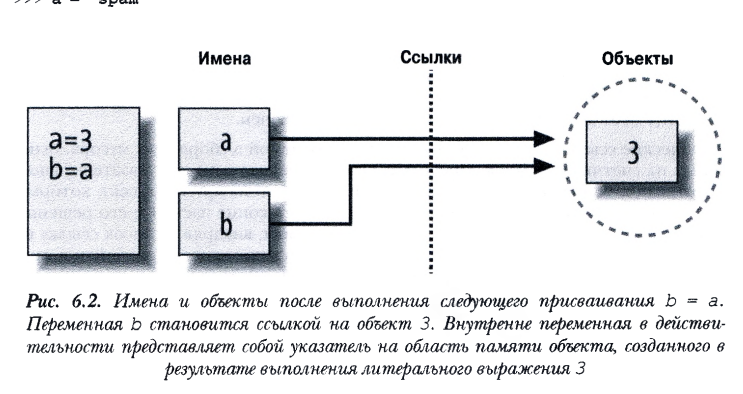

Обе переменные ссылаются на один и тот же объект. 

In [16]:
a=3
b=a
a='spam'
print(b)

3


Для неизменяемых объектов само присваивание переменной влияет только на одну
переменную, которой производится присваивание. 

Однако когда задействованы изменяемые объекты и изменения на месте, картина становится несколько иной.

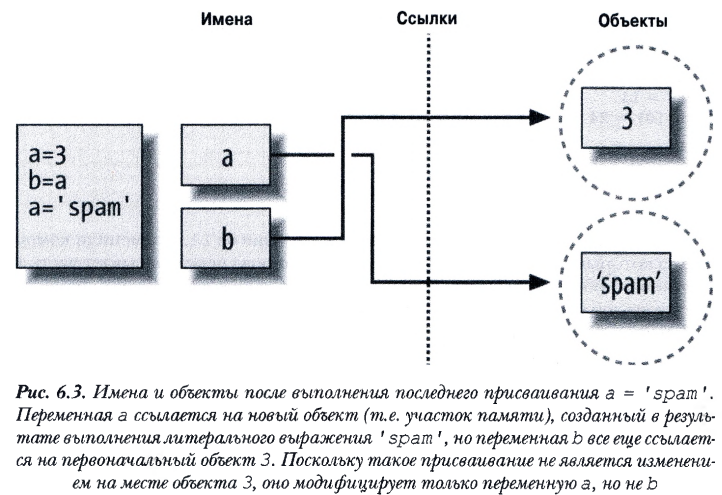

## Изменяемые объекты

In [18]:
L1=[2,3,4]
L2=L1
L1=24
print(L2)

[2, 3, 4]


In [20]:
L1=[2,3,4] # Изменяемый объект
L2=L1 # Создаем ссылку на тот же объект
L1[0]=24 # Изменение на месте 
print(L2) #

[24, 3, 4]


Мы не модифицировали сам список L1, а изменили компонент объекта, на который L1 ссылается. 

## Копирование объектов

In [21]:
L1=[2,3,4] # Изменяемый объект
L2=L1[:] # Создаем ссылку на тот же объект
L1[0]=24 # Изменение на месте 
print(L2) #

[2, 3, 4]


Для словарей и множеств для копирования нужно поступать следующим образом. 

In [24]:
import copy
X=copy.copy(Y) # Поверхностная копия
X=copy.deepcopy(Y) # Глубокая копия

## Одинаковые ли объекты

In [25]:
L= [1, 2, 3]
М = L # М и L ссылаются на один и тот же объект
print(L == М) # Одинаковые значения
print(L is М) # Одинаковые объекты

True
True


* Операция ``is`` проверяет на идентичность (совпадение) объектов в памяти.  Сравнивает указатели, которые реализуют ссылки. 

In [27]:
L = [1, 2, 3]
М = [1, 2, 3]
print(L == М)
print(L is М)

True
False


**НО:** для небольших целых чисел используются одни и те же объекты. 

In [28]:
x = 42
y = 42
print(x == y)
print(x is y)

True
True


# Регулярные выражения

## Введение

[Тестирование регулярных выражений](https://regex101.com/)

**Регулярное выражение**– это средство работы с текстом, которое позволяет по заданному «паттерну» искать и редактировать искомое слово/строку в тексте.

Регулярные выражения встроены в некоторые языки программирования

Базовая концепция - мы сначала описываем шаблон, а потом находим все подстроки подхдящие под этот шаблон. 

**Зачем вообще возиться с регулярными выражениями?**
* Сравнение с шаблоном: Регулярные выражения отлично помогают определять, соответствует ли строка тому или иному формату – например, телефонному номеру, адресу электронной почты или номеру кредитной карты.
* Замена: При помощи регулярных выражений легко находить и заменять шаблоны в строке.
* Извлечение: При помощи регулярных выражений легко извлекать из шаблона фрагменты информации.
* Портируемость: Почти в любом распространенном языке программирования есть своя библиотека регулярных выражений. Синтаксис в основном стандартизирован, поэтому вам не придется переучиваться регулярным выражениям при переходе на новый язык.
* Четкость и лаконичность: Если вы с регулярными выражениями на «ты», то сможете выполнять весьма нетривиальные операции, написав минимальный объем кода.


## Сырые и f строки 

**Сырые строки**

* ``r`` - сырая строка.

В такой строке отключается экранирование. Это значит, что обратный слеш считается самостоятельным символом. Основное применение сырых строк – работа с регулярными выражениями.

In [82]:
common_string = 'C:\file.txt' # Обычная строка
raw_string = r'C:\file.txt' # Сырая строка

**f-строки**

* ``f`` - сырая строка.

Символы, которые ставятся перед началом строки, и изменяют её поведение, называются префиксами. Ещё один префикс, который понадобится в курсе - это префикс f. Он позволяет форматировать строку, вставляя в неё какие-либо выражения:

In [83]:
a = 1
b = 2
# Добавляем выражения в строку с помощью специального синтаксиса {}
print(f"{a} + {b} = {a + b}")      # 1 + 2 = 3
print(f"5! = {1 * 2 * 3 * 4 * 5}") # 5! = 120

1 + 2 = 3
5! = 120


**Комбинация ``f`` и ``r``**

In [84]:
# Используем 2 префикса одновременно:
raw_f_string = rf'C:\file.txt'
f_raw_string = fr'C:\file.txt'

Никакой разницы в порядке нет

## **Экранирование**

 Если нам нужно использовать какой-то спецсимвол как простой текст, то достаточно поставить перед ним ``\``, как и в обычных строках Python

In [85]:
# Вместо \n мы получим переход на новую строку
print("Переносим\nстроку")

# Вместо \\' получаем вывод \'
# Первый \ экранирует второй \, и он исчезает из вывода 
print("\\'")

Переносим
строку
\'


In [86]:
# Теперь тут выводится строка: Переносим\nстроку
print("Переносим\\nстроку")

# Вместо вывода, который мы ожидали, снова получаем такой: \'
print("\\\'")

# Для того, чтобы исправить эту ситуацию, добавим ещё один обратный слеш!
print("\\\\'")
# И только сейчас мы получим вывод: \\'

Переносим\nстроку
\'
\\'


In [87]:
# Отключаем экранирование всей строки префиксом r:
print(r"Переносим\nстроку")
print(r"\\'")

# Отключаем экранирование каждой последовательности с помощью слешей:
print("Переносим\\nстроку")
print("\\\\'")

Переносим\nстроку
\\'
Переносим\nстроку
\\'


In [88]:

print("\\n")

print("\\\n")

print(r"\\n")

print("\\\\n")

print(fr"\\n")

print("r\\n")

print(f"\\n")

print(rf"\\n")

\n
\

\\n
\\n
\\n
r\n
\n
\\n


In [89]:
from string import printable

print(printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [90]:
'<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ !"#$%&\'()*+,-./0123456789:;'

'<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ !"#$%&\'()*+,-./0123456789:;'

## **Квадратные скобки ``[]``**

``[]`` - это 1 символ!

**(1)** Если мы хотим заменить один из указанных нескольких символов

In [91]:
r'[cr1]'     # Найдёт c, r, и 1
r'[cr]at'    # Найдёт слова cat и rat
r'[12]7[56]' # Найдёт 175, 176, 275, 276

'[12]7[56]'

In [ ]:
r'[cr1]' # Найдёт c, r, и 1
r'[rc1]' # Найдёт c, r, и 1
r'[1cr]' # Найдёт c, r, и 1
r'[1rc]' # Найдёт c, r, и 1
r'[c1r]' # Найдёт c, r, и 1
r'[r1c]' # Найдёт c, r, и 1
# Все регулярные выражения сверху выдают один и тот же результат

**(2)** Если мы хотим заменить один из указанных нескольких символов

In [ ]:
r'[^12]'  # Найдёт всё, кроме 1 и 2
r'[^12]7' # Найдёт все последовательности, что заканчиваются на 7, и не начинаются на 1 и 2

In [92]:
r'[0^]_[0^]' # Найдёт 0_0, 0_^, ^_0, ^_^
r'[\^0]_[\^0]' # Найдёт 0_0, 0_^, ^_0, ^_^

'[\\^0]_[\\^0]'

**(3)** Регулярное выражение в скобках можно сократить вот так:

In [ ]:
r'[0-9]' # То же самое, что и [0123456789]
r'[a-z]' # То же самое, что и [abcdefghijklmnopqrstuvwxyz]
r'[A-Z]' # То же самое, что и [ABCDEFGHIJKLMNOPQRSTUVWXYZ]
r'[а-я]' # То же самое, что и [абвгдежзийклмнопрстуфхцчшщъыьэюя]
r'[А-Я]' # То же самое, что и [АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ]

In [ ]:
r'[4-7]' # То же самое, что и [4567]
r'[x-z]' # То же самое, что и [xyz]
r'[B-D]' # То же самое, что и [BCD]
r'[а-ж]' # То же самое, что и [абвгдеж]
r'[П-Т]' # То же самое, что и [ПРСТ]
r'[6-D]' # То же самое, что и [6789:;<=>?@ABCD]

In [ ]:
r'[4-7qwerty]' # То же самое, что и [qwerty4567]
r'[23x-z1]'    # То же самое, что и [xyz123]
r'[B-DF]'      # То же самое, что и [BCDF]

регулярное выражение [21-47] не найдёт числа от 21 до 47, оно будет равносильно выражению [212347]

In [ ]:
r'[4\-7]' # Найдёт 4, -, и 7
r'[-xz]'  # Найдёт -, x, и z
r'[^-xz]' # Найдёт всё, кроме -, x, и z
r'[BD-]'  # Найдёт B, D, и -

**(4)** Исключение символов можно тоже сократить:

In [ ]:
r'[^0-9]' # То же самое, что и [^0123456789]
r'[^a-z]' # То же самое, что и [^abcdefghijklmnopqrstuvwxyz]
r'[^A-Z]' # То же самое, что и [^ABCDEFGHIJKLMNOPQRSTUVWXYZ]
r'[^а-я]' # То же самое, что и [^абвгдежзийклмнопрстуфхцчшщъыьэюя]
r'[^А-Я]' # То же самое, что и [^АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ]

In [ ]:
r'[^4-7]' # То же самое, что и [^4567]
r'[^x-z]' # То же самое, что и [^xyz]
r'[^B-D]' # То же самое, что и [^BCD]
r'[^а-ж]' # То же самое, что и [^абвгдеж]
r'[^П-Т]' # То же самое, что и [^ПРСТ]
r'[^6-D]' # То же самое, что и [^6789:;<=>?@ABCD]

In [ ]:
r'[^4-7qwerty]' # То же самое, что и [^qwerty4567]
r'[^23x-z1]'    # То же самое, что и [^xyz123]
r'[^B-DF]'      # То же самое, что и [^BCDF]

**(5)** Можно использовать столько сокращений, сколько мы захотим

In [ ]:
r'[a-zA-Z0-9]' # То же самое, что [abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789]
r'[^э-я1-3]'   # То же самое, что и [^эюя123

**(6)** Если квадратные скобки нужно использовать как обычный текст - достаточно их просто экранировать:

In [ ]:
r'\[\]' # Найдет []

## Шаблоны

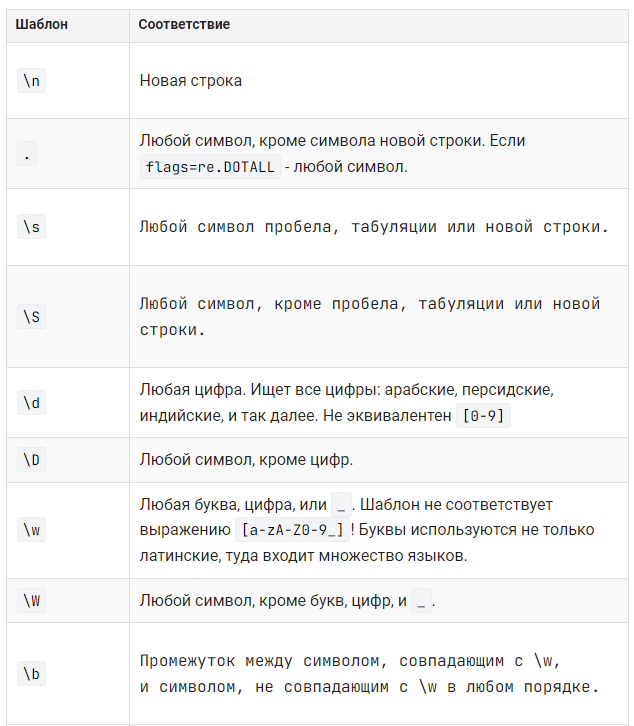

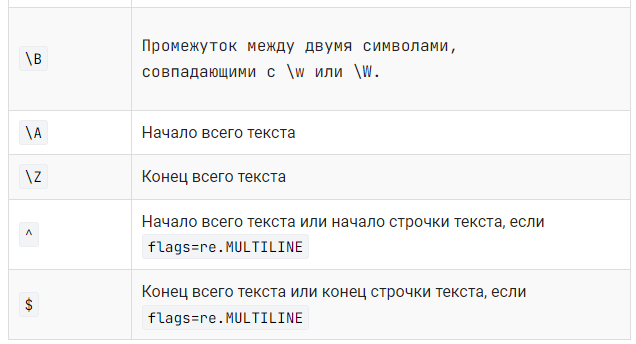

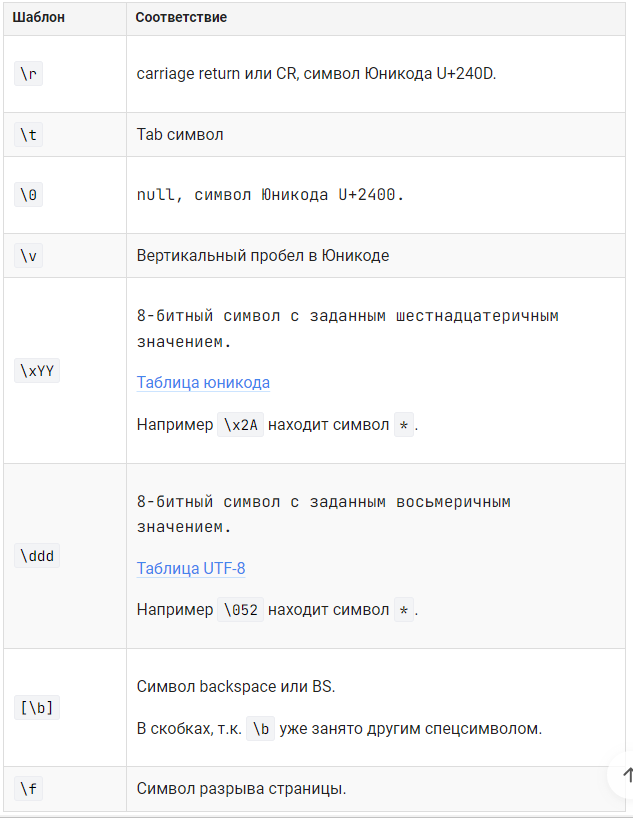

**``$``**

In [ ]:
r'[A$Z]'  # Ищет символы A,$,Z
r'^text$' # Ищет text между началом и концом строки
r'100\$'  # Ищет 100$

**``^``**

In [ ]:
r"[^abc]"      # Ищет любой символ, кроме a,b,c
r"^Some text$" # Ищет Some text между началом и концом строки
r"\^"          # Ищет символ ^ 
r"[a^bc]"      # Символ ^ не стоит первым в скобках, поэтому выражение ищет символы a,b,c,^

**``.``**

In [ ]:
r'[A.Z]'     # Ищет символы A,.,Z
r'text.'     # Ищет text с любым символом, кроме перехода на новую строку
r'1\.000\$'  # Ищет 1.000$

**``-``**

In [ ]:
r'Как-то так' # Ищет Как-то так
r'[+-]'       # Ищет символы +,-
r'[^-+]'      # Ищет любой символ, кроме +, -
r'[a-z]'      # Ищет все буквы латинского алфавита в нижнем регистре
r'[a\-z]'     # Ищет символы a,-,z

**``[]``**

In [ ]:
r'[abc]'   # Ищет символы a,b,c
r'\[abc\]' # Ищет [abc]
r'[\[abc\]]' # Ищет символы [,a,b,c,]

* ``^чебурек`` - **означает, что весь текст должен начинаться с шаблона "чебурек";**

* ``чебурек$`` - **означает, что весь текст должен закончится шаблоном "чебурек";**

* ``^чебурек$`` - **означает, что весь текст - это и есть "чебурек", потому что текст должен закончится им и начаться.**

**``\b`` и ``\B``**

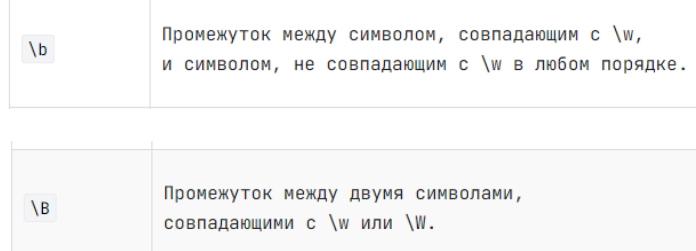

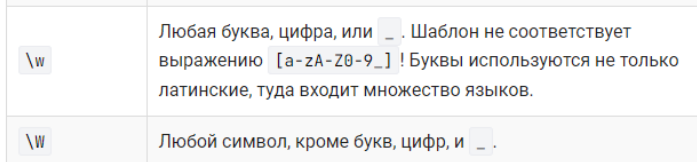

Т.е.
* ``\b`` - символ стоит после любого символа (цифры, буквы любого языка и _) и до некоторого знака, который к ним не относится
* ``\B`` - символ лежит между двумя знаками или двумя символами

Оно найдёт 123 в следующих примерах:
#123%
 123 
123
(123)
^123$
-123.

И пропустит 123 в этих примерах:
a123b
g123
123g
123_
_123
11234

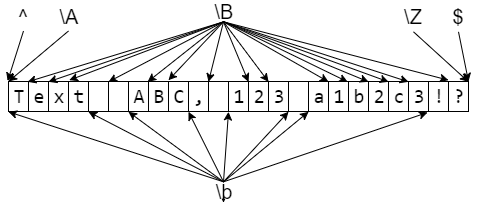

**``\b``**

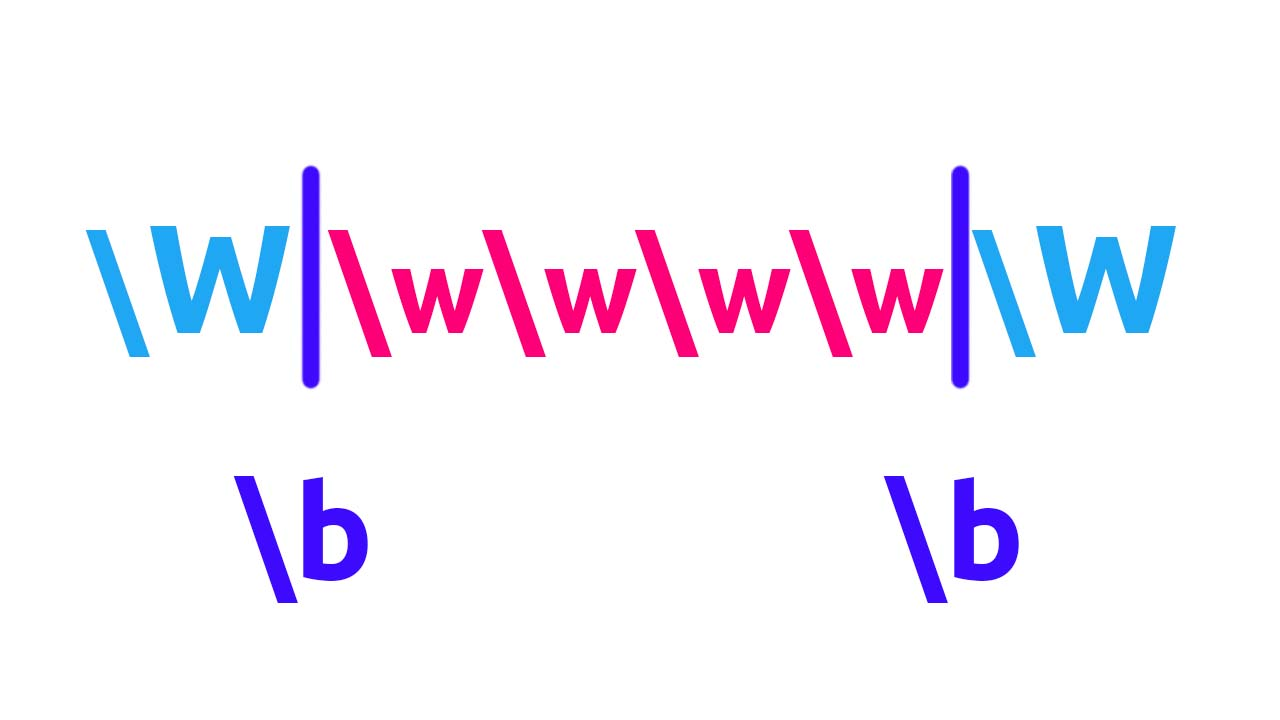

**``\B``**

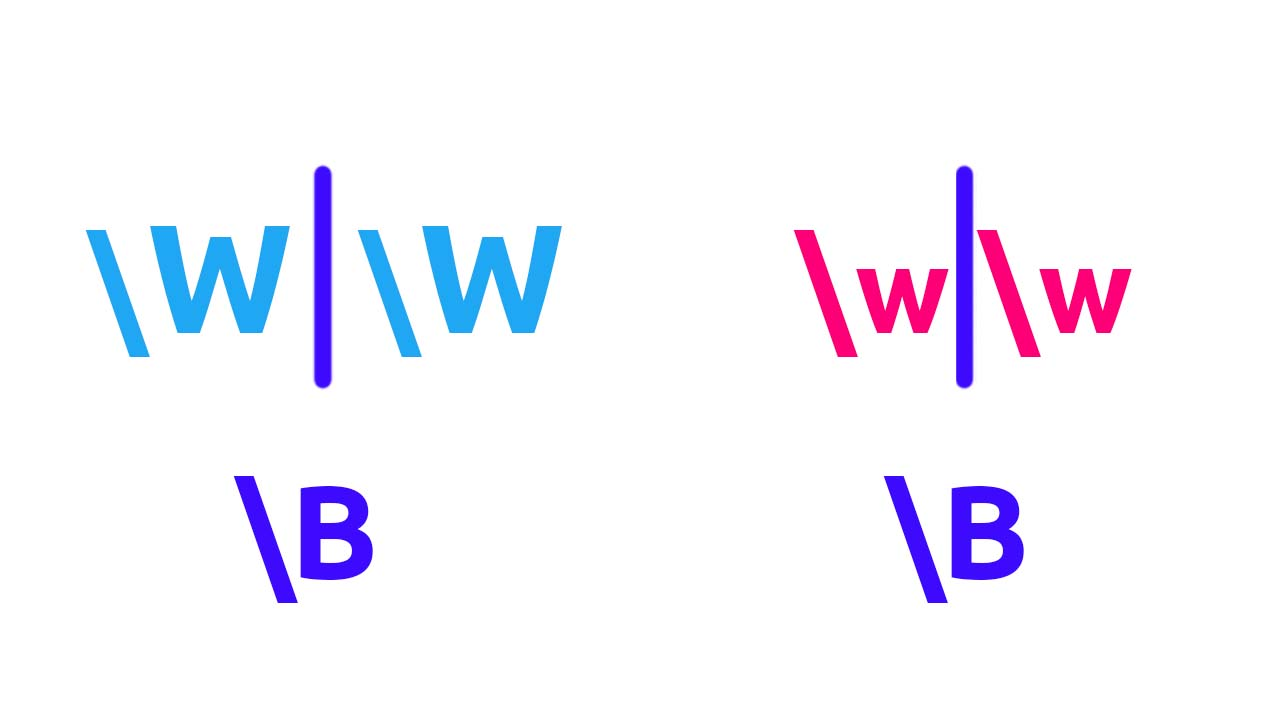

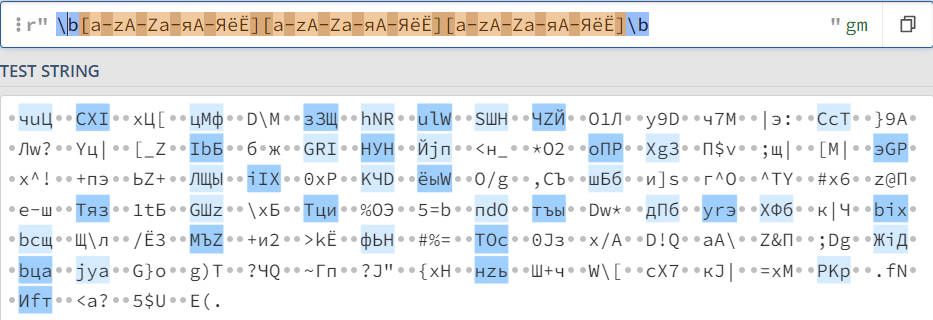

## Жадные квантификаторы

Очень часто, когда нужно использовать несколько шаблонов подряд, приходится их писать друг за другом. Например, если мы хотим найти 3 цифры подряд мы напишем:

In [93]:
r'\d\d\d'

'\\d\\d\\d'

In [94]:
r'\d{3}'

'\\d{3}'

**Квантификатор** - конструкция, которая позволяет указывать количество повторений.

* В каждом квантификаторе учитываются и начало, и конец отрезка.
* Каждый квантификатор по умолчанию - жадный. **Жадные квантификаторы** пытаются захватить как можно больше символов.

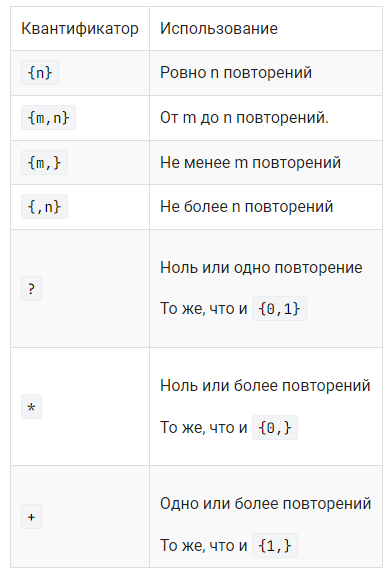

## Ленивые квантификаторы

Если после квантификатора поставить знак ?, то можно его сделать ленивым. Тогда он будет захватывать минимальное количество символов.

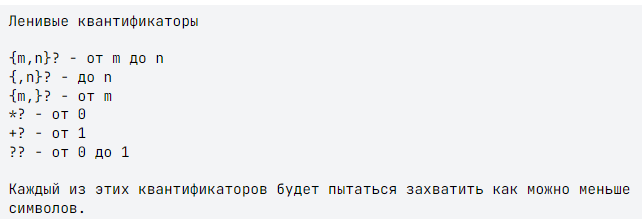

``{n}``=``{n}?``, так как в любом случае он будет искать нужную последовательность n раз, независимо от его жадности

## Группирующие скобки ``()``

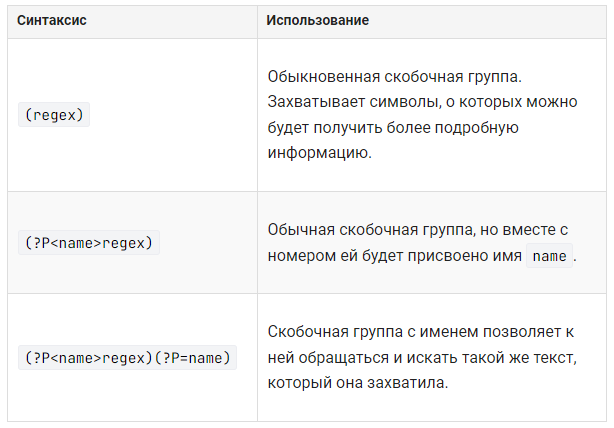

**(1)** Обычная группа ``([a-z]{4})``

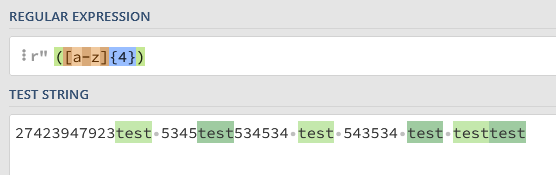

**(2)** Та же группа, только уже именованная ``(?P<name>[a-z]{4})``

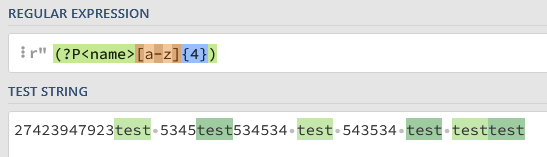

**(3)**  Снова именованная группа, но мы получаем текст, который она захватила ранее благодаря синтаксису ``(?P<name>[a-z]{4})(?P=name)``

НО можно обращаться как по имени, так и по порядку с 1

**"Не может быть подпоследовательностью" - надо выделять ``\b`` с двух сторон**

``\1``, ``\2`` - номера групп

## Условия ``(?(n)yes|no)``

В регулярных выражениях существуют условия. Если у группы ``n`` нашлись совпадения - возвращается шаблон до ``|``. В противном случае возвращается шаблон после ``|``. Шаблон после ``|`` необязателен и может быть опущен.

In [ ]:
regex = r"(a)?(?(1)b|c)"

# Группа (a)? ищет букву a. К группе применён квантификатор ?, 
# т.к. этой буквы может не быть в тексте
# Если в первой группе нашлась буква a, то
# условие (?(1)b|c) ищет букву b
# Если первая группа ничего не нашла, то условие ищет букву c

# В данном примере регулярное выражение найдёт все ab и c в тексте

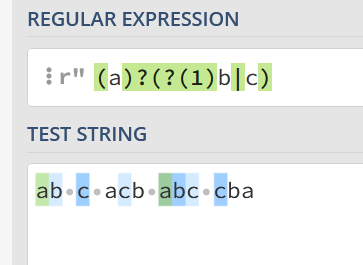

In [ ]:
regex = r"^(\[)?\d(?(1)\]|)$" # Выражение для поиска цифры в
# скобках или без скобок

# Группа (\[)? ищет первую скобку. К группе применён квантификатор ?,
# т.к. скобки может и не быть
# Условие (?(1)\]|) ищет правую скобку, если в первой группе 
# найдена левая скобка.
# Если первая группа ничего не нашла, то условие ничего не ищет.

# Найдёт 1 и [2]
# Проигнорирует 3] и [4

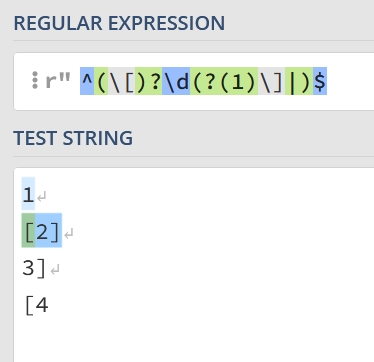

Если из регулярного выражения выше убрать дополнительные проверки, то оно будет находить не совсем то, что нужно:

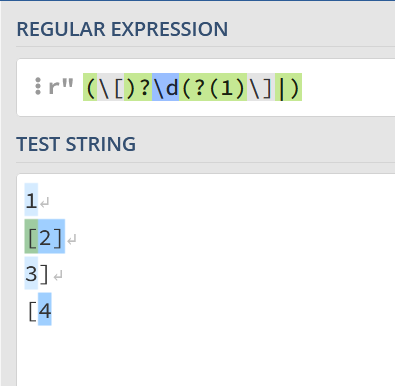

## Скобочные выражения

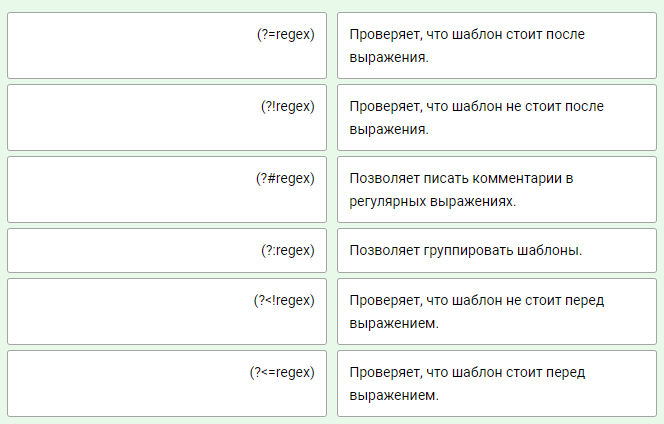

**Comment group**

``(?#)`` - скобочное выражение, позволяющее написать комментарий в регулярном выражении:

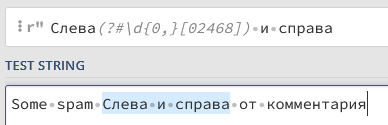

**Non-capturing group**

``(?:)`` - скобочное выражение, которое группирует регулярное выражение, но не захватывает в его группу. Так и называется - Non-capturing group, т.е. группа без захвата.

Его можно использовать, например, чтобы применять квантификаторы сразу к нескольким символам:

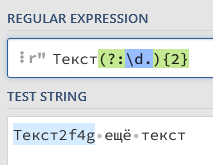

``(?:\d.){2}`` равносильно ``\d.\d.``

**Lookahead и Lookbehind**

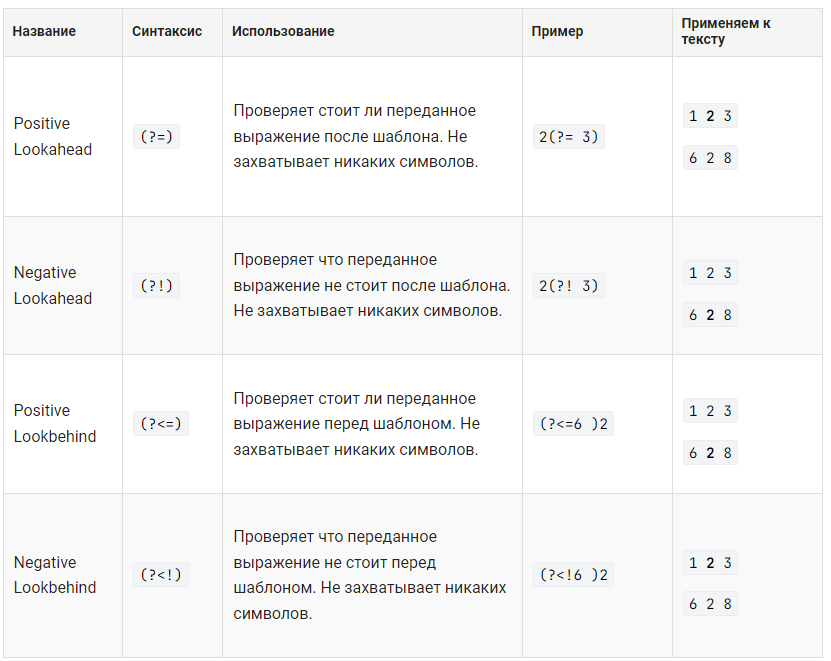

Давайте разберём их работу на наглядном примере. Допустим, нам нужно найти слово ``test``, окружённое среди двух цифр, но сами цифры захватывать не нужно. Тогда мы можем использовать скобочные выражения.

Напишем регулярное выражение, которое ищет слово test среди двух цифр, но не захватывает их: ``(?<=\d)test(?=\d)``.

Всё работает:

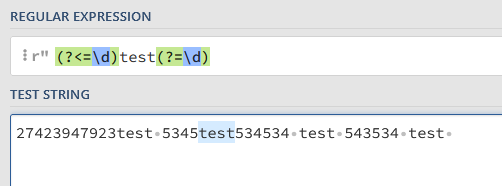

Обратите внимание, что все выражения в ``lookbehind`` должны быть фиксированной ширины, иначе вы получите ошибку ``re.error: look-behind requires fixed-width pattern``.

In [95]:
# Вызовут ошибку:

r'(?<=test{0,})regex'
r'(?<=g?)regex'
r'(?<!Python+)regex'

# Длина вхождений выражений в Lookbehind может быть разной
# Поэтому появится ошибка



# Ошибки не будет:

r'(?<=test)regex'
r'(?<=g{21})regex'
r'(?<!Pytho[mn])regex'

# Длина вхождений выражений в Lookbehind фиксированная
# Всё выполнится без ошибок

'(?<!Pytho[mn])regex'

## Операция ИЛИ

In [ ]:
r'Привет|Пока'

Обратите внимание, что в lookbehind можно использовать ``|``, только если все шаблоны одинаковой длины. То есть такие выражения будут правильными:

In [ ]:
r'(?<=hi!|bye)'
r'(?<![abcdef]|\d)'
r'(?<=\w|\W|\s)'

Такое использование lookbehind вызовет ошибку re.error: look-behind requires fixed-width pattern:

Для того, чтобы обойти такое исключение, нужно использовать | в non-capturing group:

In [ ]:
(?:(?<=hi!)|(?<=long_text))
(?:(?<![abcdef])|(?<!\d{4}))
(?:(?<=\w\s)|(?<=\W))

**Оператор "Или" в квадратных скобках**

Очень часто вижу эту ошибку у учеников, начинающих изучать регулярные выражения. Если вы поставите символ | в квадратные скобки, то ваш шаблон будет просто искать этот символ. Он не будет работать как оператор "Или". 

In [ ]:
# Задача: Нужно найти слово Hi или Bye

wrong_regex = r'[Hi|Bye]'
# Неправильное регулярное выражение, 
# т.к. оно равносильно следующему выражению [BHeiy|]
# Квадратные скобки используются только для 
# замены символов, условие или в них не работает

correct_regex = r'(Hi|Bye)'
# Поставленную выше задачу решает

correct_regex2 = r'(?:Hi|Bye)'
# Non-capturing group идеально подходит для группировки шаблонов

correct_regex3 = r'Hi|Bye'
# Шаблон без групппировки. Также работает, 
# поставленную выше задачу решает

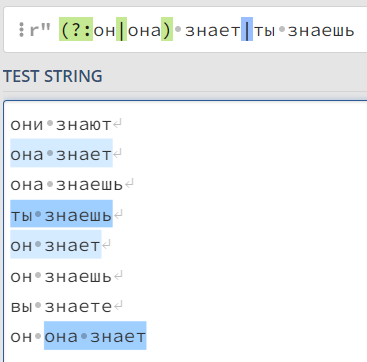

№ 345

Номер 741

Number 194

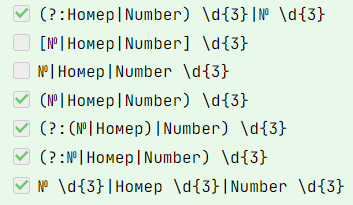

## Примеры

In [ ]:
regex = r'\w*[^A-Zа-яА-Я\s]+\w*\b'

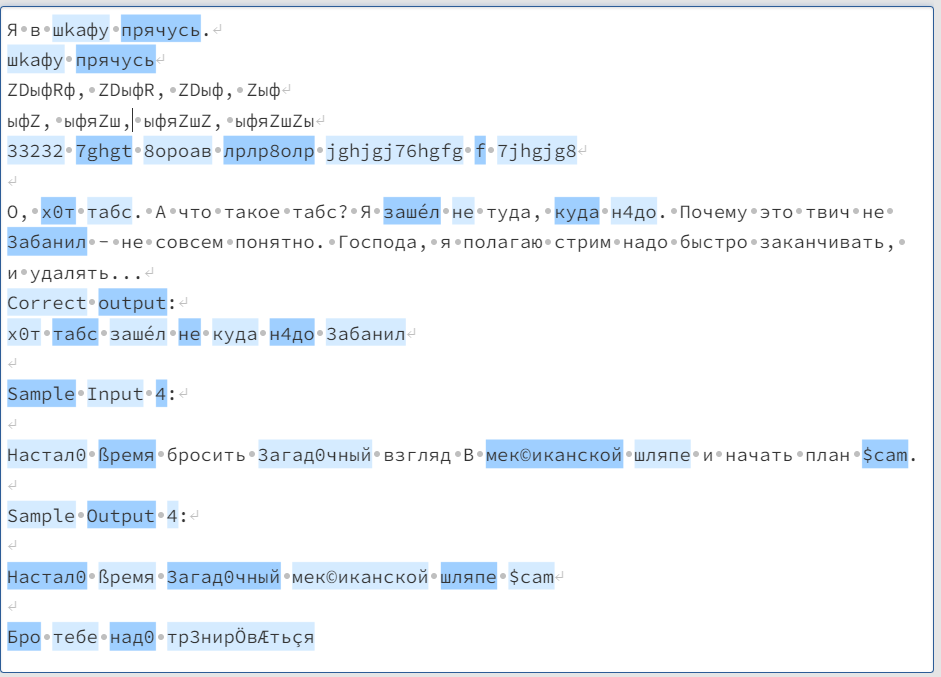

Вместо ``\b`` лучше использовать ``(?<!\S)`` и ``(?!\S)``

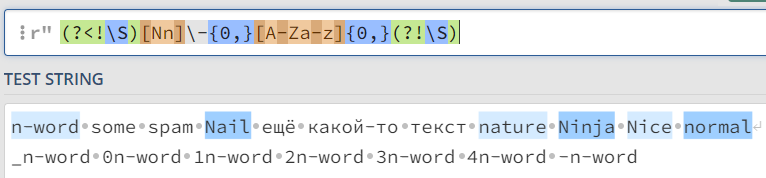

🐫 lowerCamelCase

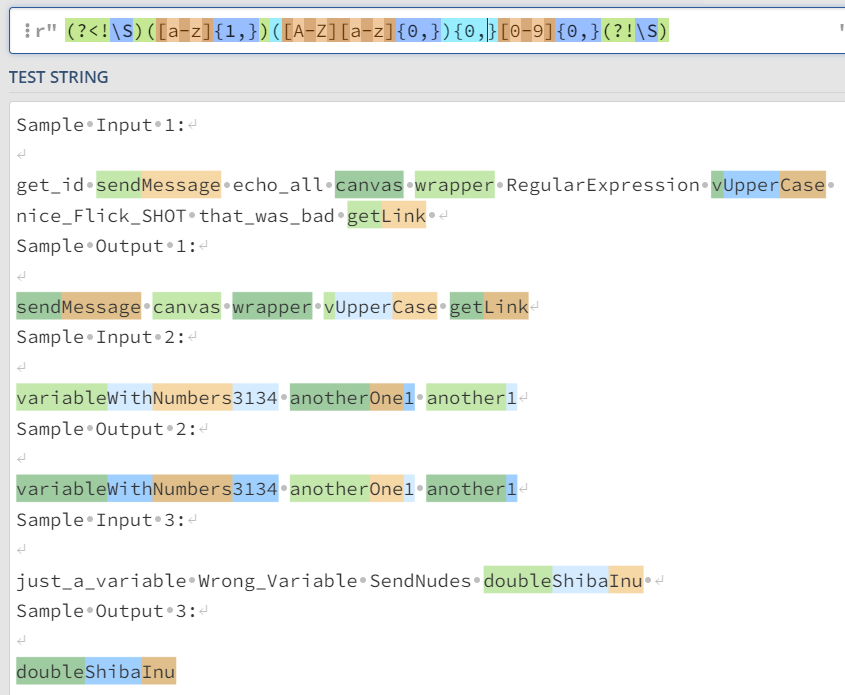

🐍 snake_case

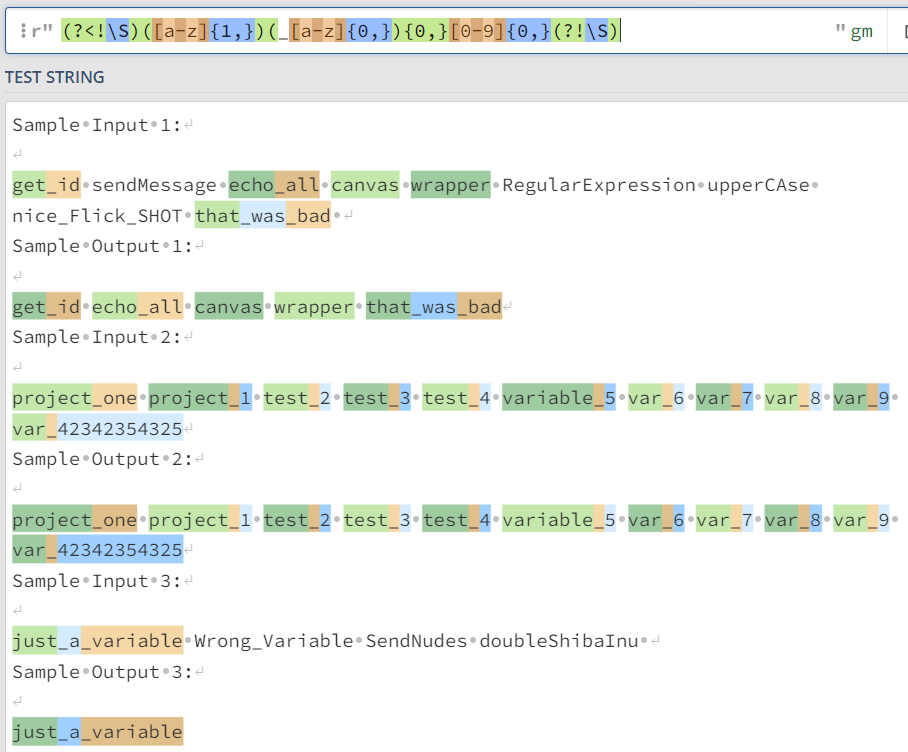

Имена телеграмм

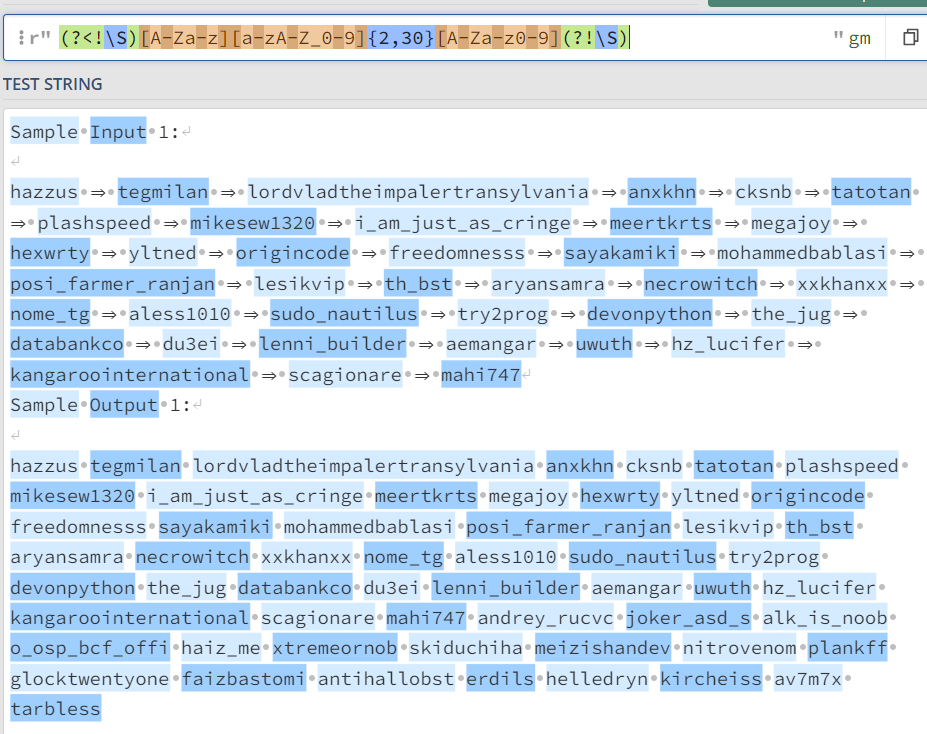

название.расширение

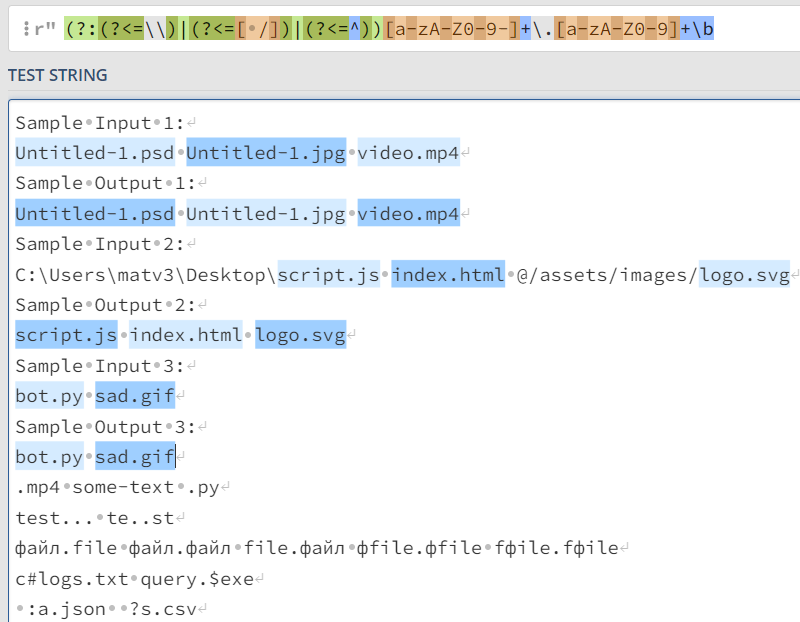

Верные массивы

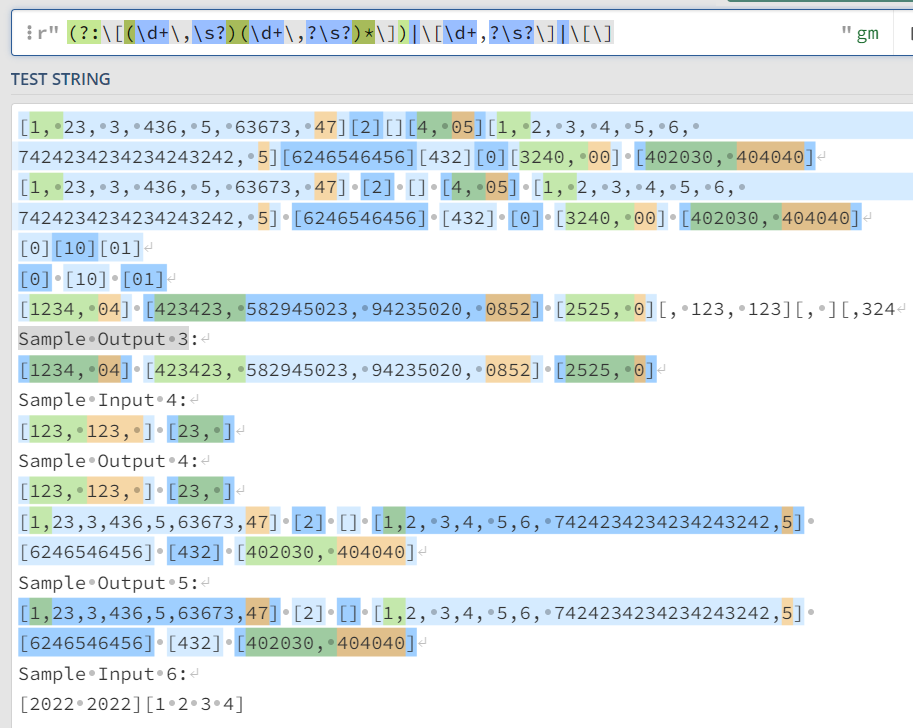

## catastrophic backtracking

Существует атака на сервисы, неправильно использующие регулярные выражения, позволяющая их замедлить или полностью вывести из строя. Такая атака называется ReDoS. Она основана на проблеме регулярных выражений под названием catastrophic backtracking. Если ваш сервис проверяет данные с помощью регулярных выражений с catastrophic backtracking и без дополнительных проверок, то выполнение регулярного выражения может занять очень большое время.

Допустим, у нас есть такое регулярное выражение: ``r"(a+)+b"``. Да, такое выражение можно представить как a+b, но давайте будем считать, что a и b - какие-то очень сложные регулярные выражения. Если строка, в которой мы ищем этот шаблон, не будет содержать b, то выражение перебирает строку огромным количеством способов, пытаясь найти совпадение. Время выполнения растёт экспоненциально:

In [96]:
import re

# Запустим выражение на строке из 20 символов a:
re.findall(r"(a+)+b", "a" * 20) 
# Выполнилось за 0.07218690006993711

# Запустим выражение на строке из 30 символов a:
re.findall(r"(a+)+b", "a" * 30) 
# Выполнилось за 75.4667053000303

# Прирост более чем в тысячу раз!!!

[]

Примеры таких выражений:
* ``(?:a+)+``
* ``([a-zA-Z_]+)*``
* ``(?:a|aa)+``
* ``(a|a?)+``

Есть следующие способы решить эту проблему:

1. Постараться переписать регулярное выражение, если это возможно (сократить количество квантификаторов и условий или)
2. Перед использованием выражения проверять входные данные (например, не принимать слишком большой текст)
3. Использовать специальные средства из модуля re (сейчас мы их пройдём)
4. Контролировать использование регулярного выражения (например, останавливать поиск, если он идёт слишком долго)

## Притяжательный квантификатор

Если после жадного квантификатора поставить +, то он станет притяжательным:
* ``{m,n}+``
* ``{,n}+``
* ``{m,}+``
* ``*+``
* ``++``
* ``?+``

Притяжательные квантификаторы, как и жадные, пытаются найти максимально возможное количество вхождений. Но, в отличие от жадных квантификаторов, они не разрешают back-tracking, когда регулярное выражение не может найти совпадение.

Это значит, что движок не будет проходить огромное количество путей и закончит свою работу раньше, если совпадение не будет найдено.

Как и в случае с ленивыми квантификаторами, смысла делать квантификатор ``{n}`` притяжательным нет.

## Атомарная группировка

Второе решение проблемы с catastrophic backtracking - атомарная группировка: ``(?>regex)``

Пытается найти вхождения regex, как если бы оно было отдельным регулярным выражением. Если совпадения найдены - движок регулярных выражений пытается найти совпадения для оставшейся части регулярного выражения, следующего после атомарной группировки. Если совпадений нет - движок регулярных выражения может откатиться назад только на место до атомарной группировки.

С помощью атомарной группировки можно сказать движку, что откатываться в этом месте и искать всевозможные пути не имеет смысла: внутри ``(?>regex)`` откат запрещён.

Например, выражение ``(?>.*)``. никогда не найдёт совпадений, потому что шаблон ``.*`` нашёл бы все возможные символы в тексте, и оставшаяся ``.`` не смогла бы найти совпадение.

* x{m,n}+ одно и то же, что и (?>x{m,n})
* x*+ одно и то же, что и (?>x*)
* x++ одно и то же, что и (?>x+)
* x?+ одно и то же, что и (?>x?)

In [1]:
import re
regex = r'(?:a)+b'
print(re.findall(regex, 'a'*50))

[]


## Объект Match

Он нужен чтобы получать более детальную информацию о найденных совпадениях. 

У объекта ``Match` есть несколько интересных методов и атрибутов:
* ``expand()``
* **``group()``**
* ``groups()``
* ``groupdict()``
* **``start()``**
* **``end()``**
* **``span()``**
* ``lastindex``
* ``lastgroup``
* **``pos``**
* **``endpos``**
* **``re``**
* **``string``**

**Нулевая группа**

Почти все методы принимают на вход необязательный аргумент __group. Этот аргумент - номер группы, у которой нужно получить соответствующее значение.

С группами мы будем работать позже, поэтому пока будем вызывать методы без аргументов или с аргументом 0.

Нулевая группа - полная строка, которую захватило регулярное выражение.

In [1]:
import re

regex = r'П.+?т'
text = 'Привет, как тебя зовут?'

# Не обращайте внимание на эту функцию, мы её разберём уже на следующем уроке
# Всё, что нужно о ней знать это то, что в результате своей работы она возвращает Match-объект
# В данном случае мы записываем Match-объект в переменную match

match = re.match(regex, text) 
match

<re.Match object; span=(0, 6), match='Привет'>

* ``span`` - индексы начала и конца совпадения
* ``match`` - само совпадение.

* ``group([group1, ...])`` - Возвращает найденное совпадение по номеру группы.
* ``start(__group=0)``, ``end(__group=0)`` - возвращают индексы начала и конца совпадения с регулярным выражением группы, номер которой был передан в метод:
* ``span(__group=0)`` - возвращает кортеж с индексом начала и конца совпадения группы, номер которой был передан в метод. Он работает аналогично методам start, end, но возвращает пару чисел:

In [4]:
print(match.group())  # Если в метод не передать аргумент, то он по умолчанию выведет нулевую группу
print(match.group(0)) # Можно передать номер нужной группы в метод
print(match[0])       # Благодаря геттеру в Match-объекте к группам можно обращаться с помощью квадратных скобок

# Все вызовы сверху выведут совпадение нулевой группы, т.е. всего регулярного выражения
# В данном случае они выведут строку "Привет"

Привет
Привет
Привет


In [5]:
print(match.start())  # 0
print(match.end())    # 6
print(match.start(0)) # 0
print(match.end(0))   # 6

0
6
0
6


In [6]:
print(match.span())  # (0, 6)
print(match.span(0)) # (0, 6)

(0, 6)
(0, 6)


**Атрибуты**
* ``pos`` -  это позиция, с которой функция начинает искать совпадения.
* ``endpos`` - это позиция, до которой функция ищет совпадения
* ``re`` -  получить регулярное выражение, которое использовалось для поиска
* ``string``- получить строку, в которой искались совпадения

In [7]:
print(match.pos) # 0
print(match.endpos) # 23
print(match.re) # re.compile('П.+?т')
print(match.string) # Привет, как тебя зовут?

0
23
re.compile('П.+?т')
Привет, как тебя зовут?


## Методы

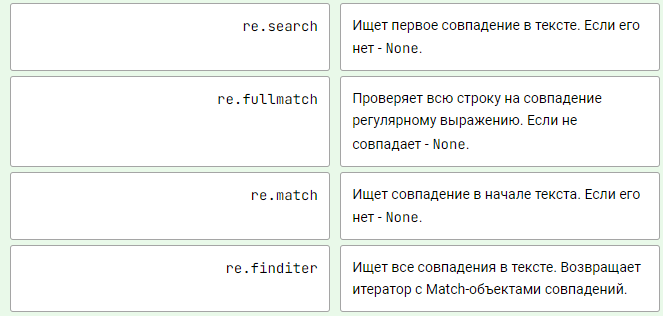

**``re.search(pattern, string, flags=0)``** - ищет первое совпадение в строке

*Параметры:*
* ``pattern`` - регулярное выражение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``flags`` - флаги, пройдём позже

*Output*
* Объект ``Match``, если совпадение было найдено
* ``None``, если нету совпадений

In [180]:
import re
pattern = r'\d{3}'
string = 'abc def fed cba'
# Ищет только одно вхождение, самое первое
result = re.search(pattern, string)

print(result) # <re.Match object; span=(4, 7), match='123'>

None


In [181]:
import re
result = re.search(r'\d{3}', "abcdef")
print(result) # None

None


In [10]:
import re
x='#traveler #traveller #traveltheworld #travelblog #traveladdict #mytravelgram #travels #travelphoto #traveldiaries #travellife #travelawesome #travelpics #natgeotravel #travelholic #travelbug #travelstoke #traveldeeper #travelgirl #luxurytravel #worldtraveler #travelers #solotravel #travelpic #travelmore #travellingthroughtheworld #traveldiary #ilovetravel'
pattern = r'#[a-z]+'
result = re.search(pattern, x)
print(result.group(0) if result else '')

#traveler


In [12]:
# Код писать сюда \(❤‿❤)/
import re
x=[input() for _ in range(3)]
s=0
for i in x:
    match=re.search(r'[Кк]од', input())
    if match!=None:
        print(match.span())
        s=1
        break
if s==0: 
    print('код не найден')

Хочу полететь на Марс(
Секретный код: Dogecoin
Батут работает!
Где ключи от моей Tesla?
ewerw
код не найден


In [14]:
# Код писать сюда \(❤‿❤)/
import re
x=[input() for _ in range(4)]
s=0
for i in range(len(x)):
    match=re.search(r'(?<=Activation key\: )[0-9A-Za-z]{5}\-[0-9A-Za-z]{5}\-[0-9A-Za-z]{5}\-[0-9A-Za-z]{5}\-[0-9A-Za-z]{5}(?<!S)', x[i])
    if match!=None:
        print(match.group())


Activation key: A70PM-KQ-BA-HYF2D-16CMK-OM4FP
JFP9D-7C4Z9-XHFMD-KH3TX-NTS6Z
Activatin key: ONHVS-A705Q-QIWMB-3TRKD-93JQV
gg key: J4DP3-WT02L-VK1DN-36ET7-MEKYI


**``re.match(pattern, string, flags=0)``** - то же самое, что и ``re.search()``, но ищет совпадение в начале строки.

*Параметры:*
* ``pattern`` - регулярное выражение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``flags`` - флаги, пройдём позже

*Output*
* Объект ``Match``, если совпадение было найдено
* ``None``, если нету совпадений

In [15]:
import re
pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'
result = re.match(pattern, string)
print(result) # None

None


In [16]:
import re
pattern = r'\d{3}'
string = '123 abc 456 def 654 cba 321'
result = re.match(pattern, string)
print(result) # <re.Match object; span=(0, 3), match='123'>

<re.Match object; span=(0, 3), match='123'>


**``re.fullmatch(pattern, string, flags=0)``** - определяет соответствие строки переданному шаблону. Если вся строка соответствует шаблону - выводит объект Match, иначе - None.

*Параметры:*
* ``pattern`` - регулярное выражение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``flags`` - флаги, пройдём позже

*Output*
* Объект ``Match``, если совпадение было найдено
* ``None``, если нету совпадений

In [17]:
import re
print(re.fullmatch('\d', '111')) # None
print(re.fullmatch('\d', '1'))   # <re.Match object; span=(0, 1), match='1'>

None
<re.Match object; span=(0, 1), match='1'>


**Номер телефона**
* Номер может начинаться с +
* Потом идут цифры
* В каждом номере минимум 11 цифр
* Между цифрами могут быть разделители: ( )-
* Длина разделителя от 0 до 2 символов включительно

In [19]:
# Код писать сюда \(❤‿❤)/
import re

print(re.fullmatch(r'(?<!\S)\+{0,1}[0-9]{1,} {0,1}(\([0-9]{3}\)|[0-9]{3}) {0,1}[0-9]{3}([ \-]{0,1}[0-9]{2}){2}', input()) is not None)

+688 893 512 92 14
True


**``re.finditer(pattern, string, flags=0)``** -возвращает итератор Match объектов с вхождениями pattern в строке string.

*Параметры:*
* ``pattern`` - регулярное выражение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``flags`` - флаги, пройдём позже

*Output*
* Итератор ``Match`` объектов

In [170]:
import re

pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'

result = re.finditer(pattern, string, 0)

for i in result:
    print(i.group())
    
# В данном примере будет выведено:
# <re.Match object; span=(4, 7), match='123'>
# <re.Match object; span=(12, 15), match='456'>
# <re.Match object; span=(20, 23), match='321'>

123
456
321


In [175]:
pattern = r'123'
string = 'abc 123 def 456 fed 321 cba'

result = re.search(pattern, string, 0)
result.pos

In [172]:
pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'

result = re.search(pattern, string, 0)
print(result)

In [162]:
for i in result:
    print(i.group())

123
456
321


**``re.findall(pattern, string, flags=0)``** - возвращает список всех найденных совпадений

*Параметры:*
* ``pattern`` - регулярное выражение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``flags`` - флаги, пройдём позже

*Output*
* Список совпадений, если они есть
* Пустой список, если совпадений нет

In [182]:
import re

pattern = r'\d{3}'
string = 'abc 123 def 456 fed 321 cba'

result = re.findall(pattern, string)

print(result) # ['123', '456', '321']

['123', '456', '321']


In [217]:
re.findall(r'(?<=\b\w)\w','htis si a etxt')
# print(re.findall(r'\b\w','htis si a etxt'))


['t', 'i', 't']

In [284]:
import re
alllines=['this is a text',
'\"this\' !is. ?n1ce,','Two*****words','Oneword','Two words',
          'htis si a etxt','36set ld a "32den"','this.cool']
for line in alllines:
    line = line.rstrip()
    reg=re.findall(r'\w{2,}',line)
    for i in range(len(reg)):
        z=list(reg[i])
        z[0],z[1]=z[1],z[0]
        z=''.join(z)
        line=re.sub(f'(?<!\w){reg[i]}',z, line)
    print(line)
    

htis si a etxt
"htis' !si. ?1nce,
wTo*****owrds
nOeword
wTo owrds
this is a text
63set dl a "23den"
htis.ocol


In [275]:
alllines=['this is a text',
'\"this\' !is. ?n1ce,','Two*****words','Oneword','Two words',
          'htis si a etxt','36set ld a "32den"','this.cool']
x=re.findall(r'\w{2,}',alllines[1])
for i in x:
    ''.join(list(map(lambda x: x[0],x[1]=x[1],x[0])))
    re.sub(,i)

['this', 'is', 'n1ce']

**Цифровые часы**

In [24]:
# Код писать сюда \(❤‿❤)/
import re
string=input()
pattern = r'(?<!\S)(?:2[0-3]|[01][0-9]|)\:[0-5][0-9](?!\S)'

result = re.findall(pattern, string, 0)

for i in result:
    print(i)


05:51 22:57 23:02 07:64 14:73 09:09 09:51 47:61 48:17 52:74 77:29 12:25 06:39 36:26 02:06 09:37 69:11 58:50 20:70 25:44 18:66 41:52 39:41 48:77 65:62 23:32 60:07 73:13 71:79 67:64 15:28 46:74 22:03 42:10 18:56 49:24 78:66 07:48 04:47 49:78 18:42 45:16 01:64 26:39 06:01 72:58 76:75 75:13 44:58 53:50 46:25 00:47 00:18 78:69 36:60 28:08 13:00 42:73 37:54 29:66 14:26 21:66 16:46 49:03 52:33 34:40 75:73 57:35 36:22 24:63 38:77 58:77 76:17 65:73 46:03 47:42 26:35 76:41 32:73 62:76 77:12 56:44 48:27 37:25 73:77 79:79 76:29 44:05 66:47 20:11 38:00 02:22 33:50 53:16 29:17 47:62 21:16 33:02 76:37 11:43
05:51
22:57
23:02
09:09
09:51
12:25
06:39
02:06
09:37
23:32
15:28
22:03
18:56
07:48
04:47
18:42
06:01
00:47
00:18
13:00
14:26
16:46
20:11
02:22
21:16
11:43


**Все ссылки под ``a``-тегом**

In [52]:
# Код писать сюда \(❤‿❤)/
string=input()
import re

res1 = re.findall(r'(?<=\<a).{1,}(?=\</a\>)', string, 0)
res2 = re.findall(r'(?<=href\=\")([A-Za-z/\.\:]{1,})(?=\")', res1[0], 0)
for i in res2:
    print(i)

<html lang="en"><head><meta charset="UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width, initial-scale=1.0"><title>Пролистай вниз</title><link rel="stylesheet" href="./css/normalize.css"><link rel="stylesheet" href="./css/style.css"><link rel="icon" href="./img/icon.jpg"></head><body><header><h1 class="privet">Привет!<br>Пролистай страничку вниз.</h1><img src="./img/photo.jpg" alt="" class="logo_icon"></header><main><p class="paragraph">Чтобы продолжить - отправь боту любое фото.</p></main><footer><a class="link" href="./img/photo.jpg" download="">Фото</a><p class="link">id стикера - CAACAgIAAxkBAAIDxWITCaZnaUelQ0SNlHMTrjd2klAmAAIBAQACVp29CiK-nw64wuY0IwQ</p><a class="link" href="./img/tochno.txt" download="">Документ</a></footer></body></html>
./img/photo.jpg
./img/tochno.txt


**``re.split(pattern, string, maxsplit=0, flags=0)``** - разбивает строки по заданному паттерну.

*Параметры:*
* ``pattern`` - регулярное выражение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``maxsplit`` - максимальное количество делений строки
* ``flags`` - флаги, пройдём позже

*Output*
* Если совпадения есть - список частей разделённой строки.
* **[string]**, если совпадений нет

In [53]:
import re

pattern = r'\s\d{3}\s'
string = 'abc 123 def 456 fed 321 cba'

result = re.split(pattern, string)

print(result) # ['abc', 'def', 'fed', 'cba']

['abc', 'def', 'fed', 'cba']


In [54]:
import re

pattern = r'\s\d{3}\s'
string = 'abc 123 def 456 fed 321 cba'

result = re.split(pattern, string, 2)

print(result) # ['abc', 'def', 'fed 321 cba']

['abc', 'def', 'fed 321 cba']


In [55]:
import re

pattern = r'123'
string = '456'

result = re.split(pattern, string)

print(result) # ['456']

['456']


In [96]:
# Код писать сюда \(❤‿❤)/
import re
string = 'Категория: Телефоны\nSupreme Burner\nMotorola Razr\nКатегория: Смарт часы и браслеты\nApple Watch 6\nGarmin Venu\nXiaomi Mi Smart Band 6\nКатегория: Игры\nSpore'
result = re.split(r'Категория\: ', string)
result=''.join(result)
result=re.split(r'[А-Яа-яёЁ ]{1,}\n', result)
print(result)

['', 'Supreme Burner\nMotorola Razr\n', 'Apple Watch 6\nGarmin Venu\nXiaomi Mi Smart Band 6\n', 'Spore']


**``re.sub(pattern, replace, string, count=0, flags=0)``** - заменяет найденные вхождения на заданные символы и возвращает исправленную строку.

*Параметры:*
* ``pattern`` - регулярное выражение
* ``replace`` - то, на что нужно заменить найденное вхождение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``count`` - необязательный аргумент, максимальное число вхождений, подлежащих замене. Если этот параметр опущен или равен нулю, то произойдет замена всех вхождений.
* ``flags`` - флаги, пройдём позже

*Output*
* Если совпадения есть - изменённая строка
* ``string``, если совпадений нет

In [97]:
import re


pattern = r'[a-z]{3}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'

result = re.sub(pattern, replace, string)

print(result) # 111 123 111 456 111 321 111

111 123 111 456 111 321 111


In [98]:
import re


pattern = r'[a-z]{3}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'

result = re.sub(pattern, replace, string, 2)

print(result) # 111 123 111 456 fed 321 cba

111 123 111 456 fed 321 cba


In [118]:
z=list('asdasdas')
z[0],z[1]=z[1],z[0]
z

['s', 'a', 'd', 'a', 's', 'd', 'a', 's']

In [99]:
import re


pattern = r'[a-z]{10}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'

result = re.sub(pattern, replace, string)

print(result) # abc 123 def 456 fed 321 cba

abc 123 def 456 fed 321 cba


In [110]:
import re

f, i, o = map(lambda x: x[:-1], input().split())
w = r'[а-я]'
print(re.sub(fr'({f}{w}* {i}{w}* {o}{w}*)|({f}{w}* {i[0]}. {o[0]}.)', r'ФИО', input()))


На оборотной стороне приказа размещаются реквизиты "визы согласования документа" и "отметка об исполнителе". Главный инженер ФИО 23.03.2005


ValueError: too many values to unpack (expected 3)

In [109]:
a, b, c = input().split() - для начала разбиваем строку.
input_msg = input() - затем сам текст.
result = re.sub(fr'({a}[а-яё]*\s{b[0]}\.\s{c[0]}\.)','ФИО')
print(result) # 111 123 111 456 fed 321 cba

Калашников Дмитрий Митрофанович
Калашников Д. М. Калашникову Д. М. Калашникова Д. М. Калашниковым Д. М. Калашникове Д. М. | Калашников Дмитрий Митрофанович Калашникову Дмитрию Митрофановичу Калашникова Дмитрия Митрофановича Калашниковым Дмитрием Митрофановичем Калашникове Дмитрие Митрофановиче Калашников Денис Митрофанович Калашёв Дмитрий Митрофанович Калашёв Д. М. Калашников Дмитрий Митрофанов
Калашников Д. М. Калашникову Д. М. Калашникова Д. М. Калашниковым Д. М. Калашникове Д. М. | Калашников Дмитрий Митрофанович Калашникову Дмитрию Митрофановичу Калашникова Дмитрия Митрофановича Калашниковым Дмитрием Митрофановичем Калашникове Дмитрие Митрофановиче Калашников Денис Митрофанович Калашёв Дмитрий Митрофанович Калашёв Д. М. Калашников Дмитрий Митрофанов


**``re.subn(pattern, replace, string, count=0, flags=0)``** - выполняет ту же операцию, что и функция re.sub(), но возвращает кортеж.

*Параметры:*
* ``pattern`` - регулярное выражение
* ``replace`` - то, на что нужно заменить найденное вхождение
* ``string`` - строка, к которой нужно применить регулярное выражение
* ``count`` - необязательный аргумент, максимальное число вхождений, подлежащих замене. Если этот параметр опущен или равен нулю, то произойдет замена всех вхождений.
* ``flags`` - флаги, пройдём позже

*Output*

Кортеж (``new_string``, ``number_of_subs``), где

* ``new_string`` - новая строка, или старая, если не было совершено замен.
* ``number_of_subs`` - количество сделанных замен

In [111]:
import re


pattern = r'[a-z]{3}'
replace = '111'
string = 'abc 123 def 456 fed 321 cba'

result = re.subn(pattern, replace, string)

print(result) # ('111 123 111 456 111 321 111', 4)

('111 123 111 456 111 321 111', 4)


**``re.escape(pattern)``** - экранирует специальные символы в pattern. Полезно, если нужно использовать полученную строку как регулярное выражение, но в ней могут содержаться спецсимволы.

Если в метод передавать не сырую строку, а обычную - некоторые символы могут экранироваться и "потеряться". В итоге вы получите немного не ту строку для регулярного выражения, которую вы ожидали.

Это и логично, ведь если мы передаём строку в метод ``re.escape()`, то мы ожидаем, что она может содержать экранируемые последовательности или спецсимволы из регулярных выражений.

*Параметры:*
* ``pattern`` - строка, в которой нужно экранировать спецсимволы, чтобы впоследствии использовать в регулярном выражении.

*Output*
* Строка, с экранированными спецсимволами

In [112]:
import re

print(re.escape(r'https://stepik.org/lesson/694442/step/1?unit=694231'))
# Выводит https\:\/\/stepik\.org\/lesson\/694442\/step\/1\?unit\=694231

https://stepik\.org/lesson/694442/step/1\?unit=694231


## Группы

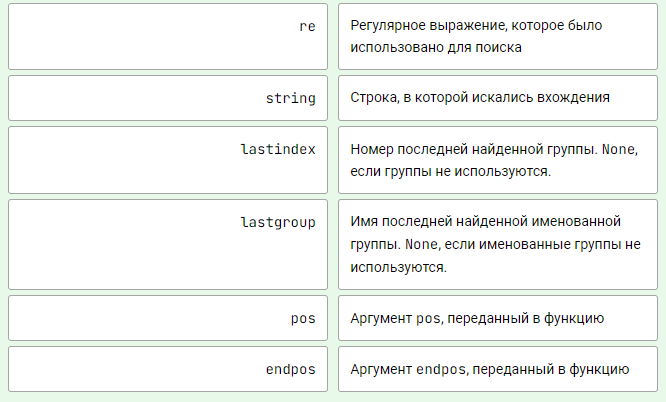

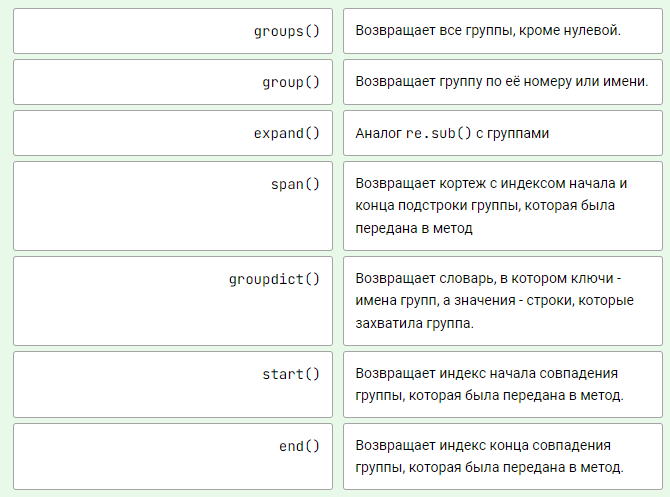

Теперь стоит пройти все методы и атрибуты более подробно:
* ``expand()``
* ``group()``
* ``groups()``
* ``groupdict()``
* ``start()``
* ``end()``
* ``span()``
* ``lastindex``
* ``lastgroup``
* ``pos``
* ``endpos``
* ``re``
* ``string``

In [2]:
import re

regex = r'П(?P<name>.+?)т' # Захватим весь текст между П и т в группу с именем name
text = 'Привет, как тебя зовут?'

match = re.match(regex, text) 
match

<re.Match object; span=(0, 6), match='Привет'>

**``group([group1, ...])``** - Возвращает найденное совпадение по номеру или имени группы.

**(1)** Попробуем получить нулевую группу, т.е. всё, что захватило регулярное выражение:

In [3]:
# Выведет строку "Привет":

print(match.group())  # Если в метод не передать аргумент, то он по умолчанию выведет нулевую группу
print(match.group(0)) # Можно передать номер нужной группы в метод
print(match[0])       # Благодаря геттеру в Match-объекте к группам можно обращаться с помощью квадратных скобок

Привет
Привет
Привет


**(2)** Теперь переходим в первой группе

In [4]:
# Выведет строку "риве":

print(match.group(1)) # Получаем то, что захватила первая группа
print(match[1])       # Получаем то, что захватила первая группа через квадратные скобки

риве
риве


**(3)**  Если обратиться к несуществующей группе, то получим ошибку ``IndexError: no such group:``

In [5]:
# Ошибка: IndexError: no such group

print(match.group(2))
print(match[2])

IndexError: no such group

**(4)** Если у группы есть имя, то по нему можно получить нужную группу:

In [6]:
# Выведет строку "риве":

print(match.group("name")) # Получаем то, что захватила группа с именем name
print(match["name"])       # Получаем то, что захватила группа с именем name через квадратные скобки

риве
риве


**(5)** Через метод можно получить сразу несколько групп. Для этого нужно указать нужные группы через запятую:

In [7]:
# Выведет кортеж ('Привет', 'риве', 'риве'):

print(match.group(0, "name", 1))

('Привет', 'риве', 'риве')


**``start(__group=0)``**, **``end(__group=0)``** - Методы start и end возвращают индексы начала и конца совпадения с регулярным выражением группы, номер или имя которой были переданы в метод

In [8]:
print(match.start(0)) # 0
print(match.end(0))   # 6
print(match.start(1)) # 1
print(match.end(1))   # 5

0
6
1
5


In [9]:
print(match.span(0)) # (0, 6)
print(match.span(1)) # (1, 5)

(0, 6)
(1, 5)


**``groups(default=None)``** - Метод groups возвращает кортеж со всеми группами, кроме нулевой:

In [10]:
print(match.groups()) # ('риве',)

('риве',)


Если какая-либо группа ничего не нашла, то вместо найденного совпадения будет значение аргумента ``default``, по умолчанию это ``None``:

In [11]:
import re


regex = r'П(?P<name>.+?)т,(2 группа)?'
text = 'Привет, как тебя зовут?'
match = re.match(regex, text) 

print(match.groups())                    # ('риве', None)
print(match.groups("Ничего не найдено")) # ('риве', 'Ничего не найдено')

('риве', None)
('риве', 'Ничего не найдено')


**``groupdict(default=None)``** -  возвращает словарь, ключи которого - имена групп, а значения - найденные совпадения этих групп:

In [12]:
print(match.groupdict()) # {'name': 'риве'}

{'name': 'риве'}


**``expand(template)``** - Метод работает почти точь-в-точь как функция re.sub() с группами. Поэтому он будет пройден вместе с re.sub().

**``string``** - Если обратиться к атрибуту, то можно получить строку, в которой искались совпадения:

In [13]:
print(match.string) # Привет, как тебя зовут?

Привет, как тебя зовут?


**``lastindex``** - Возвращает номер последней найденной группы. None, если группы не используются.

In [15]:
print(match.lastindex) # 1

1


**``lastgroup``** - Возвращает имя последней найденной именованной группы. None, если именованные группы не используются.

In [ ]:
print(match.lastgroup) # name

In [16]:
import re


regex = r'П(?P<name>.+?)в(?P<name2>2 группа)?(?P<name3>ет)?,'
text = 'Привет, как тебя зовут?'
match = re.match(regex, text) 

In [17]:
match.groups(0)

('ри', 0, 'ет')

In [18]:
match.groupdict(0)

{'name': 'ри', 'name2': 0, 'name3': 'ет'}

In [19]:
match.lastindex

3

In [20]:
match[0]

'Привет,'

In [21]:
match.lastgroup

'name3'

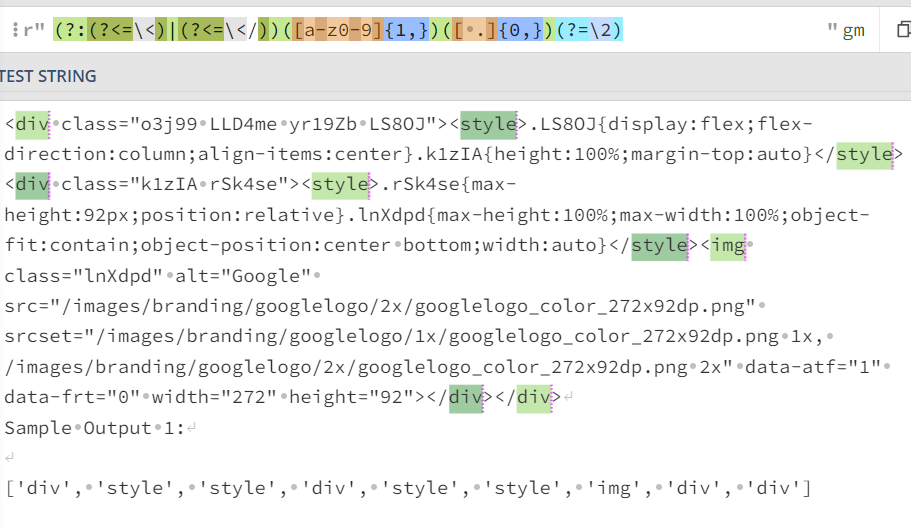

**Разделяем найденные ссылки**

In [ ]:
# Код писать сюда \(❤‿❤)/
# Код писать сюда \(❤‿❤)/
# Код писать сюда \(❤‿❤)/
import re
pattern = r"(?<!\S)(http[s]?)\://((?:www\.){0,1}[a-z]{1,}(?:\.[a-z]{1,}){0,})((?:/[a-z0-9\-_]{0,}){0,})(\?[a-z\=&0-9]{0,}){0,}(\#[a-z]{0,}){0,}(?!\S)"
string =input()

result = re.finditer(pattern, string,flags=0)

for i in result:
    print(f"""Полная ссылка: {i.group(0)}
Протокол: {i.group(1)} | Домен: {i.group(2)} | Параметры: {i.group(4)} | Якорь: {i.group(5)}
""")


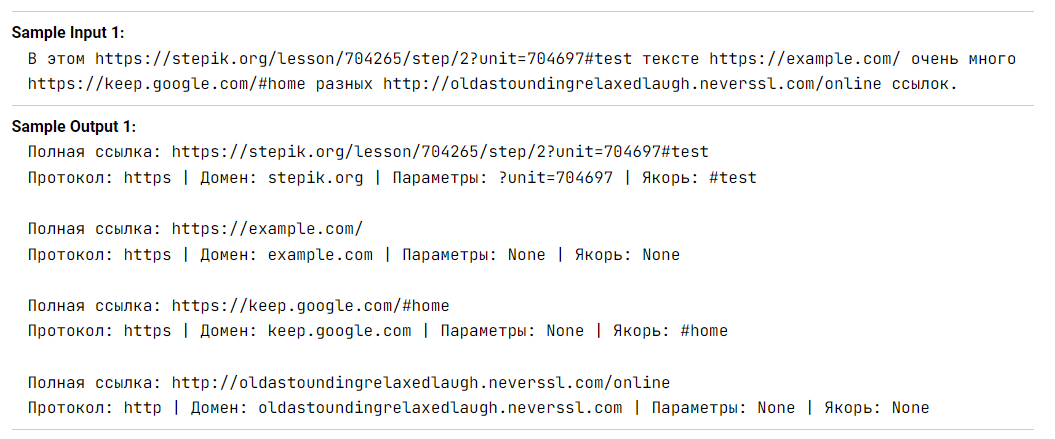

**Группы и ``re.split()``**

Если в шаблоне регулярного выражения используются групппы, то их значения будут вставлены между разделёнными строками:

In [ ]:
import re

res1 = re.split(r'\s[+*=]\s', '2 + 2 * 2 = 6')
# ['2', '2', '2', '6']
# Если в шаблоне нет групп, re.split работает так же, как и str.split

res2 = re.split(r'(\s)([+*=])(\s)', '2 + 2 * 2 = 6')
# ['2', ' ', '+', ' ', '2', ' ', '*', ' ', '2', ' ', '=', ' ', '6']
# Если использовать группы, то между каждыми разделёнными строками будут значения из групп

res3 = re.split(r'\s([+*=])\s', '2 + 2 * 2 = 6')
# ['2', '+', '2', '*', '2', '=', '6']
# Сначала не очень понятно, зачем использовать группы с re.split. 
# Но если убрать ненужные группы из второго примера, то всё становится ясно

Если выделить в группу, то символы-разделители будут в конечном результате. 

**Группы в ``re.sub()`` и ``re.subn()``**

Группы в ``re.sub()`` и ``re.subn()`` ничего не дают, но их можно использовать в заменах!

Если в строке, на которую будет происходить замена найденных совпадений написать \n или \g<name>, где n это номер группы, а name это имя группы, то они будут заменены на совпадения этих групп:


In [ ]:
import re

string = "Ненавижу людей, которые пишут дату в формате mm/dd/yyyy. Ну кто пишет 02/22/2022 или 07/13/2022?"
print(re.sub(r'(\d{2}).(\d{2}).(\d{4})', r'\2.\1.\3', string))
# Ненавижу людей, которые пишут дату в формате mm/dd/yyyy. Ну кто пишет 22.02.2022 или 13.07.2022?

In [ ]:
# Код писать сюда \(❤‿❤)/
# Код писать сюда \(❤‿❤)/
import re

pattern1=r'\*{2}(.{1,})\*{2}'
pattern2=r'\*{1}(.{1,})\*{1}'
string = input()
print(re.sub(pattern2, r'<em>\1</em>',re.sub(pattern1, r'<strong>\1</strong>', string)))


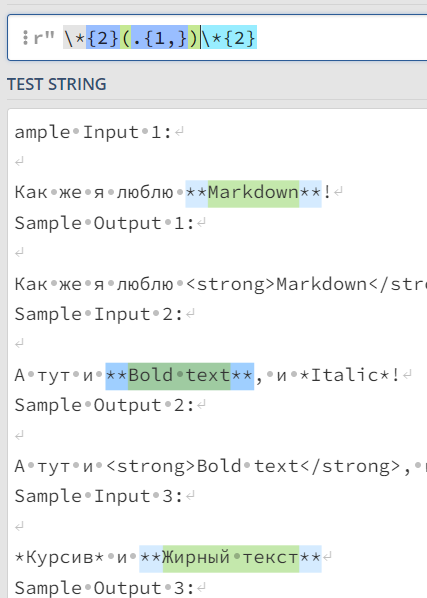

**Замените егонный/еённый/ихний на его/её/их**

In [ ]:
import re

patterns=[r'([Ее])гонный',r'([Ее])ённый',r'([иИ])хни[йе]']
repls=[r'\1го',r'\1ё',r'\1х']
string = input()


for i in range(len(repls)):
    string=re.sub(patterns[i] ,repls[i], string)
print(string)

**``match.expand()``**

Метод работает почти как функция re.sub() с группами:

In [1]:
import re


match = re.search(r"(\d{4})", "Бойцовский клуб (1999)")

print(match.expand(r"Год выпуска фильма: \1"))    # Год выпуска фильма: 1999

Год выпуска фильма: 1999


Зачем нужен ``match.expand()``?
``match.expand()`` генерирует строку, путём вставки в неё значений из найденных групп.

``re.sub()`` ищет совпадения в тексте, если совпадения найдены, то генерирует строку, путём вставки в неё значений из найденных групп, и заменяет совпадения на сгенерированные строки.

С помощью match.expand() удобно генерировать строки с найденными данными.

**Функции в ``re.sub()`` и ``re.subn()``**

Вместо строки, на которую нужно заменить вхождение, в ``re.sub()`` и ``re.subn()`` можно передать функцию, которая будет генерировать ту самую строку.

В функцию передаётся ``Match`` объект, и теперь мы можем получать доступ к группам, а также как-либо изменять и обрабатывать эти данные.

Например, нам нужно найти все слова и заменить их на их же длину. Давайте сделаем это с помощью функций!

In [ ]:
import re


def func(m):
    return str(len(m[0]))

regex = r'[a-zA-Z]{1,}'
text = 'Lorem Ipsum is simply dummy text of the printing and typesetting industry.'

res_func = re.sub(regex, func, text)
res_lambda = re.sub(regex, lambda m: str(len(m[0])), text)

print(res_func)  # 5 5 2 6 5 4 2 3 8 3 11 8.
print(res_func == res_lambda)  # True

В примере сверху в функциях я:

* Получаю ``Match`` объект в функции.
* Из него беру нулевую группу - т.е. всё, что захватило регулярное выражение.
* Получаю её длину, конвертирую в строку, и возвращаю значение.
* Можно использовать как и лямбда-функции, так и обычные.

**Замена чисел квадратами**

In [2]:
# Код писать сюда \(❤‿❤)/
import re
pattern=r'([0-9]{1,})'

string = 'Интересно, какое число получится, если 2022 возвести в квадрат?'

result = re.sub(pattern, lambda m: str(int(m[0])**2), string)
print(string)
print(result)

Интересно, какое число получится, если 2022 возвести в квадрат?
Интересно, какое число получится, если 4088484 возвести в квадрат?


In [40]:
'Abcvf1'.isalpha()

False

**Данные удалены**

In [4]:
# Код писать сюда \(❤‿❤)/
import re
pattern=r'\b[Аа][а-я]{0,}'

string = 'Абажур Аббревиатура Абзац абитуриент абонемент абонент'

result = re.sub(pattern, lambda m: f'удалено({len(m[0])})', string)
print(string)
print(result)

Абажур Аббревиатура Абзац абитуриент абонемент абонент
удалено(6) удалено(12) удалено(5) удалено(10) удалено(9) удалено(7)


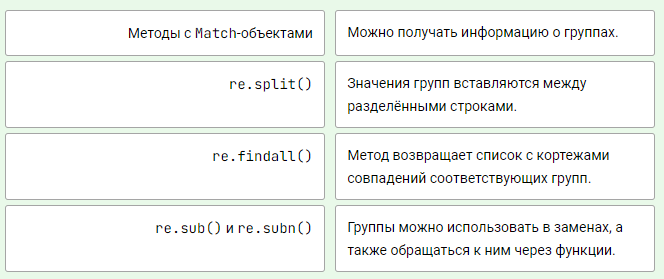

## Компиляции регулярных выражений

``re.compile(pattern, flags=0)`` - метод, который позволяет вручную компилировать регулярные выражения.

**Параметры:**

* ``pattern`` - регулярное выражение
* ``flags`` - флаги, пройдём позже

*Возвращаемое значение:*

Объект ``Pattern`` - скомпилированное регулярное выражение

Каждый раз, когда вы используете регулярное выражение в каком-либо методе, оно автоматически компилируется. С помощью метода ``re.compile()`` можно вручную скомпилировать регулярное выражение, и уже использовать его по назначению.

С помощью re.compile() можно:

* уменьшить количество кода, если одно регулярное выражение используется несколько раз
* увеличить производительность кода, если одно регулярное выражение используется несколько раз

In [ ]:
import re

regex = re.compile(r'[a-zA-Z]{1,}')
# Регулярное выражение скомпилировано

print(regex)  # re.compile('[a-zA-Z]{1,}')

# Теперь можно использовать методы:

print(regex.findall('Some words.'))  # ['Some', 'words']
print(regex.sub('deleted', 'Some words again.'))  # deleted deleted deleted.

**Объект ``Pattern``**

После компиляции регулярного выражения, функция ``re.compile()`` возвращает объект ``Pattern``.

Именно через этот объект можно обратиться ко всем функция из модуля ``re``, но они будут уже не функциями, а методами этого объекта.

In [5]:
import re

pattern = re.compile(r'(?P<group1>[a-zA-Z]{1,})')

**Атрибуты**

**``pattern.flags``**

Каждый флаг - хранится как какое-либо число. ``pattern.flags`` возвращает сумму этих чисел:

In [6]:
print(pattern.flags) # 32

32


**``pattern.groups``**

Возвращает количество групп в регулярном выражении:

In [7]:
print(pattern.groups) # 1

1


**``pattern.groupindex``**

Возвращает словарь, в котором ключи - именованные группы, а значения - номера этих групп:

In [8]:
print(pattern.groupindex) # {'group1': 1}

{'group1': 1}


**``pattern.pattern``**

Возвращает регулярное выражение:

In [9]:
print(pattern.pattern) # (?P<group1>[a-zA-Z]{1,})

(?P<group1>[a-zA-Z]{1,})


**Методы**

Благодаря объекту ``Pattern`` в методах ``search()``, ``match()``, ``fullmatch()``, ``finditer()``, ``findall()`` появляются дополнительные параметры:

* pos - позволяет указывать индекс в строке, с которого надо начать искать совпадение

* endpos - указывает, до какого индекса надо выполнять поиск

In [21]:
import re

pattern = re.compile(r'(?P<group1>[a-zA-Z]{1,})')

match1 = pattern.match("Some words.", 4) # None
match2 = pattern.match("Some words.", 5) # words
match2.group(0)

'words'

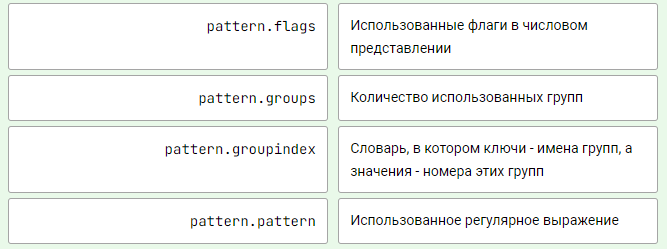

In [22]:
# Код писать сюда \(❤‿❤)/
string='soda senior tuition library task tone few torch vacuum'
spoint=2
epoint=29

import re

pattern = re.compile(r'(?<!\S)([a-zA-Z]{0,})(?!\S)')



match1 = pattern.search(string, spoint, epoint) # None
match1

<re.Match object; span=(5, 11), match='senior'>

In [13]:
pattern.match(string)

<re.Match object; span=(0, 4), match='soda'>

## Флаги

Чтобы использовать флаги, достаточно их передать как именованный аргумент в нужный метод:

In [ ]:
import re

test1 = re.findall('123', '123', flags=re.MULTILINE)  # 1 флаг
test2 = re.findall('123', '123', flags=re.MULTILINE + re.IGNORECASE)  # 2 флага
test3 = re.findall('123', '123', flags=re.MULTILINE + re.IGNORECASE + re.DOTALL)  # 3 флага

Если нужно использовать несколько флагов сразу - нужно сложить их вместе. Да, именно сложить.

Ну или написать между ними символ ``|``:

In [23]:
import re

test1 = re.findall('123', '123', flags=re.MULTILINE)  # 1 флаг
test2 = re.findall('123', '123', flags=re.MULTILINE | re.IGNORECASE)  # 2 флага
test3 = re.findall('123', '123', flags=re.MULTILINE | re.IGNORECASE | re.DOTALL)  # 3 флага

У флагов сущестуют сокращённые версии. Они позволяют сократить код в размере.

In [24]:
import re

test1 = re.findall('123', '123', flags=re.MULTILINE)  # 1 флаг
test2 = re.findall('123', '123', flags=re.MULTILINE + re.IGNORECASE)  # 2 флага
test3 = re.findall('123', '123', flags=re.MULTILINE + re.IGNORECASE + re.DOTALL)  # 3 флага

Если заменить флаги из примера с прошлого шага их сокращёнными версиями, то получим:

In [25]:
import re

test1 = re.findall('123', '123', flags=re.M)  # 1 флаг
test2 = re.findall('123', '123', flags=re.M + re.I)  # 2 флага
test3 = re.findall('123', '123', flags=re.M + re.I + re.S)  # 3 флага

**Встроенные флаги**

Также флаги можно указать в самом регулярном выражении. Достаточно просто поставить встроенный флаг перед регулярным выражением ``r"(?i)I like flags"``:

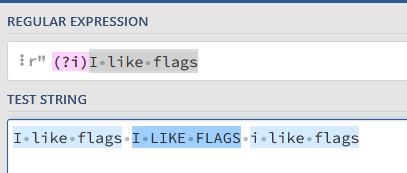

Встроенные флаги нужно ставить в начало выражения.

Если нужно использовать сразу несколько флагов - достаточно их перечислить: ``r"(?ims)I like flags"``.

**Локальные и глобальные флаги**

Все флаги которые только что были пройдены - глобальные, т.е. они действуют на всё регулярное выражение целиком.

Но что если нам нужно отключить флаг в какой-либо части выражения, или вообще использовать его только там?

На помощь приходят локальные флаги! Пока они есть только в встроенном виде: ``(?aiLmsux-imsx:regex)``

Все флаги до ``-`` используются вместе с ``regex``, а флаги, стоящие после ``-`` перестают работать с ``regex``.

Например, в следующем регулярном выражении:

In [26]:
regex = r"(?i)(?ms-i:local) global"

Используется глобальный флаг ``i``, но он будет работать только при поиске текста ``global``

А при поиске текста ``local``, флаг ``i`` отключается, и вместо него используются флаги ``m`` и ``s``.

**Объект RegexFlag**

Ещё совсем недавно мы получали из объекта ``Pattern`` флаги в числовом виде. Чтобы конвертировать их в привычный нам вид, достаточно провести следующие манипуляции:

In [27]:
import re

pattern = re.compile(r'[a-zA-Z]{1,}')
print(pattern.flags) # 32
print(re.RegexFlag(32)) # re.UNICODE

32
re.UNICODE


**``re.IGNORECASE``** (``re.I``); (``(?i)``); (``2``)

При использовании флага регулярные выражения будут игнорировать регистр.

In [28]:
import re

string = 'I like flags I LIKE FLAGS i like flags'

test1 = re.findall(r'I like flags', string, flags=re.IGNORECASE)
test2 = re.findall(r'I like flags', string, flags=re.I)
test3 = re.findall(r'(?i)I like flags', string)

print(test1)  # ['I like flags', 'I LIKE FLAGS', 'i like flags']
print(test1 == test2 and test2 == test3)  # True

['I like flags', 'I LIKE FLAGS', 'i like flags']
True


True

In [29]:
# Код писать сюда \(❤‿❤)/
import re

string='ПРИВЕТспампрИвЕТspamпРИвет123ПРИвЕт456ПРиВет789ПРиВет10пРиВЕТПокаПРиВеТHiпРИВетHelloПРиветTest'

print(re.findall(r'(?i)ПРИВЕТ', string))


['ПРИВЕТ', 'прИвЕТ', 'пРИвет', 'ПРИвЕт', 'ПРиВет', 'ПРиВет', 'пРиВЕТ', 'ПРиВеТ', 'пРИВет', 'ПРивет']


**``re.MULTILINE``** (``re.M``); (``(?m)``); (``8``)

При использовании флага спецсимволы ^ и $ будут совпадать не с началом и концом всего текста, а с началом и концом строк.

In [30]:
import re

string = '''
I like flags
I like flags
I like flags
'''

test1 = re.findall(r'^I like flags$', string, flags=re.MULTILINE)
test2 = re.findall(r'^I like flags$', string, flags=re.M)
test3 = re.findall(r'(?m)^I like flags$', string)

print(test1)  # ['I like flags', 'I like flags', 'I like flags']
print(test1 == test2 and test2 == test3)  # True

['I like flags', 'I like flags', 'I like flags']
True


**``re.ASCII``** (``re.A``); (``(?a)``); (``256``)

Шаблоны ``\w``, ``\W``, ``\b``, ``\B``, ``\d``, ``\D``, ``\s`` и ``\S`` будут выполнять только ASCII соответствие, вместо соответствия по умолчанию - соответствия по UNICODE .

В некоторых шаблонах, описанных выше, теперь будут искаться только латинские буквы или только арабские цифры. Можно использовать, чтобы отсечь ненужные языки и не писать длинные выражения в квадратных в скобках. Возможно поиск будет происходить чуть быстрее, т.к. будет обрезано большое количество символов.

**``re.UNICODE``** (``re.U``); (``(?u)``); (``32``)

Шаблоны ``\w``, ``\W``, ``\b``, ``\B``, ``\d``, ``\D``, ``\s`` и ``\S`` будут выполнять соответствие по UNICODE. Существует для обратной совместимости с ``re.ASCII``, но он является излишеством, так как по умолчанию Python выполняет сопоставления в UNICODE.

Python по умолчанию выполняет сопоставления в UNICODE ¯\_(ツ)_/¯

**``re.LOCALE``** (``re.L``); (``(?L)``); (``4``)

Сопоставляет ``\w``, ``\W``, ``\b``, ``\B`` без учета регистра, зависимо от текущей локали. Использование этого флага не рекомендуется, так как механизм локализации очень ненадежен и он работает только с 8-битными локалями.

**``re.DOTALL``** (``re.S``); (``(?s)``); (``16``)

Точка ``.`` теперь будет соответствовать любому символу. Если флаг не используется - точка соответствует любому символу, кроме символа новой строки.

In [31]:
import re

string = '''
I like flags
I like flags
I like flags
'''

test1 = re.findall(r'I like flags.', string, flags=re.DOTALL)
test2 = re.findall(r'I like flags.', string, flags=re.S)
test3 = re.findall(r'(?s)I like flags.', string)

print(test1)  # ['I like flags\n', 'I like flags\n', 'I like flags\n']
print(test1 == test2 and test2 == test3)  # True

['I like flags\n', 'I like flags\n', 'I like flags\n']
True


**``re.VERBOSE``** (``re.X``); (``(?x)``); (``64``)

Позволяет писать более читабельные регулярные выражения, отделять части регулярного выражения пробелами и переносами строк, а также писать комментарии после символа ``#``.

In [32]:
import re

test1 = re.findall(r"""[1-9] +  # Любая цифра, кроме 0
                   .            # Любой символ, кроме новой строки
                   \d {2,}      # Любая цифра""", '4G22', flags=re.VERBOSE)

test2 = re.findall(r"""[1-9] +
                   .
                   \d {2,}""", '4G22', flags=re.VERBOSE)

In [35]:
import re

test1 = re.findall(r"""[1-9] +
                   .
                   \d {2,}""", '4G22', flags=re.VERBOSE)

test2 = re.findall(r"""[1-9] +
                   .
                   \d {2,}""", '4G22', flags=re.X)

test3 = re.findall(r"""(?x)
                   [1-9] +
                   .
                   \d {2,}""", '4G22')

print(test3)  # ['4G22']
print(test1 == test2 and test2 == test3)  # True

['4G22']
True


**``re.VERBOSE``** (``None``); (``None``); (``128``)

Показывает отладочную информацию о скомпилированном выражении. Используется только с ``re.compile``.

In [34]:
import re


regex = re.compile(r'I like flags', flags=re.DEBUG)


LITERAL 73
LITERAL 32
LITERAL 108
LITERAL 105
LITERAL 107
LITERAL 101
LITERAL 32
LITERAL 102
LITERAL 108
LITERAL 97
LITERAL 103
LITERAL 115

 0. INFO 30 0b11 12 12 (to 31)
      prefix_skip 12
      prefix [0x49, 0x20, 0x6c, 0x69, 0x6b, 0x65, 0x20, 0x66, 0x6c, 0x61, 0x67, 0x73] ('I like flags')
      overlap [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
31: LITERAL 0x49 ('I')
33. LITERAL 0x20 (' ')
35. LITERAL 0x6c ('l')
37. LITERAL 0x69 ('i')
39. LITERAL 0x6b ('k')
41. LITERAL 0x65 ('e')
43. LITERAL 0x20 (' ')
45. LITERAL 0x66 ('f')
47. LITERAL 0x6c ('l')
49. LITERAL 0x61 ('a')
51. LITERAL 0x67 ('g')
53. LITERAL 0x73 ('s')
55. SUCCESS


**``re.NOFLAG``** (``None``); (``None``); (``0``)

Указывает, что в функции/методе не применяется флаг.

In [36]:
def myfunc(text, flags=re.NOFLAG):
    return re.match(text, flags)

AttributeError: module 're' has no attribute 'NOFLAG'

## Дополнительные задачи

**Перевод в римские цифры**

In [48]:
import re

def SPQR(m):
    num = int(m[0])
    result = ''
    lst = [(1000, 'M'), (900, 'CM'), (500, 'D'), (400, 'CD'), (100, 'C'), (90, 'XC'), (50, 'L'), (40, 'XL'), (10, 'X'), (9, 'IX'), (5, 'V'), (4, 'IV'), (1, 'I')]
    for arabic, roman in lst:
        result += num // arabic * roman
        num %= arabic
    return result

# Код писать сюда \(❤‿❤)/
pattern = r'[1-9]\d*'
string='404 1259 2848 8 86 25 917 0 007'
print(string)
print(re.sub(pattern, SPQR, string))

404 1259 2848 8 86 25 917 0 007
CDIV MCCLIX MMDCCCXLVIII VIII LXXXVI XXV CMXVII 0 00VII


**Из 🐍 в 🐪**

In [49]:
import re

reg= r'([A-Z][a-z]*)'
string='VeryVeryBigVariable123'
a = re.sub(reg, r'\1_', string)
print(string)
print(a.strip('_').lower())

VeryVeryBigVariable123
very_very_big_variable_123


**Из 🐪 в 🐍**

In [50]:
# Код писать сюда \(❤‿❤)/
import re
string='very_very_big_variable_123'
reg= r'([a-z]*)'
a = re.sub(reg, lambda m: m[0].capitalize(), string)
print(string)
print(a.replace('_', ''))

very_very_big_variable_123
VeryVeryBigVariable123


**Дюймы в см, а доллары в рубли**

1 дюйм  = 2,54 см, курс доллара считайте равным 59,5 рублей за один доллар

In [93]:
# Код писать сюда \(❤‿❤)/
import re
string="""1. GROHE Aria 25081000 - Смеситель для ванны (хром) - $558
2. Кран шаровый 1" наружная резьба - нет в продаже
3. SCBRHMI Серийный ЖК-дисплей HMI TFT с сенсорной панелью 10,4 дюйма - $95,25;"""
pattern1=r'(?<!\S)((?:[0-9]{1,}(?:\,[0-9]{1,})?)|[0-9]{1,})( дюйма?|\")'
pattern2=r'(?<!\S)\$((?:[0-9]{1,}(?:\,[0-9]{1,})?)|[0-9]{1,})'
def rounder(x):
    if x.is_integer():
        x=int(round(x,0))
    else:
        x=round(x,2)
        x=str(x).replace('.',',')
    return x

result = re.sub(pattern1, lambda m: '{0} см'.format(rounder(float(m[1].replace(',','.'))*2.54)), string)
result = re.sub(pattern2, lambda m: '{0} руб'.format(rounder(float(m[1].replace(',','.'))*59.5)), result)
print(string)
print(result)


1. GROHE Aria 25081000 - Смеситель для ванны (хром) - $558
2. Кран шаровый 1" наружная резьба - нет в продаже
3. SCBRHMI Серийный ЖК-дисплей HMI TFT с сенсорной панелью 10,4 дюйма - $95,25;
1. GROHE Aria 25081000 - Смеситель для ванны (хром) - 33201 руб
2. Кран шаровый 2,54 см наружная резьба - нет в продаже
3. SCBRHMI Серийный ЖК-дисплей HMI TFT с сенсорной панелью 26,42 см - 5667,38 руб;


**Замените в строке последние 5 символов на первые 5.**

In [95]:
# Код писать сюда \(❤‿❤)/
from re import sub, match
fraza = '123456bcde12345 AAAAA'
print(sub(r'.{1,5}$', match(r'^.{1,5}', fraza).group() , fraza))

123456bcde12345 12345


**Чередование гласных и согласныз**

* согласные: ``BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz``
* гласные: ``AEIOUYaeiouy``

In [147]:
string="""cite election data chemistry point future tale employment
wave rice expert fun food hi role discount initiative
age art item eye pi
"""
import re
v = r'AEIOUYaeiouy'
c = r'BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz'
pattern = re.compile(r'[bcdfghjklmnpqrstvwxz]{2}|[aeiou]{2}', re.IGNORECASE)

def check_word(word):
    if pattern.search(word):
        return False
    return True

print(*filter(check_word, string.split()))

cite data future tale wave rice fun hi role age item eye pi


**Валидный IPv4**

In [157]:

string='00.34.90.7'
pattern=r'\.'
print(all(list(map(lambda x: x.isnumeric() and 0<=int(x)<=255 and len(str(int(x)))==len(x),re.split(pattern, string)))))

False


In [159]:
import re
string='00.34.90.7'
template = '([1-9]?[0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5])'
regex = rf'{template}\.{template}\.{template}\.{template}'
print(bool(re.fullmatch(regex, string)))


False


**Поиск первого повтора**

In [184]:
import re


def find_repeated(text):
    result = re.compile(r"(\b[A-Za-z]+).* \1\b").search(text)
    return result[1] if result else None

print(find_repeated(input()))

three different words
None


**Поиск последовательности длиной простого числа**

In [187]:
def is_prime(n):
    if n==1:
        return False
    for i in range(2,n):
        if (n%i) == 0:
            return False
    return True

In [241]:
import re
string='x xx xxx xxxx xxxxx xxxxxx xxxxxxx xxxxxxxx xxxxxxxxx xxxxxxxxxx xxxxxxxxxxx xxxxxxxxxxxx xxxxxxxxxxxxx xxxxxxxxxxxxxx'
print(*[x for _, x in re.findall(r'\b(?:x|(xx+)\1+|(x+))\b', string) if x])

xx xxx xxxxx xxxxxxx xxxxxxxxxxx xxxxxxxxxxxxx


In [ ]:
import re

def is_prime(n):
    if n == 1:
        return False
    return all(n % i for i in range(2, int(n**0.5) + 1))

res = re.sub(r'\s?(x+)', lambda x: x[0] if is_prime(len(x[1])) else '', input())
print(res)

**Валидация пароля 2.0**

Длина минимум 6 символов
Содержит букву нижнего регистра
Содержит букву верхнего регистра
Содержит цифру
Может содержать только буквы и цифры (_ не подойдёт)

In [ ]:
import regex

pattern = '''
(?x)^(?=[^\W_]{6,})  # длина пароля более 6 символов
(?=.*?\d)  # определяю наличие цифры
(?=.*?[[:upper:]])  # определяю наличие заглавной буквы
(?=.*?[[:lower:]])  # определяю наличие маленькой буквы
[^\W_]+$  # записываю пароль правильными символами
'''.strip()
pattern = regex.compile(pattern)

print(bool(pattern.fullmatch(input())))

In [11]:
import re
pattern=r'abc'
string='babcd'

match_object=re.match(pattern, string)
print(match_object)

None


In [10]:
import re
pattern=r'abc'
string='babcd'

match_object=re.search(pattern, string)
print(match_object)

<re.Match object; span=(1, 4), match='abc'>


**Метасимволы**
* ``[]`` - или
* ``-`` - диапозон символов
* ``^`` - циркумфлекс, диапозон не подходящих символов
* ``?`` - 0 или 1 вхождение символа в строку
* ``.`` - любой символ
* ``*`` - любое число символа, включая 0
* ``+`` - любое число символа, не включая 0
* ``{3}`` - число вхождений символа, которое нас интересует
* ``{2,4}`` - от 2-х до 4-х вхождений
* ``{2,}`` - больше или равно 2
* ``\`` - 
* ``|`` - или (обладает наименьшим приоритетом).  
* ``()`` - группа строк

**Сокращенные записи**
* ``\d`` - ``[0,9]``
* ``\D`` - ``^[0,9]``
* ``\s`` - ``[\t, \n, \r, \f, \v]`` - пробельные символы
* ``\S`` - ``^[\t, \n, \r, \f, \v]``
* ``\w`` - ``[a-zA-Z0-9_]``
* ``\W`` - ``^[a-zA-Z0-9_]``

In [17]:
import re
pattern=r'a[abc]c'
string='accв'

match_object=re.match(pattern, string)
print(match_object)

<re.Match object; span=(0, 3), match='acc'>


In [24]:
import re
string="abc, acc, aac, ac, arc"
pattern=r'a[abc]c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['abc', 'acc', 'aac']


In [25]:
import re
string="abc, acc, aac"
pattern=r'a[abc]c'
fixed_typos = re.sub(pattern,'abc', string)
print(fixed_typos)

abc, abc, abc


In [27]:
import re 
pattern=r'english\?'
string='Do you speak english?'
re.search(pattern, string)

<re.Match object; span=(13, 21), match='english?'>

In [33]:
import re
string="abc, acc, aac, ac, arc, adc"
pattern=r'a[a-e]c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['abc', 'acc', 'aac', 'adc']


In [35]:
import re
string="abc, acc, aac, ac, arc, adc, aBc"
pattern=r'a[a-zA-Z]c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['abc', 'acc', 'aac', 'arc', 'adc', 'aBc']


In [37]:
import re
string="abc, acc, aac, ac, arc, adc, aBc, a8c, a&c"
pattern=r'a[^a-zA-Z]c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['a8c', 'a&c']


In [48]:
import re
string="abc, acc, aac, ac, arc, adc, aBc, a8c, a&c"
pattern=r'a.c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['abc', 'acc', 'aac', 'arc', 'adc', 'aBc', 'a8c', 'a&c']


In [49]:
import re
string="abc, acc, aac, ac, arc, adc, aBc, a8c, a&c"
pattern=r'a*c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['c', 'ac', 'c', 'aac', 'ac', 'c', 'c', 'c', 'c', 'c']


In [50]:
import re
string="abc, acc, aac, ac, arc, adc, aBc, a8c, a&c"
pattern=r'a+c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['ac', 'aac', 'ac']


In [51]:
import re
string="abc, acc, aac, ac, arc, adc, aBc, a8c, a&c"
pattern=r'ac{2}'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['acc']


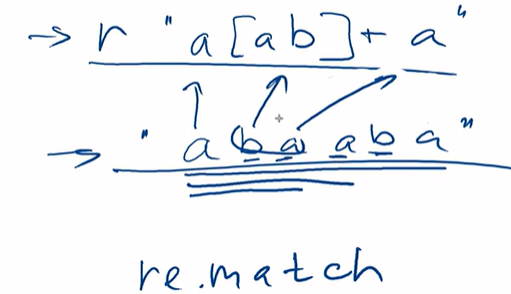

Регулярные выражения "жадные". Они берут самый длинный вариант строки.

In [54]:
import re
string="abc, acc, aac, ac, arc, adc, aBc, a8c, a&c, abbaba"
pattern=r'a[ab]+?a'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['abba']


In [58]:
import re
string="test"
pattern=r"{test}*"
match = re.match(pattern, string)
print(match)

None


In [63]:
import re
string="testtext"
pattern=r"(test|text)*"
match = re.match(pattern, string)
print(match)

<re.Match object; span=(0, 8), match='testtext'>


In [67]:
import re
string="testtextabc"
pattern=r"((abc)|(test|text)*)"
match = re.match(pattern, string)
print(match)
print(match.groups())

<re.Match object; span=(0, 8), match='testtext'>
('testtext', None, 'text')


In [68]:
import re
string="abc"
pattern=r"((abc)|(test|text)*)"
match = re.match(pattern, string)
print(match)
print(match.groups())

<re.Match object; span=(0, 3), match='abc'>
('abc', 'abc', None)


In [76]:
import re
string="Hello abc"
pattern=r"Hello (abc|test)"
match = re.match(pattern, string)
print(match)
print(match.group())
print(match.group(0))
print(match.group(1))

<re.Match object; span=(0, 9), match='Hello abc'>
Hello abc
Hello abc
abc


In [78]:
import re
string="test-text"
pattern=r"(\w+)-\1"
match = re.match(pattern, string)
print(match)
print(match.group())
print(match.group(0))
print(match.group(1))

None


AttributeError: 'NoneType' object has no attribute 'group'

In [81]:
# put your python code here
import sys
import re

for line in sys.stdin:
    line = line.rstrip()

In [113]:
# put your python code here
import sys
import re
for line in sys.stdin:
    line = line.rstrip()
    if re.match(r'((?<!\S)cat(?!\S))|([^a-z\n ]cat[^a-z\n ])', line)!=None:
        print(line)
        

In [125]:
import sys
import re

for line in sys.stdin:
    line = line.rstrip()
    line=line.split(' ')
    l2=[]
    for i in line:
        z=list(i)
        x2=re.match(r'(?<=\b\w)\w',i)
        if x2==None:
            l2.append(i)
            continue
        x1=re.match(r'\b\w',i).pos
        x2=re.match(r'(?<=\b\w)\w',i).pos
        z[x1],z[x2]=z[x2],z[x1]
        l2.append(''.join(z))
    print(' '.join(l2))

In [45]:
def zero_counter(x):
    cnt=0
    for i in x:
        if i=='0':
            cnt=cnt+1
        else:
            break
    return cnt
zero_counter('00jkkjkhjk0')

2

# Исключения

**Источники:**
1. [Мэттью Уилкс. Проффесиональная разработка на Python. гл. 11. Отказоустойчивость](file:///C:/Users/79618/Desktop/Python/%D0%9E%D0%B1%D1%89%D0%B8%D0%B9%20Python/%D0%9C%D1%8D%D1%82%D1%82%D1%8C%D1%8E%20%D0%A3%D0%B8%D0%BB%D0%BA%D1%81%20-%20%D0%9F%D1%80%D0%BE%D1%84%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0%20%D0%BD%D0%B0%20Python%20%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%8D%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D1%85%20%D1%81%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B2%20%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0%20%D0%B2%20%D1%80%D0%B5%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%D1%85%20(2021,%20%D0%94%D0%9C%D0%9A)%20-%20libgen.li.pdf)
2. []()

**Исключения** - это события, способные изменить поток управления в программе. Они возникают автоматически при ошибках и могут генерироваться и перехватываться кодом. 

* ``try/except`` - перехватывает и производит восстановление после исключений, инициируемых Python или вами
* ``try/finally`` - Выполняет действия по очистке независимо от того, происходили исключения или нет
* ``raise`` - генерирует исключение вручную в коде
* ``assert`` - генерирует исключение условно в коде
* ``with/as``

* Трассировка стека - это список всех строк и функций, которые были активными на момент возникновения сиключения. 

**Ошибки Python**

Синтаксические ошибки - ошибка, которая не допускает интерпретации

In [258]:
class EvenLengthMixin:
    def even_length(self):
        return len(self)%2==0
    

In [261]:
class MyList(list, EvenLengthMixin):
    pass

In [263]:
ml=MyList([1,'Э',4,17])
ml.sort()
print(ml)

TypeError: '<' not supported between instances of 'str' and 'int'

In [267]:
try:
    x=[1,2,'hello',7]
    x.sort()
    print(x)
except TypeError:
    print('type error :(')

print('I can catch')

type error :(
I can catch


In [273]:
def f(x, y):
    try:
        return x/y
    except TypeError:
        print('type error :(')
#     except ZeroDivisionError:
#         print('DONT DELETE ON ZERO')

In [278]:
try:
    f(1,0)
except ZeroDivisionError:
    print('DONT DELETE ON ZERO')    

DONT DELETE ON ZERO


In [279]:
def f(x, y):
    try:
        return x/y
    except (TypeError,ZeroDivisionError):
        print('error :(')


In [281]:
def f(x, y):
    try:
        return x/y
    except (TypeError,ZeroDivisionError) as e:
        print('error :(')
        print(type(e))
        print(e)
        print(e.args)

In [284]:
def f(x, y):
    try:
        return x/y
    except:
        print('error :(')

In [282]:
f(1,[])

error :(
<class 'TypeError'>
unsupported operand type(s) for /: 'int' and 'list'
("unsupported operand type(s) for /: 'int' and 'list'",)


In [285]:
f(1,'a')

error :(


In [283]:
f(1,0)

error :(
<class 'ZeroDivisionError'>
division by zero
('division by zero',)


In [ ]:
try:
    15/0
except ZeroDivisionError:#isinstance(e, ZeroDivisionError) == True
    print('DONT DELETE ON ZERO')   

In [287]:
print(ZeroDivisionError.mro())

[<class 'ZeroDivisionError'>, <class 'ArithmeticError'>, <class 'Exception'>, <class 'BaseException'>, <class 'object'>]


In [289]:
def devide(x,y):
    try:
        result=x/y
    except ZeroDivisionError:
        print('DONT DELETE ON ZERO')   
    else:
        print('result is', result)
    finally:
        print('finally')

In [290]:
devide(2,1)

result is 2.0
finally


In [291]:
devide(2,0)

DONT DELETE ON ZERO
finally


In [292]:
devide(2,[])

finally


TypeError: unsupported operand type(s) for /: 'int' and 'list'

In [295]:
# put your python code here
all_classes=[input().split(' : ') for i in range(int(input()))]
all_classes={i[0]: (i[1].split() if len(i)>1 else []) for i in all_classes}
all_qs=[input() for i in range(int(input()))]
def is_ancestor(c1, c2): 
    if c1==c2:
        return True
    if c2 not in all_classes.keys():
        return False
    if c1 in all_classes[c2]:
        return True
    else:
        if all_classes[c2] is []:
            return False
        else: 
            for i in all_classes[c2]:
                if is_ancestor(c1, i) is True:
                    return True
            return False

for i in range(1, len(all_qs)):
    if any(list(map(lambda x: is_ancestor(x, all_qs[i]), all_qs[0:i]))):
           print(all_qs[i])


4
ArithmeticError
ZeroDivisionError : ArithmeticError
OSError
FileNotFoundError : OSError
4
ZeroDivisionError
OSError
ArithmeticError
FileNotFoundError


In [300]:
for i in range(1, len(all_qs)):
    if any(list(map(lambda x: is_ancestor(x, all_qs[i]), all_qs[0:i]))):
           print(all_qs[i])
           
    

FileNotFoundError


In [297]:
is_ancestor('ArithmeticError','ZeroDivisionError')

True

In [304]:
def greet(name):
    if name[0].isupper():
        return 'Hello '+name
    else:
        raise ValueError(name+' is inappropriate name')
print(greet('Anron'))
print(greet('anron'))

Hello Anron


ValueError: anron is inappropriate name

In [305]:
def greet(name):
    if name[0].isupper():
        return 'Hello '+name
    else:
        raise ValueError(name+' is inappropriate name')

while True:
    try:
        name=input('Please input your name')
        greetings=greet(name)
    except ValueError:
        print('Please Try Again')
    else:
        break

Please input your namedfsdf
Please Try Again
Please input your nameAdfs


In [306]:
class BadName(Exception):
    pass
    

def greet(name):
    if name[0].isupper():
        return 'Hello '+name
    else:
        raise BadName(name+' is inappropriate name')

while True:
    try:
        name=input('Please input your name')
        greetings=greet(name)
    except ValueError:
        print('Please Try Again')
    else:
        break

Please input your namedfsdf


BadName: dfsdf is inappropriate name

# Конспект 1 Python

### Переворот числа

Дано пятизначное или шестизначное натуральное число. Напишите программу, которая изменит порядок его последних пяти цифр на обратный.

Формат входных данных
На вход программе подается одно натуральное пятизначное или шестизначное число.

Формат выходных данных
Программа должна вывести число, которое получится в результате разворота, указанного в условии задачи. Число нужно выводить без незначащих нулей.

In [33]:
s = input()
print(int(s[:-5] + s[-5:][::-1]))

12345
54321


### Разделительная запятая

На вход программе подаётся натуральное число. Напишите программу, которая вставляет в заданное число запятые в соответствии со стандартным американским соглашением о запятых в больших числах.

Формат входных данных
На вход программе подаётся натуральное число n, \, (0 < n < 10^{100})n,(0<n<10 
100
 ).

Формат выходных данных
Программа должна вывести число с запятыми в соответствии с условием задачи.

In [73]:
num = input()
for idx in range(len(num) - 3, 0, -3):
    num = num[:idx] + ',' + num[idx:]
print(num)

123456
123,456


In [77]:
list(range(1,5))*3

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

In [78]:
n=30
k=3
l=[i for i in range(1,n+1)]
q=0
while len(l)>1:
    q=q+1
    if q==k:
        

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

### Точки на координатной плоскости

Дан набор точек на координатной плоскости. Необходимо подсчитать и вывести количество точек, лежащих в каждой координатной четверти.

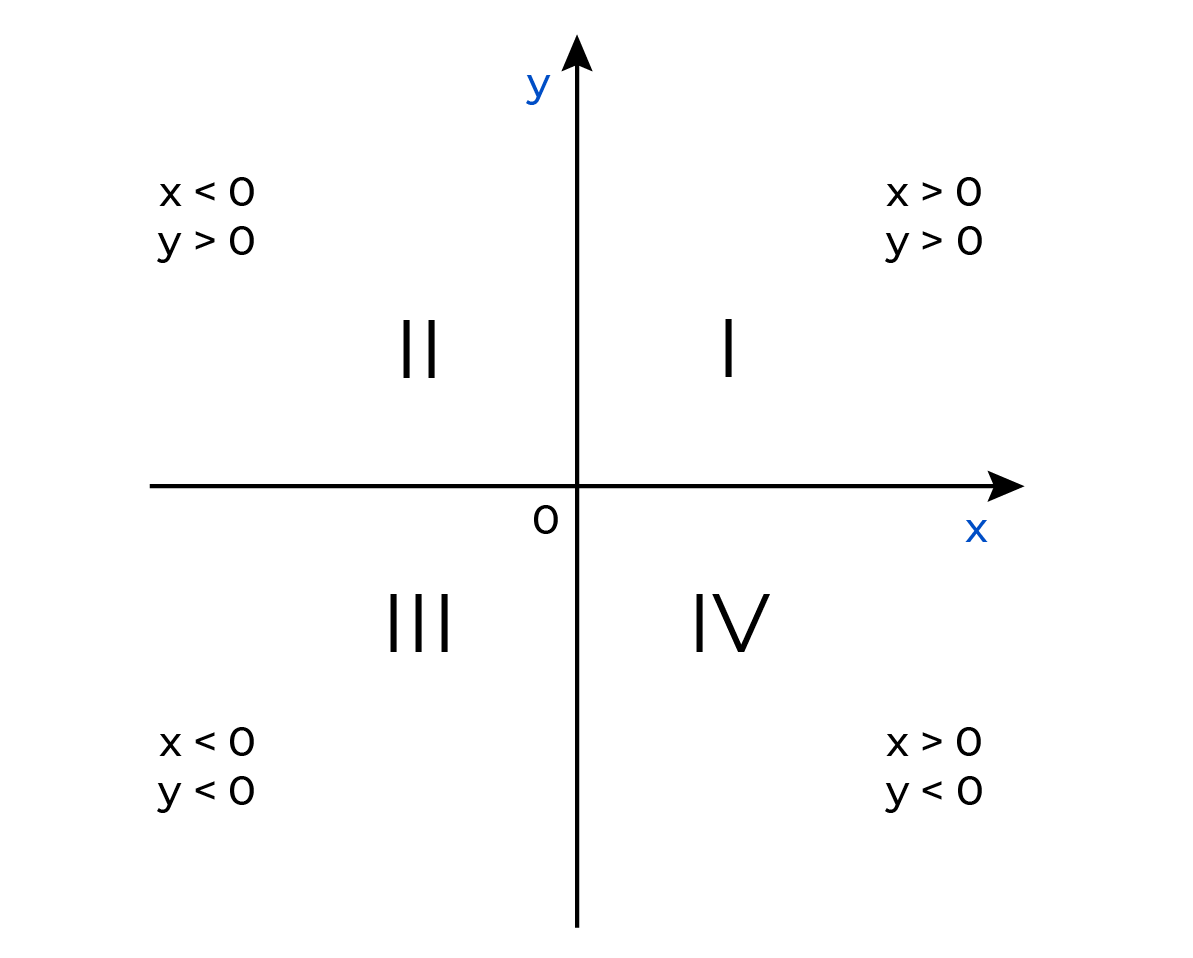

In [4]:
n=int(input())
xlist,ylist=[],[]
for i in range(n):
    x, y = map(int, input().split())
    xlist.append(x)
    ylist.append(y)

dictxy={'Первая четверть:': 0, 'Вторая четверть:': 0, 'Третья четверть:': 0, 'Четвертая четверть:': 0}

for i in range(n):
    if xlist[i]==0 or ylist[i]==0:
        continue
    else:
        if xlist[i]>0 and ylist[i]>0:
            dictxy['Первая четверть:']=dictxy['Первая четверть:']+1
        if xlist[i]<0 and ylist[i]>0:
            dictxy['Вторая четверть:']=dictxy['Вторая четверть:']+1
        if xlist[i]<0 and ylist[i]<0:
            dictxy['Третья четверть:']=dictxy['Третья четверть:']+1
        if xlist[i]>0 and ylist[i]<0:
            dictxy['Четвертая четверть:']=dictxy['Четвертая четверть:']+1
for i in dictxy.keys():
    print(i, dictxy[i])

3
1 2
3 5
-1 2
Первая четверть: 2
Вторая четверть: 1
Третья четверть: 0
Четвертая четверть: 0


#### Топовое решение

In [24]:
a = [tuple(map(int, input().split())) for n in range(int(input()))]
print('Первая четверть: {}'.format(sum([1 for t in a if t[0] > 0 and t[1] > 0])))
print('Вторая четверть: {}'.format(sum([1 for t in a if t[0] < 0 and t[1] > 0])))
print('Третья четверть: {}'.format(sum([1 for t in a if t[0] < 0 and t[1] < 0])))
print('Четвертая четверть: {}'.format(sum([1 for t in a if t[0] > 0 and t[1] < 0])))

3
1 2
-1 2
3 5
Первая четверть: 2
Вторая четверть: 1
Третья четверть: 0
Четвертая четверть: 0


### Больше предыдущего

Больше предыдущего
На вход программе подается строка текста из натуральных чисел. Из неё формируется список чисел. Напишите программу подсчета количества чисел, которые больше предшествующего им в этом списке числа, то есть, стоят вслед за меньшим числом. 

In [22]:
list1=input().split()

xs=list(map(int, list1))
q=0
for i in range(1,len(xs)):
    if xs[i]>xs[i-1]:
        q=q+1
print(q)

5 4 3 2 1
0


### Назад, вперёд и наоборот

На вход программе подается строка текста из натуральных чисел. Из элементов строки формируется список чисел. Напишите программу, которая меняет местами соседние элементы списка (a[0] c a[1], a[2] c a[3] и т.д.). Если в списке нечетное количество элементов, то последний остается на своем месте.

### Тайный друг 🌶️

Напишите программу, которая случайным образом назначает каждому ученику его тайного друга, который будет вместе с ним решать задачи по программированию.

Формат входных данных
На вход программе в первой строке подается число 
n – общее количество учеников. Далее идут 
n строк, содержащих имена и фамилии учеников.

Формат выходных данных
Программа должна вывести имя и фамилию ученика (в соответствии с исходным порядком) и имя и фамилию его тайного друга, разделённые дефисом.

Примечание 1. Обратите внимание, что нельзя быть тайным другом самому себе и нельзя быть тайным другом для нескольких учеников.

Примечание 2. Приведенные ниже тесты это лишь образцы возможного ответа. Возможны и другие способы выбора тайных друзей.

In [9]:
my_list = ['fdsdf', 'fsdfs', 'dsfgfdgf', 4, 5]
my_list.pop(0)+my_list.pop(0)

'fdsdffsdfs'

In [11]:
from random import *
uch=[input(i) for i in range(int(input()))]
uch1=uch[:]
x=[]
for i in range(len(uch)):
    x.append((uch1.pop(0), choice(uch1)))
    uch1=uch
print(*map(lambda y: y[0] + ' - '+ y[1] ,x))

3


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
from random import *
uch=[i in range(int(input()))]
uch1=uch[:]
x=[]
for i in range(len(uch)):
    x.append((uch1.pop(0), choise(uch1)))
    uch1=uch

### Треугольник Паскаля 1 🌶️

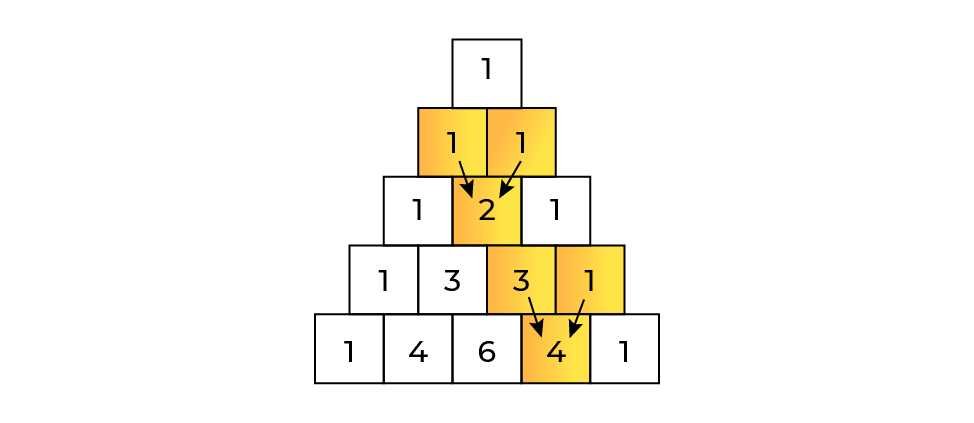

In [86]:
n = int(input())

li = [1]
for i in range(n):
    for j in range(len(li) - 1):
        li[j] = li[j] + li[j + 1]
    li.insert(0, 1)

print(li)

2
[1, 2, 1]


In [103]:
# put your python code here
n=int(input())
def pascal(n):
    z_1=[]
    for i in range(n+1):
        z=[]
        if i==0:
            z=[1]
        elif i==1:
            z=[1,1]
        else:
            z=[z_1[i-1][j]+z_1[i-1][j+1] for j in range(len(z_1[i-1])-1)]
            z.insert(0,1)
            z.insert(len(z),1)
        z_1.append(z)
    return z_1[:-1]
        
            
print(*list(map(lambda x: ' '.join([str(i) for i in x]),pascal(n))), sep='\n')

3
1
1 1
1 2 1


### Упаковка дубликатов 🌶️

In [112]:
l='w w w o r l d g g g g r e a t t e c c h e m g g p w w'.split()
z=[]
for i in range(len(l)):
    if i!=0:
        if l[i] in z[-1]:
            z[-1].insert(-1,l[i])
        else: 
            z.append([l[i]])
    else:
        z.append([l[i]])
    
z

[['w', 'w', 'w'],
 ['o'],
 ['r'],
 ['l'],
 ['d'],
 ['g', 'g', 'g', 'g'],
 ['r'],
 ['e'],
 ['a'],
 ['t', 't'],
 ['e'],
 ['c', 'c'],
 ['h'],
 ['e'],
 ['m'],
 ['g', 'g'],
 ['p'],
 ['w', 'w']]

### Разбиение на чанки 🌶️

In [133]:
l=input().split()
n=int(input())
def chunked(word,leng):
    z=[]
    l1=0
    l2=leng
    while l1<len(l):
        z.append(word[l1:l2])
        l1+=leng
        l2+=leng
    return z
print(chunked(l,n))

a b c d e f r g b
2
[['a', 'b'], ['c', 'd'], ['e', 'f'], ['r', 'g'], ['b']]


### Подсписки списка 🌶️🌶️

In [143]:
def chunked(symbols, n):
    result = []
    for i in range(0, len(symbols), n):
        result.append(symbols[i:i + n])
    return result

print(chunked(symbols, n))
print(chunked('1 2 3 0'.split(),2))

[['wsda']]
[['1', '2'], ['3', '0']]


### Ход конем

In [145]:
# put your python code here
xy = input()
y = '87654321'.index(xy[1])
x = 'abcdefgh'.index(xy[0])

good=[[2,1],[-2,-1],[-2,1],[2,-1],
      [1,2],[-1,-2],[-1,2],[1,-2]]
good=list(map(lambda i:[y+i[0],x+i[1]],good))

z=[['.']*8 for _ in range(8)]
z[y][x]='N'
for k in range(len(z)):
    for n in range(len(z)):
        if [k,n] in good:
            z[k][n]='*'

print(*list(map(lambda i: ' '.join(list(map(str,i))),z)), sep='\n')


b6
* . * . . . . .
. . . * . . . .
. N . . . . . .
. . . * . . . .
* . * . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .


### Ход Ферзем

In [205]:
# put your python code here
# put your python code here
xy = input()
y = '87654321'.index(xy[1])
x = 'abcdefgh'.index(xy[0])

good=[[2,1],[-2,-1],[-2,1],[2,-1],
      [1,2],[-1,-2],[-1,2],[1,-2]]
good=list(map(lambda i:[y+i[0],x+i[1]],good))

z=[['.']*8 for _ in range(8)]
z[y][x]='Q'
for k in range(len(z)):
    for n in range(len(z)):
        if ((y==k or x==n) or (k+n==x+y) or (x-y==n-k)) and [k,n]!=[y,x]:
            z[k][n]='*'

print(*list(map(lambda i: ' '.join(list(map(str,i))),z)), sep='\n')




a1
* . . . . . . *
* . . . . . * .
* . . . . * . .
* . . . * . . .
* . . * . . . .
* . * . . . . .
* * . . . . . .
Q * * * * * * *


In [206]:
range(1,4)[::-1]

range(3, 0, -1)

### Магический квадрат 🌶️

Магическим квадратом порядка 
�
n называется квадратная таблица размера 
�
×
�
n×n, составленная из всех чисел 
1
,
2
,
3
,
…
,
�
2
1,2,3,…,n 
2
  так, что суммы по каждому столбцу, каждой строке и каждой из двух диагоналей равны между собой. Напишите программу, которая проверяет, является ли заданная квадратная матрица магическим квадратом.

In [151]:
# put your python code here
# z=[list(map(int,input().split())) for i in range(int(input()))]
z=[[8,1,6],[3,5,7],[4,9,2]]
ch=[i for i in range(1,(len(z))**2+1)]


if set(sum(z,[]))==set(ch):
    gd=sum([[z[i][j] for j in range(len(z[i])) if j==i] for i in range(len(z))],[])
    pd=sum([[z[i][j] for j in range(len(z[i])) if j==len(z)-1-i] for i in range(len(z))],[])
    if sum(gd)==sum(pd):
        z2=[sum(i) for i in z]
        z1=[[z[j][i] for j in range(len(z))] for i in range(len(z[0]))]
        z1=[sum(i) for i in z1]
        if len(set(z1)|set(z2)|{sum(gd)}|{sum(pd)})==1:
            print('YES')
        else:
            print('NO')
            
        
        
        
    else: 
        print('NO')
    
else:
    print('NO')





YES


# Курс 1 (Биоинформатика)

## Задачи на кортежи

Дополните приведенный код так, чтобы переменная new_tuples, содержала список кортежей на основе списка tuples с последним элементом каждого кортежа, замененным на численное значение 100


In [1]:
tuples = [(10, 20, 40), (40, 50, 60), (70, 80, 90), (10, 90), (1, 2, 3, 4), (5, 6, 10, 2, 1, 77)]
new_tuples = [tuple([i[j] for j in range(len(i)) if j!=len(i)-1]+[100]) for i in tuples]
print(new_tuples)

[(10, 20, 100), (40, 50, 100), (70, 80, 100), (10, 100), (1, 2, 3, 100), (5, 6, 10, 2, 1, 100)]


**Последовательность Трибоначчи**

Напишите программу, которая считывает натуральное число 
n и выводит первые n чисел последовательности Трибоначчи.

Формат входных данных
На вход программе подается одно число 
(≤100)– количество членов последовательности.

Формат выходных данных
Программа должна вывести члены последовательности Трибоначчи, отделенные символом пробела.

Примечание. Последовательность Трибоначчи – последовательность натуральных чисел, где каждое последующее число является суммой трех предыдущих:

In [5]:
n = int(input())
f1, f2, f3 = 1, 1, 1
for i in range(n):
    print(f1)
    f1, f2, f3 = f2, f3, f1 + f2 + f3

10
1
1
1
3
5
9
17
31
57
105


In [9]:
tpl = (100, 200, 300, 400, 500)
print(tpl[-2])
print(tpl[-4:-1])

400
(200, 300, 400)


Уникальные символы 2
Напишите программу для вывода общего количества уникальных символов во всех считанных словах без учета регистра.

Формат входных данных
На вход программе в первой строке подается число 
�
n – общее количество слов. Далее идут 
�
n строк со словами.

Формат выходных данных
Программа должна вывести одно число – общее количество уникальных символов во всех словах без учета регистра.

In [13]:
import re

words = re.sub(r'[.,;:-?-!]', '', input())
print(words)

ewfwef!!!!
ewfwef


In [18]:
import re

words = re.sub(r'[.,;:-?-!]', '', input().lower())
words=words.split()
print(len(set(words)))

Snowflakes, snowflakes falling down. Snowflakes, covering up the ground. Making a blanket, soft and white. Making a blanket in the night.
15


In [17]:
set(words)

{'Making',
 'Snowflakes',
 'a',
 'and',
 'blanket',
 'covering',
 'down',
 'falling',
 'ground',
 'in',
 'night',
 'snowflakes',
 'soft',
 'the',
 'up',
 'white'}

Общие числа
На вход программе подаются две строки текста, содержащие числа. Напишите программу, которая выводит все числа в порядке возрастания, которые есть как в первой строке, так и во второй.

Формат входных данных
На вход программе подаются две строки текста, содержащие числа, отделенные символом пробела.

Формат выходных данных
Программа должна вывести множество чисел, встречающихся в обеих строках.

In [ ]:
set1 = set(int(i) for i in input().split())
set2 = set(int(i) for i in input().split())

print(*sorted(set1 & set2))

In [ ]:
print(*sorted(set(input().split()) & set(input().split()), key=int))

In [19]:
# put your python code here
x=set(input().split())
y=set(input().split())

print(*sorted(list(x-y)))

1 34 56 78 90 123 444 55452 23456
341 434 56 1 34
123 23456 444 55452 78 90


## Заполнение массива спиралью

In [1]:
# put your python code here
n=int(input())
table=[[0 for j in range(n) ] for i in range(n)]

napr=[0,1] #строка/столбец,возрастание/убывание 
k=1
i0,j0=0,0 #курсор алгоритма


z=0
t=0
while k<=n**2:
    if table[i0][j0]==0:
        table[i0][j0]=k
    
    else:
        i0,j0=i0-napr[0],j0-napr[1]
        napr[0],napr[1]=napr[1],napr[0]
        napr[0],napr[1]=napr[0]*(-1)**t,napr[1]*(-1)**t
        t+=1
        k-=1
    
    if [i0,j0] in [[0,n-1],[n-1,n-1],[n-1,0]]: #углы
        napr[0],napr[1]=napr[1],napr[0]
        napr[0],napr[1]=napr[0]*(-1)**t,napr[1]*(-1)**t
        t+=1
    
    i0,j0=i0+napr[0],j0+napr[1] 
    k+=1

for i in table:
    print(*i)

5
1 2 3 4 5
16 17 18 19 6
15 24 25 20 7
14 23 22 21 8
13 12 11 10 9


In [156]:
# put your python code here
# put your python code here
n,m=list(map(int, input().split()))
table=[[0 for j in range(m) ] for i in range(n)]

napr=[0,1] #строка/столбец,возрастание/убывание 
k=1
i0,j0=0,0 #курсор алгоритма


z=0
t=0
while k<=n**2:
    if table[i0][j0]==0:
        table[i0][j0]=k
    
    else:
        i0,j0=i0-napr[0],j0-napr[1]
        napr[0],napr[1]=napr[1],napr[0]
        napr[0],napr[1]=napr[0]*(-1)**t,napr[1]*(-1)**t
        t+=1
        k-=1
    
    if napr[1] in [1,-1]:    
        if [i0,j0] in [[0,m-1],[m-1,m-1],[m-1,0]]: #углы
            napr[0],napr[1]=napr[1],napr[0]
            napr[0],napr[1]=napr[0]*(-1)**t,napr[1]*(-1)**t
            t+=1 
    if napr[0] in [1,-1]:
        if [i0,j0] in [[0,n-1],[n-1,n-1],[n-1,0]]: #углы
            napr[0],napr[1]=napr[1],napr[0]
            napr[0],napr[1]=napr[0]*(-1)**t,napr[1]*(-1)**t
            t+=1
    
    i0,j0=i0+napr[0],j0+napr[1] 
    k+=1

for i in table:
    print(*i)

4 5


IndexError: list index out of range

In [171]:
# put your python code here
# put your python code here
n,m=list(map(int, input().split()))
table=[[0 for j in range(m) ] for i in range(n)]

napr=[0,1] #строка/столбец,возрастание/убывание 
k=1
i0,j0=0,0 #курсор алгоритма

t=0
while k<=n*m:
    if table[i0][j0]==0:
        table[i0][j0]=k
    
    else:
        i0,j0=i0-napr[0],j0-napr[1]
        napr[0],napr[1]=napr[1],napr[0]
        napr[0],napr[1]=napr[0]*(-1)**t,napr[1]*(-1)**t
        t+=1
        k-=1
        
    if ([i0,j0] in [[0,m-1],[n-1,m-1],[n-1,0]]) and n!=1: #углы
        napr[0],napr[1]=napr[1],napr[0]
        napr[0],napr[1]=napr[0]*(-1)**t,napr[1]*(-1)**t
        t+=1 
    
    i0,j0=i0+napr[0],j0+napr[1] 
    k+=1

for i in table:
    print(*i)

1 6
1 2 3 4 5 6


In [186]:
# put your python code here
n,m=list(map(int, input().split()))
ch=[i for i in range(1,n*m+1)]
table=[]
k=0
for i in range(n):
    table.append(ch[k:k+m])
    k=k+m
    

print(*list(map(lambda i: ' '.join(list(map(lambda x: str(x).ljust(3, ' '),i))),table)), sep='\n')

3 4
1   2   3   4  
5   6   7   8  
9   10  11  12 


In [194]:
# put your python code here
# put your python code here
n,m=list(map(int, input().split()))
ch=[i for i in range(1,m+1)]
table=[]
k=0
for i in range(n):
    ch1=ch.copy()
    table.append(ch1)
    x=ch1.pop(0)
    ch1.append(x)
    
    

print(*list(map(lambda i: ' '.join(list(map(lambda x: str(x).ljust(3, ' '),i))),table)), sep='\n')

5 5
2   3   4   5   1  
2   3   4   5   1  
2   3   4   5   1  
2   3   4   5   1  
2   3   4   5   1  


In [197]:
def el_wise_mult(a,b):
    return [a[i]*b[i] for i in range(len(a))]
el_wise_mult([1,2],[10,20])

[10, 40]

In [198]:
def transpose(z):
    return [[z[j][i] for j in range(len(z))] for i in range(len(z[0]))]

In [199]:
transpose([[1,2,3],
[4,5,6]])

[[1, 4], [2, 5], [3, 6]]

## Умножение матриц

In [ ]:
# put your python code here
def el_wise_mult(a,b):
    return [a[i]*b[i] for i in range(len(a))]
def transpose(z):
    return [[z[j][i] for j in range(len(z))] for i in range(len(z[0]))]
# put your python code here
n,m=list(map(int, input().split()))
table1=[list(map(int, input().split())) for _ in range(n)]
input()
n,m=list(map(int, input().split()))
table2=[list(map(int, input().split())) for _ in range(n)]

def matrix_mult(a,b):
    table=[[0 for j in range(len(b[0])) ] for i in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            table[i][j]=sum(el_wise_mult(a[i],transpose(b)[j]))
    return table
table=matrix_mult(table1,table2)


print(*list(map(lambda i: ' '.join(list(map(str,i))),table)), sep='\n')


## Возведение матрицы в степень

In [204]:
# put your python code here
# put your python code here
def el_wise_mult(a,b):
    return [a[i]*b[i] for i in range(len(a))]
def transpose(z):
    return [[z[j][i] for j in range(len(z))] for i in range(len(z[0]))]
# put your python code here
table1=[[1,2,1],[3,3,3],[1,2,1]]
alpha=5


def matrix_mult(a,b):
    table=[[0 for j in range(len(b[0]))] for i in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            table[i][j]=sum(el_wise_mult(a[i],transpose(b)[j]))
    return table

def matrix_pow(a,p):
    x=a
    for i in range(1,p):
        x=matrix_mult(a,x)
    return x
    
table=matrix_pow(table1,alpha)


print(*list(map(lambda i: ' '.join(list(map(str,i))),table)), sep='\n')



1666 2222 1666
3333 4443 3333
1666 2222 1666


## Результаты матчей

Напишите программу, которая принимает на стандартный вход список игр футбольных команд с результатом матча и выводит на стандартный вывод сводную таблицу результатов всех матчей.

За победу команде начисляется 3 очка, за поражение — 0, за ничью — 1.

Формат ввода следующий:
В первой строке указано целое число 
�
n — количество завершенных игр.
После этого идет 
�
n строк, в которых записаны результаты игры в следующем формате:
Первая_команда;Забито_первой_командой;Вторая_команда;Забито_второй_командой

Вывод программы необходимо оформить следующим образом:
Команда:Всего_игр Побед Ничьих Поражений Всего_очков

Конкретный пример ввода-вывода приведён ниже.

Порядок вывода команд произвольный.

**Sample Input:**

3

Спартак;9;Зенит;10

Локомотив;12;Зенит;3

Спартак;8;Локомотив;15


**Sample Output:**

Спартак:2 0 0 2 0

Зенит:2 1 0 1 3

Локомотив:2 2 0 0 6

In [5]:
n=int(input())
matches=[]
for i in range(n):
    matches.append(input().split(';'))

m=[]
for i in matches:
    for j in i:
        if j.isnumeric():
            continue
        else: 
            m=m+[j]

m=list(set(m))

m_table={i:[0,0,0,0,0] for i in m}
# Команда:Всего_игр Побед Ничьих Поражений Всего_очков

#Всего игр
for i in matches:
    for j in i:
        if j in m:
            m_table[j][0]+=1
    
# Побед Ничьих Поражений Всего_очков
# За победу команде начисляется 3 очка, за поражение — 0, за ничью — 1
for k in m:
    for i in matches:
        if k in i:
            if int(i[i.index(k)+1])>int(i[i.index(k)-1]):
                m_table[k][1]+=1
                m_table[k][4]+=3
            elif int(i[i.index(k)+1])==int(i[i.index(k)-1]):
                m_table[k][2]+=1
                m_table[k][4]+=1
            else:
                m_table[k][3]+=1
        else:
            continue
        
            
        

            
for i in m_table.keys():
    print(i+':'+ ' '.join(str(e) for e in m_table[i]))


4




[[''], [''], [''], ['']]


**Хорошее решение**

In [ ]:
a=[input().split(';') for i in range(int(input()))]
b={i:[] for i in set([i[0] for i in a])|set([i[2] for i in a])}
for i in a:
    b[i[0]].append(1 if i[1]==i[3] else 3 if i[1]>i[3] else 0)
    b[i[2]].append(1 if i[1]==i[3] else 3 if i[1]<i[3] else 0)
for i in b: print('%s:%i %i %i %i %i'%(i,len(b[i]),b[i].count(3),b[i].count(1),b[i].count(0),sum(b[i])))

## Подстановочный шифр 

В какой-то момент в Институте биоинформатики биологи перестали понимать, что говорят информатики: они говорили каким-то странным набором звуков.

В какой-то момент один из биологов раскрыл секрет информатиков: они использовали при общении подстановочный шифр, т.е. заменяли каждый символ исходного сообщения на соответствующий ему другой символ. Биологи раздобыли ключ к шифру и теперь нуждаются в помощи:

Напишите программу, которая умеет шифровать и расшифровывать шифр подстановки. Программа принимает на вход две строки одинаковой длины, на первой строке записаны символы исходного алфавита, на второй строке — символы конечного алфавита, после чего идёт строка, которую нужно зашифровать переданным ключом, и ещё одна строка, которую нужно расшифровать.

Пусть, например, на вход программе передано:

abcd

*d%#

abacabadaba

#*%*d*%

Это значит, что символ a исходного сообщения заменяется на символ * в шифре, b заменяется на d, c — на % и d — на #.
Нужно зашифровать строку abacabadaba и расшифровать строку #*%*d*% с помощью этого шифра. Получаем следующие строки, которые и передаём на вывод программы:

*d*%*d*#*d*

dacabac

In [18]:
# put your python code here

orig=input()
shifr=input()

test1=input()
test2=input()

slov1={orig[i]:shifr[i] for i in range(len(orig))}
slov2={shifr[i]:orig[i] for i in range(len(orig))}

res1=''
for i in test1:
    res1+=slov1[i]
print(res1)

res2=''
for i in test2:
    res2+=slov2[i]
print(res2)


abcd
*d%#
abacabadaba
#*%*d*%


KeyError: 0

## Проверка орфографии

Простейшая система проверки орфографии может быть основана на использовании списка известных слов.
Если введённое слово не найдено в этом списке, оно помечается как "ошибка".

Попробуем написать подобную систему.

На вход программе первой строкой передаётся количество 
�
d известных нам слов, после чего на 
�
d строках указываются эти слова. Затем передаётся количество 
�
l строк текста для проверки, после чего 
�
l строк текста.

Выведите уникальные "ошибки" в произвольном порядке. Работу производите без учёта регистра.

In [21]:
# put your python code here
d=int(input())
slov=[input().lower() for _ in range(d)]

l=int(input())
strings=[input().lower().split() for _ in range(l)]

errors=[]
for i in strings: 
    for j in i: 
        if j in slov:
            continue
        else:
            errors.append(j)
errors=list(set(errors))

for i in errors:
    print(i)





3
a
Aa
BCb
2
A a bb aa aba ccc
c bB aBa aba AA
bb
aa
aba
ccc
c


## Черепашка

Группа биологов в институте биоинформатики завела себе черепашку.

После дрессировки черепашка научилась понимать и запоминать указания биологов следующего вида:

север 10

запад 20

юг 30

восток 40

где первое слово — это направление, в котором должна двигаться черепашка, а число после слова — это положительное расстояние в сантиметрах, которое должна пройти черепашка.

Но команды даются быстро, а черепашка ползёт медленно, и программисты догадались, что можно написать программу, которая определит, куда в итоге биологи приведут черепашку. Для этого программисты просят вас написать программу, которая выведет точку, в которой окажется черепашка после всех команд. Для простоты они решили считать, что движение начинается в точке (0, 0), и движение на восток увеличивает первую координату, а на север — вторую.

Программе подаётся на вход число команд 
�
n, которые нужно выполнить черепашке, после чего 
�
n строк с самими командами. Вывести нужно два числа в одну строку: первую и вторую координату конечной точки черепашки. Все координаты целочисленные.

In [ ]:
n=int(input())
vostok,sever=0,0

kkk=[input().split() for i in range(n)]

for i in range(n):
    if kkk[i][0]=='север':
        sever+=int(kkk[i][1])
    if kkk[i][0]=='юг':
        sever-=int(kkk[i][1])
    
    if kkk[i][0]=='восток':
        vostok+=int(kkk[i][1])
    if kkk[i][0]=='запад':
        vostok-=int(kkk[i][1])
print(vostok,sever)

## Средний рост учащегося

Дан файл с таблицей в формате TSV с информацией о росте школьников разных классов.

Напишите программу, которая прочитает этот файл и подсчитает для каждого класса средний рост учащегося.

Файл состоит из набора строк, каждая из которых представляет собой три поля:
Класс Фамилия Рост

Класс обозначается только числом. Буквенные модификаторы не используются. Номер класса может быть от 1 до 11 включительно. В фамилии нет пробелов, а в качестве роста используется натуральное число, но при подсчёте среднего требуется вычислить значение в виде вещественного числа.

Выводить информацию о среднем росте следует в порядке возрастания номера класса (для классов с первого по одиннадцатый). Если про какой-то класс нет информации, необходимо вывести напротив него прочерк.

В качестве ответа прикрепите файл с полученными данными о среднем росте.

In [28]:
xxx=[]
with open(r'C:\Users\79618\Downloads\dataset_3380_5 (1).txt','r') as inf:
    for line in inf:
        line=line.strip().lower()
        line=line.split()
        xxx.append(line)
# Класс Фамилия Рост

classes={i:[] for i in range(1,12)}

for i in xxx:
    classes[int(i[0])].append(int(i[2]))

for i in range(1,12):
    if classes[i]!=[]:
        classes[i]=sum(classes[i])/len(classes[i])
    else:
        classes[i]='-'

for i in range(1,12):
    print(i,classes[i])

1 125.9090909090909
2 129.66666666666666
3 133.2
4 139.5
5 145.33333333333334
6 154.76923076923077
7 159.63636363636363
8 162.625
9 170.77777777777777
10 171.06666666666666
11 176.22222222222223


# Импорт

In [ ]:
if __name__ == "__main__":
    # execute only if run as a script
    main()

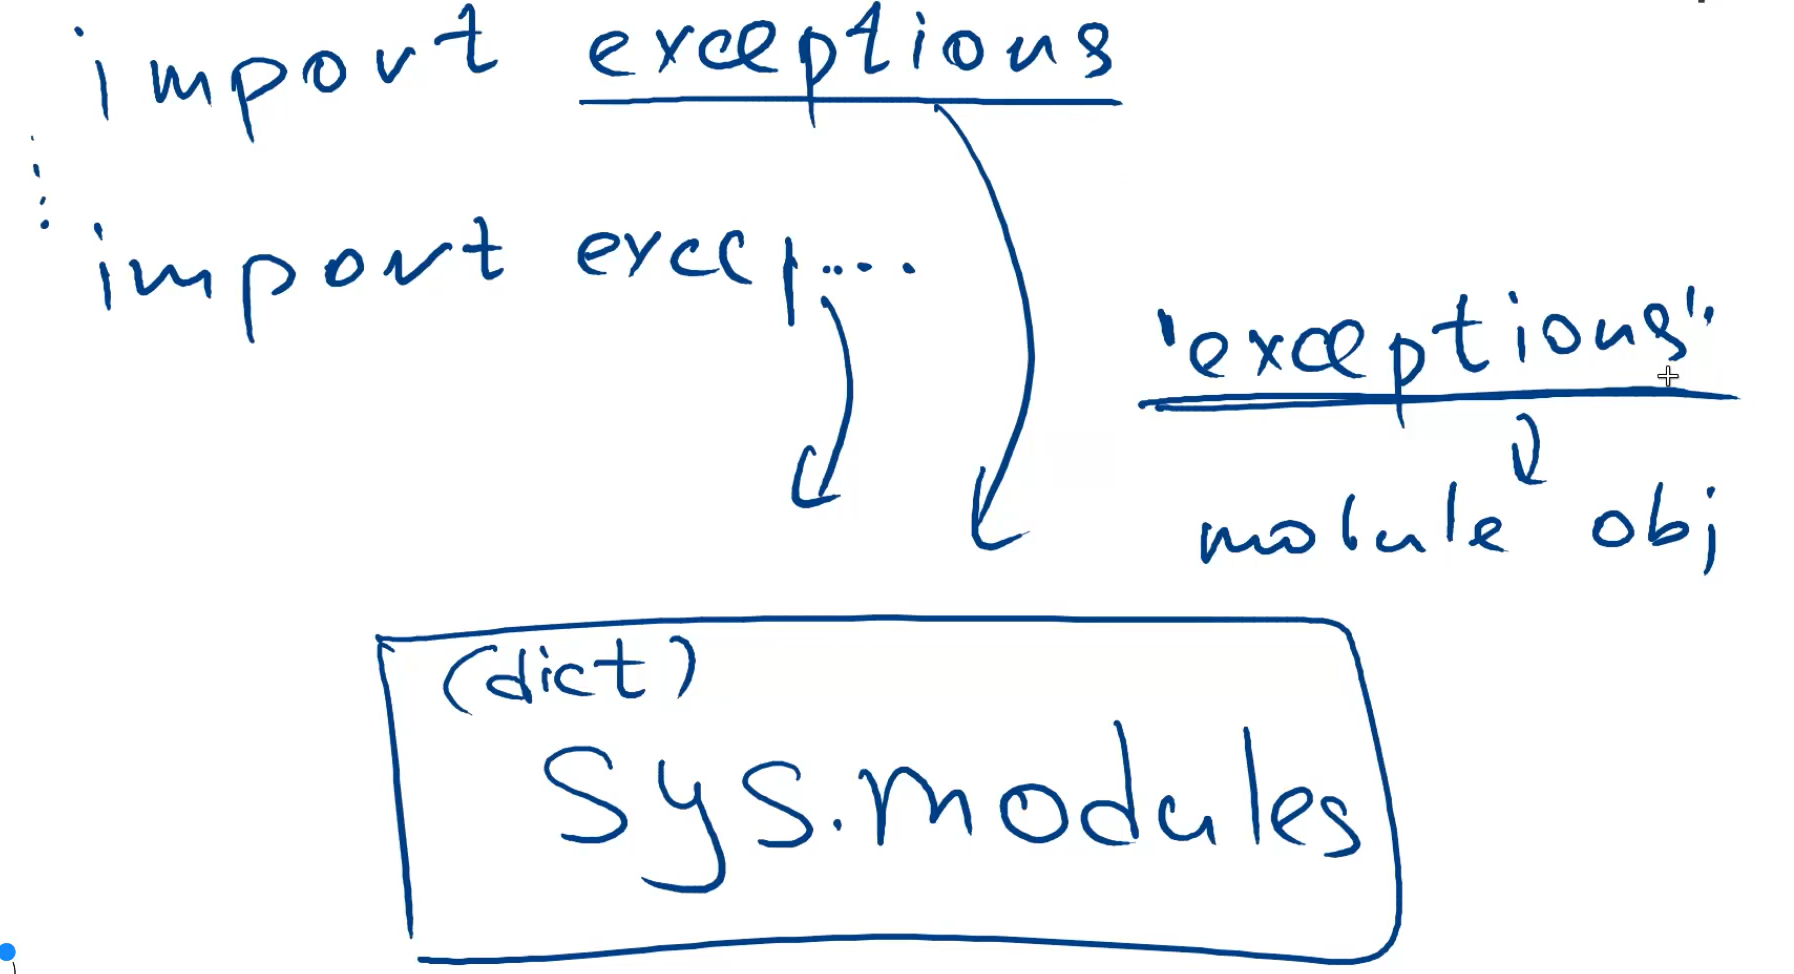

In [308]:
import sys
# Импортированные модули.
sys.modules

{'sys': <module 'sys' (built-in)>,
 'builtins': <module 'builtins' (built-in)>,
 '_frozen_importlib': <module '_frozen_importlib' (frozen)>,
 '_imp': <module '_imp' (built-in)>,
 '_thread': <module '_thread' (built-in)>,
 '_warnings': <module '_warnings' (built-in)>,
 '_weakref': <module '_weakref' (built-in)>,
 'winreg': <module 'winreg' (built-in)>,
 '_io': <module '_io' (built-in)>,
 'marshal': <module 'marshal' (built-in)>,
 'nt': <module 'nt' (built-in)>,
 '_frozen_importlib_external': <module '_frozen_importlib_external' (frozen)>,
 'time': <module 'time' (built-in)>,
 'zipimport': <module 'zipimport' (frozen)>,
 '_codecs': <module '_codecs' (built-in)>,
 'codecs': <module 'codecs' (frozen)>,
 'encodings.aliases': <module 'encodings.aliases' from 'C:\\Users\\79618\\anaconda3\\Lib\\encodings\\aliases.py'>,
 'encodings': <module 'encodings' from 'C:\\Users\\79618\\anaconda3\\Lib\\encodings\\__init__.py'>,
 'encodings.utf_8': <module 'encodings.utf_8' from 'C:\\Users\\79618\\anacond

In [309]:
import sys
print(id(sys))
import sys
print(id(sys))

1223508080608
1223508080608


Тот же самый объект. Т.е. импортирование осуществляется лишь раз.

In [314]:
# put your python code here
import datetime
date=[int(i) for i in input().split()]
days=int(input())



2016 4 20
14


In [316]:
import datetime
datetime.date(*date)

datetime.date(2016, 4, 20)

In [331]:
print(' '.join(map(str ,(datetime.date(*date)+datetime.timedelta(days)).timetuple()[:3])))

'2016 5 4'

In [6]:
import simplecrypt

In [3]:
from Crypto.Cipher import AES

ModuleNotFoundError: No module named 'Crypto'

In [8]:
with open(r"C:\Users\79618\Downloads\encrypted.bin", "rb") as inp:
    encrypted = inp.read()

In [10]:
with open(r"C:\Users\79618\Downloads\passwords.txt", "rb") as inp:
    info = inp.read()

In [29]:
encrypted

b'sc\x00\x02\x96\x93^\xd7&1\x9f\xd0\x14\x02\x14\xd1\x92`\xeb\x1b\xdbulr\x0e\xeb\x0f\xf0D\xcf\x87\xf5\xd5\xf2oKA\x89b/\xaa\xa6y;\x8b)\x89\xbdl\x0f\x96\x144\x8e\xe2P\xa8\xcf\xc7T\xf6>.`m\xfbC/\xc1V\xd2>\xd0\xaf\xbb0%V\x14\xac\xf7\n\xcd'

In [35]:
info.split()[0].decode('UTF-8')

'9XB8nsIqRfYeswC'

In [49]:
x=list(map(lambda i: i.decode('utf-8'), info.split()))
x

['9XB8nsIqRfYeswC',
 '4sEhUGLEZti9BiN',
 'bDjmT0NcIW8nzhb',
 'ZN6QQoMOO1ZQLUY',
 'RVrF2qdMpoq6Lib',
 'tnnX7HH3vJ9Hiji',
 'C24TJYYkqekv40l',
 'B2ropluPaMAitzE',
 'DRezNUVnr2zC0CP',
 'XCNmpTvvZb1n3mX']

In [52]:
for i in x:
    try:
        print(simplecrypt.decrypt(i,encrypted).decode('utf8'))
        print('YES ', i)
    except:
        print('Not ', i)

Not  9XB8nsIqRfYeswC
Not  4sEhUGLEZti9BiN
Not  bDjmT0NcIW8nzhb
Not  ZN6QQoMOO1ZQLUY
Alice loves Bob
YES  RVrF2qdMpoq6Lib
Not  tnnX7HH3vJ9Hiji
Not  C24TJYYkqekv40l
Not  B2ropluPaMAitzE
Not  DRezNUVnr2zC0CP
Not  XCNmpTvvZb1n3mX


In [38]:
from simplecrypt import encrypt, decrypt
password = 'sekret'
message = 'this is a secret message'
ciphertext = encrypt(password, message)

In [40]:
print(decrypt('badpass', ciphertext))

DecryptionException: Bad password or corrupt / modified data.

In [42]:
print(decrypt('sekret', ciphertext))

b'this is a secret message'


In [ ]:
for i in 

In [39]:
ciphertext

b'sc\x00\x02\xd2\xf2"\xd0\xc04AuR\xea\x1b\x9e\xd0$\xa4\xfa\x0b9\x0f\xbe#\x96\' jU\xd6\xea\xc4\xbc\x04\x12\xa2\xe3\xd5C\xa0\x87#\x12\x15\x12\xce\x05\xcfv,Y\xcfQ\xc1\xce\x10D\x98\x12\r\xef\xca\xf9"\xa3\x08\xf1\xa1\x8d\x16?\xed\\ 6m\x9b\x93\xa1\x1bK\xa0\x12%g\xbd\xe8\xe4}\xfe\x13'

In [36]:
simplecrypt.decrypt(info.split()[0].decode('UTF-8'),encrypted).decode('utf8')

DecryptionException: Bad password or corrupt / modified data.

In [13]:
info

b'9XB8nsIqRfYeswC\n4sEhUGLEZti9BiN\nbDjmT0NcIW8nzhb\nZN6QQoMOO1ZQLUY\nRVrF2qdMpoq6Lib\ntnnX7HH3vJ9Hiji\nC24TJYYkqekv40l\nB2ropluPaMAitzE\nDRezNUVnr2zC0CP\nXCNmpTvvZb1n3mX\n'

In [14]:
encrypted

b'sc\x00\x02\x96\x93^\xd7&1\x9f\xd0\x14\x02\x14\xd1\x92`\xeb\x1b\xdbulr\x0e\xeb\x0f\xf0D\xcf\x87\xf5\xd5\xf2oKA\x89b/\xaa\xa6y;\x8b)\x89\xbdl\x0f\x96\x144\x8e\xe2P\xa8\xcf\xc7T\xf6>.`m\xfbC/\xc1V\xd2>\xd0\xaf\xbb0%V\x14\xac\xf7\n\xcd'

# ``functools``

In [34]:
from functools import partial
x=int('1101', base=2)
print(x)
int_2=partial(int, base=2)
x=int_2('1101')
print(x)

13
13


In [ ]:
from functools import partial
import operator as op

x=[]
x=int('1101', base=2)
print(x)
int_2=partial(int, base=2)
x=int_2('1101')
print(x)

# Парадигмы программирования

**Парадигма программирования (подход к программированию)** — совокупность идей и понятий, определяющих стиль написания компьютерных программ.

Парадигма программирования определяется:
* вычислительной моделью;
* базовой программной единицей (-ами);
* методами разделения абстракций.

Парадигма – устоявшаяся система научных взглядов, в рамках которой ведутся исследования (Т. Кун).

Язык программирования Python мультипарадигменный.

Основные парадигмы программирования:
* императивное;
* структурное;
* объектно-ориентированное;
* функциональное;
* логическое.

---------------
**Императивное программирование**

Императивное программирование (ИП) характеризуется тем, что:
* в исходном коде программы записаны инструкции (команды);
* инструкции должны выполняться последовательно;
* данные, полученные при выполнении инструкции, могут записываться в память;
* данные, получаемые при выполнении предыдущих инструкций, могут читаться из памяти последующими инструкциями.

Императивная программа похожа на приказы (англ. *imperative — приказ, повелительное наклонение*), выражаемые повелительным наклонением в естественных языках. Это последовательность команд, выполняемых процессором.

При императивном подходе к составлению кода широко используется присваивание. Наличие операторов присваивания увеличивает сложность модели вычислений и создает условия для специфических ошибок императивных программ.

Основные механизмы управления:
* последовательное исполнение команд;
* использование именованных переменных;
* использование оператора присваивания;
* использование ветвления (оператор ``if``);
* использование безусловного перехода (оператор ``goto`` 😈).

Ключевой идеей императивного программирования является работа с переменными, как с временным хранением данных в оперативной памяти.

--------------------
**Структурное программирование**

Структурная парадигма программирования нацелена на сокращение времени разработки и упрощение поддержки программ за счёт использования блочных операторов и подпрограмм. Отличительная черта структурных программ — отказ от оператора безусловного перехода (``goto`` 🙏), который широко использовался в 1970-х годах.

Основные механизмы управления:
* последовательное исполнение команд;
* использование именованных переменных;
* использование оператора присваивания;
* использование ветвления (оператор ``if``);
* использование циклов;
* использование подпрограмм (функций).

В структурном программировании программа по возможности разбивается на маленькие подпрограммы (функции) с изолированным контекстом.

*Парадигму структурного программирования предложил нидерландский ученый Эдсгер Дейкстра.*

------------------
**Объектно-ориентированное программирование**
В объектно-ориентированной парадигме программа разбивается на объекты – структуры данных, состоящие из полей, описывающих состояние, и методов – функций, применяемых к объектам для изменения или запроса их состояния.

Объектно-ориентированную парадигму программирования поддерживают:
* Python;
* C#;
* Java;
* C++;
* JavaScript;
* и другие.

Основные механизмы управления:
* абстракция;
* класс;
* объект;
* полиморфизм;
* инкапсуляция;
* наследование.

-----------------
**Логическое программирование**

При использовании логического программирования программа содержит описание проблемы в терминах фактов и логических формул, а решение проблемы система находит с помощью механизмов логического вывода.

В конце 60-х годов XX века Корделл Грин предложил использовать резолюцию как основу логического программирования. Алан Колмеро создал язык логического программирования Prolog в 1971 году. Логическое программирование пережило пик популярности в середине 80-х годов XX века, когда было положено в основу проекта разработки программного и аппаратного обеспечения вычислительных систем пятого поколения.

**Важное его преимущество** — достаточно **высокий уровень машинной независимости**, а также **возможность откатов**, возвращения к предыдущей подцели при отрицательном результате анализа одного из вариантов в процессе поиска решения.

Один из концептуальных **недостатков логического подхода** — **специфичность класса решаемых задач**.

**Недостаток практического характера** — **сложность эффективной реализации для принятия решений в реальном времени**, скажем, для систем жизнеобеспечения.

-------------------
**Функциональное программирование**

**Основной инструмент** функционального программирования (ФП) — **математические функции**.

Математические функции выражают связь между исходными данными и итогом процесса. Процесс вычисления также имеет вход и выход, поэтому функция — вполне подходящее и адекватное средство описания вычислений. Именно этот простой принцип положен в основу функциональной парадигмы программирования.

**Функциональное программирование (ФП) — декларативная парадигма программирования.**

**Функциональная программа** — набор определений функций. Функции определяются через другие функции или рекурсивно через самих себя. При выполнении программы функции получают аргументы, вычисляют и возвращают результат, при необходимости вычисляя значения других функций.

Как преимущества, так и недостатки данной парадигмы определяет модель вычислений без состояний. Если императивная программа на любом этапе исполнения имеет состояние, то есть совокупность значений всех переменных, и производит побочные эффекты, то чисто функциональная программа ни целиком, ни частями состояния не имеет и побочных эффектов не производит. То, что в императивных языках делается путем присваивания значений переменным, в функциональных достигается передачей выражений в параметры функций. В результате чисто функциональная программа не может изменять имеющиеся данные, а может лишь порождать новые копированием и/или расширением старых. Следствие того же — отказ от циклов в пользу рекурсии.

Сильные стороны функционального программирования:
* повышение надёжности кода;
* удобство организации модульного тестирования;
* возможности оптимизации при компиляции;
* возможности параллелизма.

Недостатки: 
* отсутствие присваиваний и замена их на порождение новых данных приводят к необходимости постоянного выделения и автоматического освобождения памяти, поэтому в системе исполнения функциональной программы обязательным компонентом становится высокоэффективный сборщик мусора.

Основные идеи функционального программирования:
* **неизменяемые переменные** — в функциональном программировании можно определить переменную, но изменить ее значение нельзя;
* **чистая функция** — это функция, результат работы которой предсказуем. При вызове с одними и теми же аргументами, такая функция всегда вернет одно и то же значение. Про такие функции говорят, что они не вызывают побочных эффектов;
* **функции высшего порядка** — могут принимать другие функции в качестве аргумента или возвращать их;
* **рекурсия** — поддерживается многими языками программирования, а для функционального программирования обязательна. Дело в том, что в языках ФП отсутствуют циклы, поэтому для повторения операций служит рекурсия. Использование рекурсии в языках ФП оптимизировано, и происходит быстрее, чем в языках императивного программирования;
* **лямбда-выражения** — способ определения анонимных функциональных объектов.

# Пакет ``xml``

Библиотека ElementTree включает инструментальные средства, предназначенные для синтаксического анализа (парсинга) XML-документов c использованием
двух подходов, основанных соответственно на обработке событий в процессе
чтения документа и на объектной модели документа, а также для поиска XML-элементов c помощью выражений XPath и создания или изменения существующих документов.

XML-документы, прошедшие синтаксический анализ, представляются в памяти объектами ElementTree и Element, объединяемыми в единую иерархическую
структуру на основе способа вложения узлов в исходном документе.

## Парсинг

```XML
<?xml version="1.0" encoding="UTF-8"?>
<opml version="1.0">
<head>
    <title>My Podcasts</title>
    <dateCreated>Sat, 06 Aug 2016 15:53:26 GMT</dateCreated>
    <dateModified>Sat, 06 Aug 2016 15:53:26 GMT</dateModified>
</head>
<body>
    <outline text="Non-tech">
        <outline
        text="99% Invisible" type="rss"
        xmlUrl="http://feeds.99percentinvisible.org/
A99percentinvisible"
        htmlUrl="http://99percentinvisible.org" />
    </outline>
    <outline text="Python">
        <outline
            text="Talk Python to Me" type="rss"
            xmlUrl="https://talkpython.fm/episodes/rss"
            htmlUrl="https://talkpython.fm" />
        <outline
            text="Podcast.__init__" type="rss"
            xmlUrl="http://podcastinit.podbean.com/feed/"
            htmlUrl="http://podcastinit.com" />
    </outline>
/body>
/opml>
```

* ``parse(дескриптор открытого файла)`` - синтаксический анализ XML-документа.
*Выход*: объект ``ElementTree``

In [ ]:
from xml.etree import ElementTree
with open('podcasts.opml', 'rt') as f:
    tree = ElementTree.parse(f)
print()

```
<xml.etree.ElementTree.ElementTree object at 0x1013e5630>
```

## Обход дерева узлов

* ``tree.iter()`` - метод для поочередного обхода всех ухлов иерархичекого дерева элементов документа, который возвращает генератор, похволяющий итерироваться по экземляру ElementTree.

In [ ]:
from xml.etree import ElementTree
import pprint
with open('podcasts.opml', 'rt') as f:
    tree = ElementTree.parse(f)

for node in tree.iter():
    print(node.tag)

python3 ElementTree_dump_opml.py\
```
opml
head
title
dateCreated
dateModified
body
outline
outline
outline
outline
outline
```

Чтобы вывести на печать лишь группы имен и URL-адреса подкастов, пропустим все данные в разделе заголовка и выведем лишь атрибуты text и xmlUrl, выполнив поиск соответствующих значений в словаре attrib.\
Аргумент ```'outline'``` метода ``iter()`` задает обработку лишь тех узлов, которые
соответствуют дескрипторам ```outline```.

In [ ]:
from xml.etree import ElementTree

with open('podcasts.opml', 'rt') as f:
    tree = ElementTree.parse(f)
    
for node in tree.iter('outline'):
    name = node.attrib.get('text')
    url = node.attrib.get('xmlUrl')
    if name and url:
        print(' %s' % name)
        print(' %s' % url)
    else:
        print(name)

```
Non-tech
    99% Invisible
        http://feeds.99percentinvisible.org/99percentinvisible
Python
    Talk Python to Me
        https://talkpython.fm/episodes/rss
Podcast.__init__
    http://podcastinit.podbean.com/feed/
```

## Поиск узлов в документе

Обход всего дерева для поиска нужных узлов чреват ошибками. В предыдущем примере мы должны были проверять для каждого узла outline, соответствует ли он группе (узлы, содержащие только атрибут text) или подкасгу
(узлы, содержащие атрибуты text и xmlUrl). Для получения простого списка
URL-адресов потоков без имен и групп логику можно упростить за счет привлечения метода ``findall()`` для поиска узлов c использованием более описательных
характеристик.


In [ ]:
from xml.etree import ElementTree
with open('podcasts.opml', 'rt') as f:
    tree = ElementTree.parse(f)

for node in tree.findall('.//outline*):
    url = node.attrib.get('xmlUrl')
    if url:
        print(url)

```
$ python3 ElementTree_find_feeds__by_tag.py
http://feeds.99percentinvisible.org/99percentinvisible
https://talkpython.fm/episodes/rss
http://podcastinit.podbean.com/feed/
```

Можно воспользоваться тем фактом, что узлы outline имеют только два уровня вложенности. Изменение пути поиска на ``.//outline/outline`` означает, что
цикл будет обрабатывать только узлы outline второго уровня.

In [ ]:
from xml.etree import ElementTree
with open('podcasts.opml', 'rt') as f:
    tree = ElementTree.parse(f)

for node in tree.findall('.//outline/outline'):
    url = node.attrib.get('xmlUrl')
    print(url)

Предполагается, что в исходном документе все узлы outline второго уровня
годержат атрибут xmlURLattribute, ссылающийся на канал подкаста, поэтому
проверку его наличия можно опустить.

```
? python3 ElementTree_find_feeds__by_structure.py
http://feeds.99percentinvisible.org/99percentinvisible
https://talkpython.fm/episodes/rss
http://podcastinit.podbean.com/feed/
```

## Атрибуты узлов

Элементами, возвращаемыми функциями findall () и iter (), являются объекты Element, каждый из которых представляетузел в иерархическом представлении XML-документа. Каждый объект Element имеет атрибуты для доступа к
данным, извлеченным из XML. 

```XML
<?xml version="1.0" encoding="UTF-8"?>
<top>
    <child>Regular text.</child>
    <child_with_tail>Regular text.</child_with_tail>"Tail" text.
    <with_attributes name="value" foo="bar" />
    <entity__expansion attribute="This &#38; That”>
        That &#38; This
    </entity_expansion>
</top>
```

In [2]:
from xml.etree import ElementTree

with open('data.xml', 'rt') as f:
    tree = ElementTree.parse(f)

    node = tree.find('./with_attributes')
print(node.tag)
for name, value in sorted(node.attrib.items()):
    print(' %-4s = "%s"' % (name, value))

IndentationError: unexpected indent (823707846.py, line 2)

```
$ python3 ElementTree_node_attributes.py
with_attributes
foo = "bar"
name = "value"
```

Текстовое содержимое узлов доступно вместе c прикрепленным к ним (tail)
текстом, следующим после закрывающегодескриптора.

In [ ]:
from xml.etree import ElementTree
with open('data.xml', 'rt') as f:
    tree = ElementTree.parse(f)
          
for path in ['./child', './child_with_tail']:
node = tree.find(path)
          print(node.tag)
print(' child node text:', node.text)
print(' and tail text :', node.tail)


```
$ python3 ElementTree_node_text.py
child
child node text: Regular text.
and tail text :
child_with_tail
child node text: Regular text,
and tail text : "Tail" text.
```

Ссылки на XML-сущности, встроенные в документ, преобразуются в соответствующие символы до возврата значений.

In [ ]:
from xml.etree import ElementTree
with open('data.xml', 'rt') as f:
    tree = ElementTree.parse(f)
    
node = tree.find('entity_expansion')
print(node.tag)
print(' in attribute:', node.attrib['attribute'])
print(' in text :', node.text.strip())


```
entity_expansion
in attribute: This & That
in text : That & This
```

## Отслеживание событий в процессе анализа документа

Второй API, предназначенный для обработки XML-документов, основан на
обработке событий. Когда встречается открывающий дескриптор, анализатор
генерирует событие start, а когда закрывающий — событие end. На этапе синтаксического анализа данные могут извлекаться путем итерирования по потоку
событий, что удобно, если после этого не требуется манипулировать сразу всем
документом, а проанализированный документ не должен храниться в памяти
целиком.

**Возможные типы событий:**
* ``start`` - Встретился новый дескриптор. Обрабатывается закрывающая угловая
скобка дескриптора, но не его содержимое.
* ``end`` - Обрабатывается закрывающая угловая скобка закрывающего дескриптора.
К этому моменту все дочерние узлы уже были обработаны.
* ``start-ns`` - Начало объявления пространства имен.

* ``end-ns`` - Конец объявления пространства имен

* ``.iterparse()`` - ) возвращает итерируемый объект, который вырабатывает
кортежи, содержащие имя события и узел, запустивший это событие.


In [ ]:
from xml.etree.ElementTree import iterparse
depth = 0
prefix_width = 8
prefix_dots = ’.' * prefix_width
line_template = ''.join([
'{prefix:<0.{prefix_len}}',
’{event:<8}’,
'{suffix:<{suffix__len}} ’,
’{node.tag:<12} ’,
'{node_id}’,
])
EVENT_NAMES= ['start', ’end’, 'start-ns', ’end-ns’]
for (event, node) in iterparse(*podcasts.opml', EVENT_NAMES):
if event == 'end':
depth -= 1
prefix_len = depth * 2
print(line_template.format(
prefix=prefix_dots,
prefix_len=prefix_len,
suffix=’’,
suffix_len=(prefix_width - prefix_len),
node=node,
node_id=id(node),
event=event,
))
if event == ’start’:
depth += 1


## Задача

Вам дано описание пирамиды из кубиков в формате XML.
Кубики могут быть трех цветов: красный (red), зеленый (green) и синий (blue﻿).
Для каждого кубика известны его цвет, и известны кубики, расположенные прямо под ним.\
Введем понятие ценности для кубиков. Самый верхний кубик, соответствующий корню XML документа имеет ценность 1. Кубики, расположенные прямо под ним, имеют ценность 2. Кубики, расположенные прямо под нижележащими кубиками, имеют ценность 3. И т. д.

Ценность цвета равна сумме ценностей всех кубиков этого цвета.

Выведите через пробел три числа: ценности красного, зеленого и синего цветов.

```XML
<cube color="blue">
  <cube color="red">
    <cube color="green">
    </cube>
  </cube>
  <cube color="red">
  </cube>
</cube>
```
**Вывод:** 4 3 1

In [90]:
from xml.etree import ElementTree
tree = ElementTree.fromstring('<cube color="blue"><cube color="red"><cube color="green"></cube></cube><cube color="red"></cube></cube>')
i=0
color_book={'red':0, 'green':0, 'blue':0}
while True:
    t=[]
    for node in tree.findall(f".{'/cube'*i}"):
        t.append(node.attrib['color'])
    if len(t)==0:
        break
    else:
        for color in t:
            color_book[color]+=i+1
    i+=1
    
print(f"{color_book['red']} {color_book['green']} {color_book['blue']}")

4 3 1


<colgroup>
<col style="width: 30%" />
<col style="width: 70%" />
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Syntax</p></th>
<th class="head"><p>Meaning</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">tag</span></code></p></td>
<td><p>Selects all child elements with the given tag.
For example, <code class="docutils literal notranslate"><span class="pre">spam</span></code> selects all child elements
named <code class="docutils literal notranslate"><span class="pre">spam</span></code>, and <code class="docutils literal notranslate"><span class="pre">spam/egg</span></code> selects all
grandchildren named <code class="docutils literal notranslate"><span class="pre">egg</span></code> in all children named
<code class="docutils literal notranslate"><span class="pre">spam</span></code>.  <code class="docutils literal notranslate"><span class="pre">{namespace}*</span></code> selects all tags in the
given namespace, <code class="docutils literal notranslate"><span class="pre">{*}spam</span></code> selects tags named
<code class="docutils literal notranslate"><span class="pre">spam</span></code> in any (or no) namespace, and <code class="docutils literal notranslate"><span class="pre">{}*</span></code>
only selects tags that are not in a namespace.</p>
<div class="versionchanged">
<p><span class="versionmodified changed">Changed in version 3.8: </span>Support for star-wildcards was added.</p>
</div>
</td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">*</span></code></p></td>
<td><p>Selects all child elements, including comments and
processing instructions.  For example, <code class="docutils literal notranslate"><span class="pre">*/egg</span></code>
selects all grandchildren named <code class="docutils literal notranslate"><span class="pre">egg</span></code>.</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">.</span></code></p></td>
<td><p>Selects the current node.  This is mostly useful
at the beginning of the path, to indicate that it’s
a relative path.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">//</span></code></p></td>
<td><p>Selects all subelements, on all levels beneath the
current  element.  For example, <code class="docutils literal notranslate"><span class="pre">.//egg</span></code> selects
all <code class="docutils literal notranslate"><span class="pre">egg</span></code> elements in the entire tree.</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">..</span></code></p></td>
<td><p>Selects the parent element.  Returns <code class="docutils literal notranslate"><span class="pre">None</span></code> if the
path attempts to reach the ancestors of the start
element (the element <code class="docutils literal notranslate"><span class="pre">find</span></code> was called on).</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">[&#64;attrib]</span></code></p></td>
<td><p>Selects all elements that have the given attribute.</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">[&#64;attrib='value']</span></code></p></td>
<td><p>Selects all elements for which the given attribute
has the given value.  The value cannot contain
quotes.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">[&#64;attrib!='value']</span></code></p></td>
<td><p>Selects all elements for which the given attribute
does not have the given value. The value cannot
contain quotes.</p>
<div class="versionadded">
<p><span class="versionmodified added">New in version 3.10.</span></p>
</div>
</td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">[tag]</span></code></p></td>
<td><p>Selects all elements that have a child named
<code class="docutils literal notranslate"><span class="pre">tag</span></code>.  Only immediate children are supported.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">[.='text']</span></code></p></td>
<td><p>Selects all elements whose complete text content,
including descendants, equals the given <code class="docutils literal notranslate"><span class="pre">text</span></code>.</p>
<div class="versionadded">
<p><span class="versionmodified added">New in version 3.7.</span></p>
</div>
</td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">[.!='text']</span></code></p></td>
<td><p>Selects all elements whose complete text content,
including descendants, does not equal the given
<code class="docutils literal notranslate"><span class="pre">text</span></code>.</p>
<div class="versionadded">
<p><span class="versionmodified added">New in version 3.10.</span></p>
</div>
</td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">[tag='text']</span></code></p></td>
<td><p>Selects all elements that have a child named
<code class="docutils literal notranslate"><span class="pre">tag</span></code> whose complete text content, including
descendants, equals the given <code class="docutils literal notranslate"><span class="pre">text</span></code>.</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">[tag!='text']</span></code></p></td>
<td><p>Selects all elements that have a child named
<code class="docutils literal notranslate"><span class="pre">tag</span></code> whose complete text content, including
descendants, does not equal the given <code class="docutils literal notranslate"><span class="pre">text</span></code>.</p>
<div class="versionadded">
<p><span class="versionmodified added">New in version 3.10.</span></p>
</div>
</td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">[position]</span></code></p></td>
<td><p>Selects all elements that are located at the given
position.  The position can be either an integer
(1 is the first position), the expression <code class="docutils literal notranslate"><span class="pre">last()</span></code>
(for the last position), or a position relative to
the last position (e.g. <code class="docutils literal notranslate"><span class="pre">last()-1</span></code>).</p></td>
</tr>
</tbody>
</table>

In [ ]:
# Top-level elements
root.findall(".")

# All 'neighbor' grand-children of 'country' children of the top-level
# elements
root.findall("./country/neighbor")

# Nodes with name='Singapore' that have a 'year' child
root.findall(".//year/..[@name='Singapore']")

# 'year' nodes that are children of nodes with name='Singapore'
root.findall(".//*[@name='Singapore']/year")

# All 'neighbor' nodes that are the second child of their parent
root.findall(".//neighbor[2]")

# Пакет ``zipfile``

In [2]:
from urllib.request import urlretrieve
url = 'https://archive.ics.uci.edu/static/public/445/absenteeism+at+work.zip'
filename = "df.zip"
urlretrieve(url, filename)

('df.zip', <http.client.HTTPMessage at 0x20344f556f0>)

In [17]:
import zipfile
import pandas as pd
import os
df=''
with zipfile.ZipFile('df.zip', 'r') as zf:
    x=zf.namelist()
    for i in x:
        if i.endswith('.csv'):
            break
    df = pd.read_csv(zf.open(i), sep=';')
os.remove('df.zip')

In [19]:
import zipfile
import pandas as pd
import os
from urllib.request import urlretrieve
def uci_df(link):
    df=[]
    urlretrieve(link, 'downloadable.zip')
    with zipfile.ZipFile('downloadable.zip', 'r') as zf:
        names=zf.namelist()
        for name in names:
            if name.endswith('.csv'):
                break
        df = pd.read_csv(zf.open(name), sep=';')
    os.remove('downloadable.zip')
    return df

In [21]:
abs_at_work=uci_df('https://archive.ics.uci.edu/static/public/445/absenteeism+at+work.zip')
abs_at_work

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0     33                 239.554  ...                     0          1    2   
1     50                 239.554  ...                     1          1    1   
2     38                 239.554  ...                     0          1    0   
3     39                 239.554  ...                     0          1    2   
4     33                 239.554  ...                     0          1    2   
..   ...                     ...  ...                   ...        ...  ...   
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0                 1              0    1      90     172               30   
1                 1              0    0      98     178               31   
2                 1              0    0      89     170               31   
3                 1              1    0      68     168               24   
4                 1              0    1      90     172               30   
..              ...            ...  ...     ...     ...              ...   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737     